# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.



For many incumbent operators, retaining high profitable customers is the number one business goal.



To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.



In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.



## Steps to be followed

1. Data Understanding
2. Data Cleaning
3. Filtering High Value Customers
4. Creating target Variable
5. Deriving New Features
6. Handling Missing values
7. Data Visualization-Univariate Analysis
6. Data Visualization- Bivariate Analysis
7. Outlier Detection
8. Data Preparation
9. Data Modeling and Eavlaution
    - Non-Interpretable Models
    - Interpretable Models
10. Conclusion

## **1. Data Understanding**

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
#Importing Data Reading and Processing Libraries
import pandas as pd
import numpy as np

#Imporitng Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Data Preparation and Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

#Importing Miscellaneous Libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

# For Hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# For clustering
## using KMeans ##
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## using Hierarchical ##
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Importing required packages for visualization
from IPython.display import Image
import six
from six import StringIO
import graphviz
import pydot, graphviz
from sklearn.svm import SVC

# Other sklearn packages
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from datetime import date,datetime
import math
import multiprocessing

In [3]:
#Loading the Dataset

df = pd.read_csv('/content/sample_data/train.csv')
df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
0   0        109             0.0             0.0             0.0            6/30/2014   
1   1        109             0.0             0.0             0.0            6/30/2014   
2   2        109             0.0             0.0             0.0            6/30/2014   
3   3        109             0.0             0.0             0.0            6/30/2014   
4   4        109             0.0             0.0             0.0            6/30/2014   

  last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
0            7/31/2014            8/31/2014   31.277   87.009    7.527        48.58       124.38   
1            7/31/2014            8/31/2014    0.000  122.787   42.953         0.00         0.00   
2            7/31/2014            8/31/2014   60.806  103.176    0.000         0.53        15.93   
3            7/31/2014            8/31/2014  156.362  205.260  111.095         7.26        16.01   
4            7/31/2014            8/31/2014  240.708  128.191  101.565        21.28         4.83   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         1.29         32.24         96.68          2.33           0.00            0.0   
1         0.00          0.00         25.99         30.89           0.00            0.0   
2         0.00         53.99         82.05          0.00           0.00            0.0   
3         0.00         68.76         78.48         50.23           0.00            0.0   
4         6.13         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.0           0.00            0.0           0.00              2.23              0.00   
1            0.0           0.00            0.0           0.00              0.00              0.00   
2            0.0           0.00            0.0           0.00              0.53             12.98   
3            0.0           0.00            0.0           1.63              6.99              3.94   
4            0.0          15.73            0.0           0.00             10.16              4.83   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0              0.28              5.29             16.04              2.33              0.00   
1              0.00              0.00              0.00              0.00              0.00   
2              0.00             24.11              0.00              0.00              0.00   
3              0.00             37.91             44.89             23.63              0.00   
4              6.13             36.74             19.88              4.61             11.99   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00             22.01             29.79   
2              0.00              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              0.00              8.03   
4              1.23              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0          7.53         16.04          2.61             46.34            124.38              1.01   
1          0.00          0.00          0.00              0.00              0.00              0.00   
2         24.64         12.98          0.00              0.00              2.94              0.00   
3         44.91         48.84         23.63              0.26             12.06              0.00   
4         58.91         25.94         15.76              0.00           

In [4]:
df.shape

(69999, 172)

In [5]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [6]:
#Lets check how the data is spread
df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count  69999.000000    69999.0         69297.0         69297.0         69297.0  69999.000000   
mean   34999.000000      109.0             0.0             0.0             0.0    283.134365   
std    20207.115084        0.0             0.0             0.0             0.0    334.213918   
min        0.000000      109.0             0.0             0.0             0.0  -2258.709000   
25%    17499.500000      109.0             0.0             0.0             0.0     93.581000   
50%    34999.000000      109.0             0.0             0.0             0.0    197.484000   
75%    52498.500000      109.0             0.0             0.0             0.0    370.791000   
max    69998.000000      109.0             0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  \
count  69999.000000  69999.000000  67231.000000  67312.000000  66296.000000  67231.000000   
mean     278.185912    278.858826    133.153275    133.894438    132.978257    198.874771   
std      344.366927    351.924315    299.963093    311.277193    311.896596    316.818355   
min    -1289.715000   -945.808000      0.000000      0.000000      0.000000      0.000000   
25%       86.714000     84.095000      7.410000      6.675000      6.410000     34.860000   
50%      191.588000    192.234000     34.110000     32.280000     32.100000     96.480000   
75%      365.369500    369.909000    119.390000    115.837500    115.060000    232.990000   
max    35145.834000  33543.624000   7376.710000   8157.780000  10752.560000   8362.360000   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count  67312.000000  66296.000000   67231.000000   67312.000000   66296.000000   67231.000000   
mean     197.153383    196.543577       9.765435       7.014568       7.004892      14.186457   
std      322.482226    324.089234      57.374429      55.960985      53.408135      73.469261   
min        0.000000      0.000000       0.000000       0.000000       0.000000       0.000000   
25%       32.240000     31.575000       0.000000       0.000000       0.000000       0.000000   
50%       91.885000     91.800000       0.000000       0.000000       0.000000       0.000000   
75%      227.630000    229.345000       0.000000       0.000000       0.000000       0.000000   
max     7043.980000  14007.340000    2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   67312.000000   66296.000000      67231.000000      67312.000000      66296.000000   
mean        9.842191       9.771783         46.904854         46.166503         45.686109   
std        58.511894      64.618388        150.971758        154.739002        153.716880   
min         0.000000       0.000000          0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000          1.610000   
50%         0.000000       0.000000         11.910000         11.580000         11.740000   
75%         0.000000       0.000000         40.740000         39.760000         39.895000   
max      2812.040000    5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000   
mean          93.238231         90.799240         91.121447          3.743179          3.777031   
std          162.046699        153.852597        152.997805         13.319542         13.568110   
min            0.000000          0.000000          0.000000          0.000000          0.000000   
25%            9.920000         10.090000          9.830000          0.000000          0.000000   
50%     

In [7]:
df['circle_id'].unique()

array([109])

In [8]:
X = df.drop(columns=['circle_id']).iloc[:, :-1]
y = df.iloc[:, -1]

X.shape, y.shape


((69999, 170), (69999,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 170), (14000, 170), (55999,), (14000,))

In [10]:
df = X_train

In [11]:
df.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
52414  52414             0.0             0.0             0.0            6/30/2014   
34339  34339             0.0             0.0             0.0            6/30/2014   
24710  24710             0.0             0.0             0.0            6/30/2014   
43069  43069             0.0             0.0             0.0            6/30/2014   
32086  32086             0.0             0.0             0.0            6/30/2014   

      last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  \
52414            7/31/2014            8/31/2014  509.117  442.313  460.387       222.26   
34339            7/31/2014            8/31/2014  195.397  182.692  213.632        38.98   
24710            7/31/2014            8/31/2014  376.730  413.630  202.564       243.14   
43069            7/31/2014            8/31/2014  366.529  314.662  225.187       139.54   
32086            7/31/2014            8/31/2014  254.344  266.923  306.063       328.31   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
52414       245.19       212.41        921.23        747.88        667.24            0.0   
34339        24.21        24.03        175.49        177.41        199.19            0.0   
24710       160.43       177.74        326.56        444.56        492.34            0.0   
43069       117.04         4.83        616.54        387.39        355.49            0.0   
32086       287.31       348.16        116.38        143.91        190.01            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
52414            0.0           0.00            0.0            0.0           0.00   
34339            0.0           0.00            0.0            0.0           0.00   
24710            0.0           0.00            0.0            0.0           0.00   
43069            0.0           2.16            0.0            0.0           1.15   
32086            0.0           0.00            0.0            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
52414            119.63            139.21            182.31            219.19            192.88   
34339             25.19             24.21             24.03            120.04            103.11   
24710             75.34             41.83             90.14            175.08            270.11   
43069              2.28              2.31              0.00             16.69             34.34   
32086             76.24             84.33             94.34             17.94             32.56   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
52414            172.81              0.00              0.00              0.00               0.0   
34339            130.04              1.86              0.66              0.26               0.0   
24710            436.59              4.91             24.21              2.48               0.0   
43069             34.09              0.00              0.00              0.00               0.0   
32086             32.83              0.00              0.00              0.00               0.0   

       loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
52414              0.00              0.00        338.83        332.09        355.13   
34339              0.00              0.00        147.11        127.99        154.34   
24710             11.33              5.53        255.34        336.16        529.23   
43069              0.00              0.00         18.98         36.66         34.09   
32086              0.00              0.00         94.19        116.89        127.18   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
52414            102.63            105.98             30.09            701.38     

##  2.**Data cleaning**

In [12]:
# There are some columns representing volume based users have month specified in their name, while all other columns have used numbers `6,7,8,9` indicating month name
month = ['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g']
df = df.rename(columns = {'aug_vbc_3g':'3g_vbc_8','jul_vbc_3g':'3g_vbc_7','jun_vbc_3g':'3g_vbc_6','sep_vbc_3g':'3g_vbc_9'})


In [13]:
# Converting the date columns to date time format

date_col= [col for col in df.columns if 'date' in col]

for i in df[date_col]:
    df[i] = pd.to_datetime(df[i])


Columns that have just one unique value for all the customers do not really imply anything. Hence removing columns with zero variance from our dataset.

In [14]:
# Dropping columns that have only one unique values for all the leads.
# Dropping columns that have only one unique value for all the leads.
cols = []
for i in df.columns:
    if df[i].nunique() == 1:
        cols.append(i)
df = df.drop(columns=cols)
df.head()


id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
52414  52414  509.117  442.313  460.387       222.26       245.19       212.41        921.23   
34339  34339  195.397  182.692  213.632        38.98        24.21        24.03        175.49   
24710  24710  376.730  413.630  202.564       243.14       160.43       177.74        326.56   
43069  43069  366.529  314.662  225.187       139.54       117.04         4.83        616.54   
32086  32086  254.344  266.923  306.063       328.31       287.31       348.16        116.38   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
52414        747.88        667.24            0.0            0.0           0.00            0.0   
34339        177.41        199.19            0.0            0.0           0.00            0.0   
24710        444.56        492.34            0.0            0.0           0.00            0.0   
43069        387.39        355.49            0.0            0.0           2.16            0.0   
32086        143.91        190.01            0.0            0.0           0.00            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
52414            0.0           0.00            119.63            139.21            182.31   
34339            0.0           0.00             25.19             24.21             24.03   
24710            0.0           0.00             75.34             41.83             90.14   
43069            0.0           1.15              2.28              2.31              0.00   
32086            0.0           0.00             76.24             84.33             94.34   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
52414            219.19            192.88            172.81              0.00              0.00   
34339            120.04            103.11            130.04              1.86              0.66   
24710            175.08            270.11            436.59              4.91             24.21   
43069             16.69             34.34             34.09              0.00              0.00   
32086             17.94             32.56             32.83              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
52414              0.00               0.0              0.00              0.00        338.83   
34339              0.26               0.0              0.00              0.00        147.11   
24710              2.48               0.0             11.33              5.53        255.34   
43069              0.00               0.0              0.00              0.00         18.98   
32086              0.00               0.0              0.00              0.00         94.19   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
52414        332.09        355.13            102.63            105.98             30.09   
34339        127.99        154.34             13.78              0.00              0.00   
24710        336.16        529.23            167.79            118.59             87.59   
43069         36.66         34.09            137.26            114.73              3.68   
32086        116.89        127.18            252.06            202.98            253.81   

       std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
52414            701.38            554.99            494.43               0.0               0.0   
34339             53.58             73.28             68.88               0.0               0.0   
24710            146.56            138.89             46.29               0.0               0.0   
43069            599.84            353.04            321.39               0.0               0.0   
32086             98.43            111.34            157.18               0.0      

In [15]:
df.shape

(55999, 158)

Let us check if there are any categorical columns in our dataset. We can check that by finding if any columns have just 2 unique values `1` & `0`. These values analogous to `yes` & `no` respectively.

In [16]:
# Let us create a seperate category for categorical columns
cat_cols = []

for i in df.columns:
    if df[i].nunique()==2:
        cat_cols.append(i)
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

- ### Sachet recharge
`sachet recharge` are Service schemes with validity smaller than a month. This means that the days of recahrge in sachet recharge should be less than 30. Any service schemes beyond 29 days should mean that the client has done a monyhly recharge or the entry is wrong. Let us `cap the values beyond 29 days` by the highest number of days recharge below 30 days.

In [17]:
df['sachet_2g_6'] = df['sachet_2g_6'].clip(0,28)
df['sachet_2g_7'] = df['sachet_2g_7'].clip(0,29)
df['sachet_2g_8'] = df['sachet_2g_8'].clip(0,29)
df['sachet_3g_7'] = df['sachet_3g_7'].clip(0,24)
df['sachet_3g_8'] = df['sachet_3g_8'].clip(0,29)

In [18]:
df.shape

(55999, 158)

In [19]:
df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
52414  52414  509.117  442.313  460.387       222.26       245.19       212.41        921.23   
34339  34339  195.397  182.692  213.632        38.98        24.21        24.03        175.49   
24710  24710  376.730  413.630  202.564       243.14       160.43       177.74        326.56   
43069  43069  366.529  314.662  225.187       139.54       117.04         4.83        616.54   
32086  32086  254.344  266.923  306.063       328.31       287.31       348.16        116.38   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
52414        747.88        667.24            0.0            0.0           0.00            0.0   
34339        177.41        199.19            0.0            0.0           0.00            0.0   
24710        444.56        492.34            0.0            0.0           0.00            0.0   
43069        387.39        355.49            0.0            0.0           2.16            0.0   
32086        143.91        190.01            0.0            0.0           0.00            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
52414            0.0           0.00            119.63            139.21            182.31   
34339            0.0           0.00             25.19             24.21             24.03   
24710            0.0           0.00             75.34             41.83             90.14   
43069            0.0           1.15              2.28              2.31              0.00   
32086            0.0           0.00             76.24             84.33             94.34   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
52414            219.19            192.88            172.81              0.00              0.00   
34339            120.04            103.11            130.04              1.86              0.66   
24710            175.08            270.11            436.59              4.91             24.21   
43069             16.69             34.34             34.09              0.00              0.00   
32086             17.94             32.56             32.83              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
52414              0.00               0.0              0.00              0.00        338.83   
34339              0.26               0.0              0.00              0.00        147.11   
24710              2.48               0.0             11.33              5.53        255.34   
43069              0.00               0.0              0.00              0.00         18.98   
32086              0.00               0.0              0.00              0.00         94.19   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
52414        332.09        355.13            102.63            105.98             30.09   
34339        127.99        154.34             13.78              0.00              0.00   
24710        336.16        529.23            167.79            118.59             87.59   
43069         36.66         34.09            137.26            114.73              3.68   
32086        116.89        127.18            252.06            202.98            253.81   

       std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
52414            701.38            554.99            494.43               0.0               0.0   
34339             53.58             73.28             68.88               0.0               0.0   
24710            146.56            138.89             46.29               0.0               0.0   
43069            599.84            353.04            321.39               0.0               0.0   
32086             98.43            111.34            157.18               0.0      

In [20]:
# Now Checking Null values
null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

count_rech_3g_6             75.02
max_rech_data_6             75.02
arpu_2g_6                   75.02
arpu_3g_6                   75.02
count_rech_2g_6             75.02
av_rech_amt_data_6          75.02
total_rech_data_6           75.02
fb_user_6                   75.02
night_pck_user_6            75.02
date_of_last_rech_data_6    75.02
count_rech_2g_7             74.48
night_pck_user_7            74.48
av_rech_amt_data_7          74.48
max_rech_data_7             74.48
arpu_3g_7                   74.48
count_rech_3g_7             74.48
total_rech_data_7           74.48
fb_user_7                   74.48
arpu_2g_7                   74.48
date_of_last_rech_data_7    74.48
fb_user_8                   73.75
max_rech_data_8             73.75
date_of_last_rech_data_8    73.75
night_pck_user_8            73.75
total_rech_data_8           73.75
count_rech_2g_8             73.75
arpu_2g_8                   73.75
arpu_3g_8                   73.75
av_rech_amt_data_8          73.75
count_rech_3g_8             73.75
isd_og_mou_8                 5.34
std_ic_t2t_mou_8             5.34
spl_og_mou_8                 5.34
roam_ic_mou_8                5.34
og_others_8                  5.34
offnet_mou_8                 5.34
isd_ic_mou_8                 5.34
roam_og_mou_8                5.34
loc_ic_t2t_mou_8             5.34
loc_ic_mou_8                 5.34
onnet_mou_8                  5.34
loc_ic_t2m_mou_8             5.34
spl_ic_mou_8                 5.34
loc_og_t2c_mou_8             5.34
loc_ic_t2f_mou_8             5.34
std_og_t2m_mou_8             5.34
std_og_t2t_mou_8             5.34
loc_og_t2t_mou_8             5.34
std_ic_mou_8                 5.34
std_ic_t2f_mou_8             5.34
std_og_t2f_mou_8             5.34
loc_og_t2m_mou_8             5.34
loc_og_t2f_mou_8             5.34
std_ic_t2m_mou_8             5.34
std_og_mou_8                 5.34
loc_og_mou_8                 5.34
ic_others_8                  5.34
loc_ic_mou_6                 4.00
std_ic_t2m_mou_6             4.00
std_ic_t2f_mou_6             4.00
std_ic_t2t_mou_6             4.00
spl_ic_mou_6                 4.00
ic_others_6                  4.00
std_ic_mou_6                 4.00
isd_og_mou_6                 4.00
loc_ic_t2f_mou_6             4.00
loc_ic_t2m_mou_6             4.00
onnet_mou_6                  4.00
offnet_mou_6                 4.00
roam_ic_mou_6                4.00
roam_og_mou_6                4.00
loc_og_t2t_mou_6             4.00
loc_og_t2m_mou_6             4.00
loc_og_t2f_mou_6             4.00
loc_og_t2c_mou_6             4.00
loc_og_mou_6                 4.00
std_og_t2t_mou_6             4.00
std_og_t2m_mou_6             4.00
std_og_t2f_mou_6             4.00
std_og_mou_6                 4.00
spl_og_mou_6                 4.00
og_others_6                  4.00
loc_ic_t2t_mou_6             4.00
isd_ic_mou_6                 4.00
ic_others_7                  3.83
isd_ic_mou_7                 3.83
loc_ic_mou_7                 3.83
spl_ic_mou_7                 3.83
loc_og_mou_7                 3.83
og_others_7                  3.83
spl_og_mou_7                 3.83
isd_og_mou_7                 3.83
std_og_mou_7                 3.83
std_og_t2f_mou_7             3.83
std_og_t2m_mou_7             3.83
std_og_t2t_mou_7             3.83
loc_og_t2c_mou_7             3.83
loc_ic_t2f_mou_7             3.83
loc_og_t2f_mou_7             3.83
loc_og_t2m_mou_7             3.83
loc_og_t2t_mou_7             3.83
roam_og_mou_7                3.83
roam_ic_mou_7                3.83
offnet_mou_7                 3.83
onnet_mou_7                  3.83
loc_ic_t2t_mou_7             3.83
loc_ic_t2m_mou_7             3.83
std_ic_t2t_mou_7             3.83
std_ic_t2m_mou_7             3.83
std_ic_t2f_mou_7             3.83
std_ic_mou_7                 3.83
date_of_last_rech_8          3.52
date_of_last_rech_7          1.79
date_of_last_rech_6          1.61
dtype: float64

  ### b) Imputation of missing values

 - #### Recharge columns in Good and Action Phase

In [21]:
# Let us observe missing values in recharge columns
rech_col = [i for i in df.columns if 'rech' in i]
rech_6_col = [i for i in rech_col if '6' in i]
rech_7_col = [i for i in rech_col if '7' in i]
rech_8_col = [i for i in rech_col if '8' in i]

`Recharge columns for month- 6(June)`

In [22]:
# Let us observe missing values in recharge columns in the month of june(6)
rech_6 = pd.DataFrame(df[rech_6_col])

# adding some other columns describing data usage of customer in june(6)
vol_col = df[["vol_2g_mb_6",'vol_3g_mb_6']]

rech_6 = pd.concat([rech_6,vol_col], axis = 1)
rech_6.head(10)

total_rech_num_6  total_rech_amt_6  max_rech_amt_6 date_of_last_rech_6  \
52414                11               707             120          2014-06-28   
34339                 4               200             110          2014-06-13   
24710                 0                 0               0                 NaT   
43069                 6               480             150          2014-06-30   
32086                 3               268             128          2014-06-27   
1026                  2                 0               0          2014-06-12   
40754                 2               126              90          2014-06-11   
4400                  7                50              20          2014-06-22   
21403                 5                91              91          2014-06-24   
39893                18               260             110          2014-06-29   

      date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6  count_rech_2g_6  \
52414                      NaT                NaN              NaN              NaN   
34339                      NaT                NaN              NaN              NaN   
24710                      NaT                NaN              NaN              NaN   
43069                      NaT                NaN              NaN              NaN   
32086                      NaT                NaN              NaN              NaN   
1026                       NaT                NaN              NaN              NaN   
40754                      NaT                NaN              NaN              NaN   
4400                2014-06-04                1.0              8.0              1.0   
21403               2014-06-24                1.0             91.0              0.0   
39893               2014-06-27                4.0             23.0              4.0   

       count_rech_3g_6  av_rech_amt_data_6  vol_2g_mb_6  vol_3g_mb_6  
52414              NaN                 NaN         0.00         0.00  
34339              NaN                 NaN         0.00         0.00  
24710              NaN                 NaN         0.00         0.00  
43069              NaN                 NaN         0.00         0.00  
32086              NaN                 NaN         0.00         0.00  
1026               NaN                 NaN         0.00         0.00  
40754              NaN                 NaN         0.00         0.00  
4400               0.0                 8.0        46.27         0.00  
21403              1.0                91.0       458.92       280.62  
39893              0.0                92.0         0.00         0.00

`Recharge columns for month- 7(July)`

In [23]:
# Similarly Let us observe missing values in recharge columns for the month of july(7)

rech_7_col

['total_rech_num_7',
 'total_rech_amt_7',
 'max_rech_amt_7',
 'date_of_last_rech_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7']

In [24]:
rech_7 = pd.DataFrame(df[rech_7_col])

# adding some other columns describing data usage of customer in july
vol_col = df[["vol_2g_mb_7",'vol_3g_mb_7']]

rech_7 = pd.concat([rech_7,vol_col], axis = 1)
rech_7.head(10)

total_rech_num_7  total_rech_amt_7  max_rech_amt_7 date_of_last_rech_7  \
52414                 9               635             128          2014-07-31   
34339                 3               220             110          2014-07-16   
24710                 0                 0               0                 NaT   
43069                 5               256             110          2014-07-25   
32086                 4               247             110          2014-07-27   
1026                  9               170              30          2014-07-29   
40754                 4               146             110          2014-07-27   
4400                  9               175              50          2014-07-26   
21403                 7               715             252          2014-07-20   
39893                23               567             110          2014-07-31   

      date_of_last_rech_data_7  total_rech_data_7  max_rech_data_7  count_rech_2g_7  \
52414                      NaT                NaN              NaN              NaN   
34339                      NaT                NaN              NaN              NaN   
24710                      NaT                NaN              NaN              NaN   
43069                      NaT                NaN              NaN              NaN   
32086                      NaT                NaN              NaN              NaN   
1026                       NaT                NaN              NaN              NaN   
40754                      NaT                NaN              NaN              NaN   
4400                2014-07-16                3.0             25.0              3.0   
21403               2014-07-15                3.0            252.0              0.0   
39893               2014-07-27                3.0             23.0              3.0   

       count_rech_3g_7  av_rech_amt_data_7  vol_2g_mb_7  vol_3g_mb_7  
52414              NaN                 NaN         0.00         0.00  
34339              NaN                 NaN         0.00         0.00  
24710              NaN                 NaN         0.00         0.00  
43069              NaN                 NaN         0.00         0.00  
32086              NaN                 NaN         0.00         0.00  
1026               NaN                 NaN         0.00         0.00  
40754              NaN                 NaN         0.00         0.00  
4400               0.0                58.0        29.82         0.00  
21403              3.0               605.0         7.18      2455.38  
39893              0.0                69.0         0.00         0.00

`Recharge columns for month- 8(August)`

In [25]:
# Similarly Let us observe missing values in recharge columns in the month of August(8)

rech_8_col

['total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8']

In [26]:
rech_8 = pd.DataFrame(df[rech_8_col])

# adding some other columns describing data usage of customer in August
vol_col = df[["vol_2g_mb_8",'vol_3g_mb_8']]

rech_8 = pd.concat([rech_8,vol_col], axis = 1)
rech_8.head(10)

total_rech_num_8  total_rech_amt_8  max_rech_amt_8 date_of_last_rech_8  \
52414                11               654             130          2014-08-31   
34339                 4               280             130          2014-08-31   
24710                 1              1001            1001          2014-08-05   
43069                 4               406             130          2014-08-30   
32086                10               407             110          2014-08-25   
1026                 21               460              50          2014-08-31   
40754                 5               136             100          2014-08-29   
4400                  3                 0               0          2014-08-26   
21403                 5               121              50          2014-08-24   
39893                16               280              50          2014-08-28   

      date_of_last_rech_data_8  total_rech_data_8  max_rech_data_8  count_rech_2g_8  \
52414                      NaT                NaN              NaN              NaN   
34339                      NaT                NaN              NaN              NaN   
24710                      NaT                NaN              NaN              NaN   
43069                      NaT                NaN              NaN              NaN   
32086                      NaT                NaN              NaN              NaN   
1026                2014-08-19                4.0             17.0              4.0   
40754                      NaT                NaN              NaN              NaN   
4400                       NaT                NaN              NaN              NaN   
21403               2014-08-03                1.0             41.0              0.0   
39893                      NaT                NaN              NaN              NaN   

       count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  
52414              NaN                 NaN         0.00         0.00  
34339              NaN                 NaN         0.00         0.00  
24710              NaN                 NaN         0.00         0.00  
43069              NaN                 NaN         0.00         0.00  
32086              NaN                 NaN         0.00         0.00  
1026               0.0                68.0        60.39       267.62  
40754              NaN                 NaN         0.00         0.00  
4400               NaN                 NaN         0.00         0.00  
21403              1.0                41.0         0.00       146.71  
39893              NaN                 NaN         0.00         0.00

In [27]:
df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
52414  52414  509.117  442.313  460.387       222.26       245.19       212.41        921.23   
34339  34339  195.397  182.692  213.632        38.98        24.21        24.03        175.49   
24710  24710  376.730  413.630  202.564       243.14       160.43       177.74        326.56   
43069  43069  366.529  314.662  225.187       139.54       117.04         4.83        616.54   
32086  32086  254.344  266.923  306.063       328.31       287.31       348.16        116.38   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
52414        747.88        667.24            0.0            0.0           0.00            0.0   
34339        177.41        199.19            0.0            0.0           0.00            0.0   
24710        444.56        492.34            0.0            0.0           0.00            0.0   
43069        387.39        355.49            0.0            0.0           2.16            0.0   
32086        143.91        190.01            0.0            0.0           0.00            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
52414            0.0           0.00            119.63            139.21            182.31   
34339            0.0           0.00             25.19             24.21             24.03   
24710            0.0           0.00             75.34             41.83             90.14   
43069            0.0           1.15              2.28              2.31              0.00   
32086            0.0           0.00             76.24             84.33             94.34   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
52414            219.19            192.88            172.81              0.00              0.00   
34339            120.04            103.11            130.04              1.86              0.66   
24710            175.08            270.11            436.59              4.91             24.21   
43069             16.69             34.34             34.09              0.00              0.00   
32086             17.94             32.56             32.83              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
52414              0.00               0.0              0.00              0.00        338.83   
34339              0.26               0.0              0.00              0.00        147.11   
24710              2.48               0.0             11.33              5.53        255.34   
43069              0.00               0.0              0.00              0.00         18.98   
32086              0.00               0.0              0.00              0.00         94.19   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
52414        332.09        355.13            102.63            105.98             30.09   
34339        127.99        154.34             13.78              0.00              0.00   
24710        336.16        529.23            167.79            118.59             87.59   
43069         36.66         34.09            137.26            114.73              3.68   
32086        116.89        127.18            252.06            202.98            253.81   

       std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
52414            701.38            554.99            494.43               0.0               0.0   
34339             53.58             73.28             68.88               0.0               0.0   
24710            146.56            138.89             46.29               0.0               0.0   
43069            599.84            353.04            321.39               0.0               0.0   
32086             98.43            111.34            157.18               0.0      

In [28]:
# Now Checking Null values
null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

count_rech_3g_6             75.02
max_rech_data_6             75.02
arpu_2g_6                   75.02
arpu_3g_6                   75.02
count_rech_2g_6             75.02
av_rech_amt_data_6          75.02
total_rech_data_6           75.02
fb_user_6                   75.02
night_pck_user_6            75.02
date_of_last_rech_data_6    75.02
count_rech_2g_7             74.48
night_pck_user_7            74.48
av_rech_amt_data_7          74.48
max_rech_data_7             74.48
arpu_3g_7                   74.48
count_rech_3g_7             74.48
total_rech_data_7           74.48
fb_user_7                   74.48
arpu_2g_7                   74.48
date_of_last_rech_data_7    74.48
fb_user_8                   73.75
max_rech_data_8             73.75
date_of_last_rech_data_8    73.75
night_pck_user_8            73.75
total_rech_data_8           73.75
count_rech_2g_8             73.75
arpu_2g_8                   73.75
arpu_3g_8                   73.75
av_rech_amt_data_8          73.75
count_rech_3g_8             73.75
isd_og_mou_8                 5.34
std_ic_t2t_mou_8             5.34
spl_og_mou_8                 5.34
roam_ic_mou_8                5.34
og_others_8                  5.34
offnet_mou_8                 5.34
isd_ic_mou_8                 5.34
roam_og_mou_8                5.34
loc_ic_t2t_mou_8             5.34
loc_ic_mou_8                 5.34
onnet_mou_8                  5.34
loc_ic_t2m_mou_8             5.34
spl_ic_mou_8                 5.34
loc_og_t2c_mou_8             5.34
loc_ic_t2f_mou_8             5.34
std_og_t2m_mou_8             5.34
std_og_t2t_mou_8             5.34
loc_og_t2t_mou_8             5.34
std_ic_mou_8                 5.34
std_ic_t2f_mou_8             5.34
std_og_t2f_mou_8             5.34
loc_og_t2m_mou_8             5.34
loc_og_t2f_mou_8             5.34
std_ic_t2m_mou_8             5.34
std_og_mou_8                 5.34
loc_og_mou_8                 5.34
ic_others_8                  5.34
loc_ic_mou_6                 4.00
std_ic_t2m_mou_6             4.00
std_ic_t2f_mou_6             4.00
std_ic_t2t_mou_6             4.00
spl_ic_mou_6                 4.00
ic_others_6                  4.00
std_ic_mou_6                 4.00
isd_og_mou_6                 4.00
loc_ic_t2f_mou_6             4.00
loc_ic_t2m_mou_6             4.00
onnet_mou_6                  4.00
offnet_mou_6                 4.00
roam_ic_mou_6                4.00
roam_og_mou_6                4.00
loc_og_t2t_mou_6             4.00
loc_og_t2m_mou_6             4.00
loc_og_t2f_mou_6             4.00
loc_og_t2c_mou_6             4.00
loc_og_mou_6                 4.00
std_og_t2t_mou_6             4.00
std_og_t2m_mou_6             4.00
std_og_t2f_mou_6             4.00
std_og_mou_6                 4.00
spl_og_mou_6                 4.00
og_others_6                  4.00
loc_ic_t2t_mou_6             4.00
isd_ic_mou_6                 4.00
ic_others_7                  3.83
isd_ic_mou_7                 3.83
loc_ic_mou_7                 3.83
spl_ic_mou_7                 3.83
loc_og_mou_7                 3.83
og_others_7                  3.83
spl_og_mou_7                 3.83
isd_og_mou_7                 3.83
std_og_mou_7                 3.83
std_og_t2f_mou_7             3.83
std_og_t2m_mou_7             3.83
std_og_t2t_mou_7             3.83
loc_og_t2c_mou_7             3.83
loc_ic_t2f_mou_7             3.83
loc_og_t2f_mou_7             3.83
loc_og_t2m_mou_7             3.83
loc_og_t2t_mou_7             3.83
roam_og_mou_7                3.83
roam_ic_mou_7                3.83
offnet_mou_7                 3.83
onnet_mou_7                  3.83
loc_ic_t2t_mou_7             3.83
loc_ic_t2m_mou_7             3.83
std_ic_t2t_mou_7             3.83
std_ic_t2m_mou_7             3.83
std_ic_t2f_mou_7             3.83
std_ic_mou_7                 3.83
date_of_last_rech_8          3.52
date_of_last_rech_7          1.79
date_of_last_rech_6          1.61
dtype: float64

 - #### Imputing Categorical columns

In [29]:
# Let us impute the missing values in categorical columns by (-1).
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))
df[cat_cols] = df[cat_cols].astype('str')
df[cat_cols].head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7 fb_user_8
52414             -1.0             -1.0             -1.0      -1.0      -1.0      -1.0
34339             -1.0             -1.0             -1.0      -1.0      -1.0      -1.0
24710             -1.0             -1.0             -1.0      -1.0      -1.0      -1.0
43069             -1.0             -1.0             -1.0      -1.0      -1.0      -1.0
32086             -1.0             -1.0             -1.0      -1.0      -1.0      -1.0

In [30]:
# Now Checking Null values
null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

max_rech_data_6             75.02
arpu_3g_6                   75.02
date_of_last_rech_data_6    75.02
arpu_2g_6                   75.02
count_rech_3g_6             75.02
av_rech_amt_data_6          75.02
total_rech_data_6           75.02
count_rech_2g_6             75.02
count_rech_2g_7             74.48
av_rech_amt_data_7          74.48
max_rech_data_7             74.48
arpu_3g_7                   74.48
total_rech_data_7           74.48
arpu_2g_7                   74.48
date_of_last_rech_data_7    74.48
count_rech_3g_7             74.48
count_rech_3g_8             73.75
max_rech_data_8             73.75
total_rech_data_8           73.75
date_of_last_rech_data_8    73.75
count_rech_2g_8             73.75
arpu_2g_8                   73.75
arpu_3g_8                   73.75
av_rech_amt_data_8          73.75
loc_ic_t2f_mou_8             5.34
roam_ic_mou_8                5.34
std_og_mou_8                 5.34
isd_og_mou_8                 5.34
offnet_mou_8                 5.34
spl_og_mou_8                 5.34
loc_og_t2m_mou_8             5.34
std_og_t2f_mou_8             5.34
og_others_8                  5.34
std_ic_mou_8                 5.34
onnet_mou_8                  5.34
spl_ic_mou_8                 5.34
loc_ic_t2t_mou_8             5.34
std_ic_t2m_mou_8             5.34
loc_ic_mou_8                 5.34
loc_og_mou_8                 5.34
std_ic_t2f_mou_8             5.34
loc_og_t2f_mou_8             5.34
isd_ic_mou_8                 5.34
loc_og_t2t_mou_8             5.34
loc_og_t2c_mou_8             5.34
ic_others_8                  5.34
std_ic_t2t_mou_8             5.34
loc_ic_t2m_mou_8             5.34
std_og_t2t_mou_8             5.34
roam_og_mou_8                5.34
std_og_t2m_mou_8             5.34
loc_ic_mou_6                 4.00
std_ic_t2t_mou_6             4.00
std_ic_t2m_mou_6             4.00
isd_ic_mou_6                 4.00
ic_others_6                  4.00
loc_ic_t2f_mou_6             4.00
std_ic_t2f_mou_6             4.00
std_ic_mou_6                 4.00
std_og_mou_6                 4.00
loc_ic_t2m_mou_6             4.00
loc_ic_t2t_mou_6             4.00
onnet_mou_6                  4.00
offnet_mou_6                 4.00
roam_ic_mou_6                4.00
roam_og_mou_6                4.00
loc_og_t2t_mou_6             4.00
loc_og_t2m_mou_6             4.00
loc_og_t2f_mou_6             4.00
loc_og_t2c_mou_6             4.00
loc_og_mou_6                 4.00
std_og_t2t_mou_6             4.00
std_og_t2m_mou_6             4.00
std_og_t2f_mou_6             4.00
spl_ic_mou_6                 4.00
isd_og_mou_6                 4.00
spl_og_mou_6                 4.00
og_others_6                  4.00
isd_ic_mou_7                 3.83
ic_others_7                  3.83
spl_ic_mou_7                 3.83
loc_ic_mou_7                 3.83
loc_ic_t2t_mou_7             3.83
roam_ic_mou_7                3.83
isd_og_mou_7                 3.83
std_og_mou_7                 3.83
std_og_t2f_mou_7             3.83
std_og_t2m_mou_7             3.83
std_og_t2t_mou_7             3.83
loc_og_mou_7                 3.83
loc_og_t2c_mou_7             3.83
loc_og_t2f_mou_7             3.83
loc_og_t2m_mou_7             3.83
loc_og_t2t_mou_7             3.83
spl_og_mou_7                 3.83
roam_og_mou_7                3.83
offnet_mou_7                 3.83
onnet_mou_7                  3.83
loc_ic_t2m_mou_7             3.83
loc_ic_t2f_mou_7             3.83
std_ic_t2t_mou_7             3.83
std_ic_t2m_mou_7             3.83
std_ic_t2f_mou_7             3.83
std_ic_mou_7                 3.83
og_others_7                  3.83
date_of_last_rech_8          3.52
date_of_last_rech_7          1.79
date_of_last_rech_6          1.61
dtype: float64

- ### Dropping columns with missing values more than 40%

The average revenue per user for both the phases - good & action phase, have more than 40% missing values. Since our study revolves around the identification of customers that are likely to churn taking into account only usage based churn, we can safely drop these columns without affecting our study.

In [31]:
# Calculate the percentage of missing values in each column
miss = round(100 * (df.isnull().sum() / len(df.index)), 2).sort_values(ascending=False)

# Create a DataFrame of columns with 40% or more missing values
miss = pd.DataFrame(miss[miss >= 40])
threshold_col = miss.index

# Drop columns with a high percentage of missing values
df = df.drop(columns=threshold_col)

df.head()


id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
52414  52414  509.117  442.313  460.387       222.26       245.19       212.41        921.23   
34339  34339  195.397  182.692  213.632        38.98        24.21        24.03        175.49   
24710  24710  376.730  413.630  202.564       243.14       160.43       177.74        326.56   
43069  43069  366.529  314.662  225.187       139.54       117.04         4.83        616.54   
32086  32086  254.344  266.923  306.063       328.31       287.31       348.16        116.38   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
52414        747.88        667.24            0.0            0.0           0.00            0.0   
34339        177.41        199.19            0.0            0.0           0.00            0.0   
24710        444.56        492.34            0.0            0.0           0.00            0.0   
43069        387.39        355.49            0.0            0.0           2.16            0.0   
32086        143.91        190.01            0.0            0.0           0.00            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
52414            0.0           0.00            119.63            139.21            182.31   
34339            0.0           0.00             25.19             24.21             24.03   
24710            0.0           0.00             75.34             41.83             90.14   
43069            0.0           1.15              2.28              2.31              0.00   
32086            0.0           0.00             76.24             84.33             94.34   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
52414            219.19            192.88            172.81              0.00              0.00   
34339            120.04            103.11            130.04              1.86              0.66   
24710            175.08            270.11            436.59              4.91             24.21   
43069             16.69             34.34             34.09              0.00              0.00   
32086             17.94             32.56             32.83              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
52414              0.00               0.0              0.00              0.00        338.83   
34339              0.26               0.0              0.00              0.00        147.11   
24710              2.48               0.0             11.33              5.53        255.34   
43069              0.00               0.0              0.00              0.00         18.98   
32086              0.00               0.0              0.00              0.00         94.19   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
52414        332.09        355.13            102.63            105.98             30.09   
34339        127.99        154.34             13.78              0.00              0.00   
24710        336.16        529.23            167.79            118.59             87.59   
43069         36.66         34.09            137.26            114.73              3.68   
32086        116.89        127.18            252.06            202.98            253.81   

       std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
52414            701.38            554.99            494.43               0.0               0.0   
34339             53.58             73.28             68.88               0.0               0.0   
24710            146.56            138.89             46.29               0.0               0.0   
43069            599.84            353.04            321.39               0.0               0.0   
32086             98.43            111.34            157.18               0.0      

In [32]:
df.shape

(55999, 134)

 - #### Let us observe outgoing minutes of usage for local, standard, special and others

`month-june(6)`

In [33]:
# From the business domain knowledge, we know that total_og column is the addition of local , standard, special andd other outgoing calls
og_call_6 = ['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','total_og_mou_6']
total_og_6 = df[og_call_6]
# filtering only those clients who have made no outgoing calls
total_og_6.loc[total_og_6['total_og_mou_6']==0].head()

loc_og_mou_6  std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6
13644           0.0           0.0           0.0           0.0          0.0             0.0
50508           NaN           NaN           NaN           NaN          NaN             0.0
54853           0.0           0.0           0.0           0.0          0.0             0.0
35563           NaN           NaN           NaN           NaN          NaN             0.0
35044           NaN           NaN           NaN           NaN          NaN             0.0

In [34]:
#Lets verify is our assumption right or not, sum of all outgoing calls is equal to the the tota_og_mou_6

df['outgoing_total_6'] = df['loc_og_mou_6']+ df['std_og_mou_6']+df['isd_og_mou_6']+df['spl_og_mou_6']+df['og_others_6']
df[['outgoing_total_6','total_og_mou_6']].dropna().corr()

outgoing_total_6  total_og_mou_6
outgoing_total_6               1.0             1.0
total_og_mou_6                 1.0             1.0

From above we can clearly see that these are correlated and hence when the total outgoing calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special outgoing calls & other outgoing calls by 0.

In [35]:
# Imputing by '0'
df[og_call_6] = df[og_call_6].fillna(0)

From the dataset, it is evident that local outgoing calls in `any month` are equal to the `sum of all the types of local outgoing calls` i.e. (T2T,T2M,T2F & T2C)

In [36]:
og_loc_6 = ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6']
loc_og_6 = df[og_loc_6]

# filtering only those clients who have made no local outgoing calls
loc_og_6.loc[loc_og_6 ['loc_og_mou_6']==0].head()

loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_mou_6
1026                0.0               0.0               0.0              0.00           0.0
21403               0.0               0.0               0.0              2.83           0.0
13644               0.0               0.0               0.0              0.00           0.0
14279               0.0               0.0               0.0              0.00           0.0
50508               NaN               NaN               NaN               NaN           0.0

In [37]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_og_mou_6"

df['loc_outgoing_total_6'] = df['loc_og_t2t_mou_6']+ df['loc_og_t2m_mou_6']+df['loc_og_t2f_mou_6']+df['loc_og_t2c_mou_6']
df[['loc_outgoing_total_6','loc_og_mou_6']].dropna().corr().round()

loc_outgoing_total_6  loc_og_mou_6
loc_outgoing_total_6                   1.0           1.0
loc_og_mou_6                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [38]:
# Imputing by '0'
df[og_loc_6] = df[og_loc_6].fillna(0)

In [39]:
og_std_6 = ['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6']
std_og_6 = df[og_std_6]
std_og_6.head()

std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_mou_6
52414            102.63            701.38               0.0        804.01
34339             13.78             53.58               0.0         67.36
24710            167.79            146.56               0.0        314.36
43069            137.26            599.84               0.0        737.11
32086            252.06             98.43               0.0        350.49

In [40]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_og_mou_6"

df['std_outgoing_total_6'] = df['std_og_t2t_mou_6']+ df['std_og_t2m_mou_6']+df['std_og_t2f_mou_6']
df[['std_outgoing_total_6','std_og_mou_6']].dropna().corr().round()

std_outgoing_total_6  std_og_mou_6
std_outgoing_total_6                   1.0           1.0
std_og_mou_6                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total std outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C

In [41]:
# Imputing by '0'
df[og_std_6] = df[og_std_6].fillna(0)

`month-july(7)`

In [42]:
# From the business domain knowledge, we know that total_og column is the addition of local , standard, special and other outgoing calls
og_call_7 = ['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','total_og_mou_7']
total_og_7 = df[og_call_7]
# filtering only those clients who have made no outgoing calls
total_og_7.loc[total_og_7['total_og_mou_7']==0].head()

loc_og_mou_7  std_og_mou_7  isd_og_mou_7  spl_og_mou_7  og_others_7  total_og_mou_7
57705           0.0           0.0           0.0           0.0          0.0             0.0
55335           0.0           0.0           0.0           0.0          0.0             0.0
42828           0.0           0.0           0.0           0.0          0.0             0.0
39846           0.0           0.0           0.0           0.0          0.0             0.0
14279           0.0           0.0           0.0           0.0          0.0             0.0

In [43]:
#Lets verify is our assumption right or not, sum of all outgoing calls is equal to the the tota_og_mou_7

df['outgoing_total_7'] = df['loc_og_mou_7']+ df['std_og_mou_7']+df['isd_og_mou_7']+df['spl_og_mou_7']+df['og_others_7']
df[['outgoing_total_7','total_og_mou_7']].dropna().corr()

outgoing_total_7  total_og_mou_7
outgoing_total_7               1.0             1.0
total_og_mou_7                 1.0             1.0

In [44]:
# Imputing by '0'
df[og_call_7] = df[og_call_7].fillna(0)

In [45]:
og_loc_7 = ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7']
loc_og_7 = df[og_loc_7]

# filtering only those clients who have made no local outgoing calls
loc_og_7.loc[loc_og_7 ['loc_og_mou_7']==0].head()

loc_og_t2t_mou_7  loc_og_t2m_mou_7  loc_og_t2f_mou_7  loc_og_t2c_mou_7  loc_og_mou_7
57705               0.0               0.0               0.0               0.0           0.0
55335               0.0               0.0               0.0               0.0           0.0
67028               0.0               0.0               0.0               0.0           0.0
42828               0.0               0.0               0.0               0.0           0.0
39846               0.0               0.0               0.0               0.0           0.0

In [46]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_og_mou_7"

df['loc_outgoing_total_7'] = df['loc_og_t2t_mou_7']+ df['loc_og_t2m_mou_7']+df['loc_og_t2f_mou_7']+df['loc_og_t2c_mou_7']
df[['loc_outgoing_total_7','loc_og_mou_7']].dropna().corr().round()

loc_outgoing_total_7  loc_og_mou_7
loc_outgoing_total_7                   1.0           1.0
loc_og_mou_7                           1.0           1.0

In [47]:
# Imputing by '0'
df[og_loc_7] = df[og_loc_7].fillna(0)

In [48]:
og_std_7 = ['std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7']
std_og_7 = df[og_std_7]
std_og_7.head()

std_og_t2t_mou_7  std_og_t2m_mou_7  std_og_t2f_mou_7  std_og_mou_7
52414            105.98            554.99               0.0        660.98
34339              0.00             73.28               0.0         73.28
24710            118.59            138.89               0.0        257.49
43069            114.73            353.04               0.0        467.78
32086            202.98            111.34               0.0        314.33

In [49]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_og_mou_7"

df['std_outgoing_total_7'] = df['std_og_t2t_mou_7']+ df['std_og_t2m_mou_7']+df['std_og_t2f_mou_7']
df[['std_outgoing_total_7','std_og_mou_7']].dropna().corr()

std_outgoing_total_7  std_og_mou_7
std_outgoing_total_7                   1.0           1.0
std_og_mou_7                           1.0           1.0

In [50]:
# Imputing by '0'
df[og_std_7] = df[og_std_7].fillna(0)

`month-Aug(8)`

In [51]:
# From the business domain knowledge, we know that total_og column is the addition of local , standard, special and other outgoing calls
og_call_8 = ['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','total_og_mou_8']
total_og_8 = df[og_call_8]
# filtering only those clients who have made no outgoing calls
total_og_8.loc[total_og_8['total_og_mou_8']==0].head()

loc_og_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8
57705           0.0           0.0           0.0           0.0          0.0             0.0
10224           0.0           0.0           0.0           0.0          0.0             0.0
42828           0.0           0.0           0.0           0.0          0.0             0.0
39846           NaN           NaN           NaN           NaN          NaN             0.0
14279           0.0           0.0           0.0           0.0          0.0             0.0

In [52]:
#Lets verify is our assumption right or not, sum of all outgoing calls is equal to the the tota_og_mou_8

df['outgoing_total_8'] = df['loc_og_mou_8']+ df['std_og_mou_8']+df['isd_og_mou_8']+df['spl_og_mou_8']+df['og_others_8']
df[['outgoing_total_8','total_og_mou_8']].dropna().corr()

outgoing_total_8  total_og_mou_8
outgoing_total_8               1.0             1.0
total_og_mou_8                 1.0             1.0

In [53]:
# Imputing by '0'
df[og_call_8] = df[og_call_8].fillna(0)

In [54]:
og_loc_8 = ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8']
loc_og_8 = df[og_loc_8]

# filtering only those clients who have made no local outgoing calls
loc_og_8.loc[loc_og_8 ['loc_og_mou_8']==0].head()

loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8
40754               0.0               0.0               0.0               0.0           0.0
57705               0.0               0.0               0.0               0.0           0.0
10224               0.0               0.0               0.0               0.0           0.0
42828               0.0               0.0               0.0               0.0           0.0
39846               NaN               NaN               NaN               NaN           0.0

In [55]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_og_mou_8"

df['loc_outgoing_total_8'] = df['loc_og_t2t_mou_8']+ df['loc_og_t2m_mou_8']+df['loc_og_t2f_mou_8']+df['loc_og_t2c_mou_8']
df[['loc_outgoing_total_8','loc_og_mou_8']].dropna().corr().round()

loc_outgoing_total_8  loc_og_mou_8
loc_outgoing_total_8                   1.0           1.0
loc_og_mou_8                           1.0           1.0

In [56]:
# Imputing by '0'
df[og_loc_8] = df[og_loc_8].fillna(0)

In [57]:
og_std_8 = ['std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8']
std_og_8 = df[og_std_8]
std_og_8.head()

std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8
52414             30.09            494.43              0.00        524.53
34339              0.00             68.88              0.00         68.88
24710             87.59             46.29              1.43        135.33
43069              3.68            321.39              0.00        325.08
32086            253.81            157.18              0.00        410.99

In [58]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_og_mou_8"

df['std_outgoing_total_8'] = df['std_og_t2t_mou_8']+ df['std_og_t2m_mou_8']+df['std_og_t2f_mou_8']
df[['std_outgoing_total_8','std_og_mou_8']].dropna().corr()

std_outgoing_total_8  std_og_mou_8
std_outgoing_total_8                   1.0           1.0
std_og_mou_8                           1.0           1.0

In [59]:
# Imputing by '0'
df[og_std_8] = df[og_std_8].fillna(0)

 - #### Let us observe Incoming minutes of usage for local, standard, special and others

`month-june(6)`

In [60]:
# From the business domain knowledge, we know that total_ic column is the addition of local , standard, special andd other incoming calls
ic_call_6 = ['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','ic_others_6','total_ic_mou_6']
total_ic_6 = df[ic_call_6]
# filtering only those clients who have made no outgoing calls
total_ic_6 .loc[total_ic_6 ['total_ic_mou_6']==0].head()

loc_ic_mou_6  std_ic_mou_6  isd_ic_mou_6  spl_ic_mou_6  ic_others_6  total_ic_mou_6
13644           0.0           0.0           0.0           0.0          0.0             0.0
14279           0.0           0.0           0.0           0.0          0.0             0.0
50508           NaN           NaN           NaN           NaN          NaN             0.0
35563           NaN           NaN           NaN           NaN          NaN             0.0
23877           0.0           0.0           0.0           0.0          0.0             0.0

In [61]:
#Lets verify is our assumption right or not, sum of all incoming calls is equal to the the tota_ic_mou_6

df['incoming_total_6'] = df['loc_ic_mou_6']+ df['std_ic_mou_6']+df['isd_ic_mou_6']+df['spl_ic_mou_6']+df['ic_others_6']
df[['incoming_total_6','total_ic_mou_6']].dropna().corr()

incoming_total_6  total_ic_mou_6
incoming_total_6               1.0             1.0
total_ic_mou_6                 1.0             1.0

From above we can clearly see that these are correlated and hence when the total incoming calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special incoming calls & other outgoing calls by 0.

In [62]:
# Imputing by '0'
df[ic_call_6] = df[ic_call_6].fillna(0)

In [63]:
ic_loc_6 = ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6']
loc_ic_6= df[ic_loc_6]

# filtering only those clients who have made no local outgoing calls
loc_ic_6.loc[loc_ic_6['loc_ic_mou_6']==0].head()

loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6
13644               0.0               0.0               0.0           0.0
14279               0.0               0.0               0.0           0.0
50508               NaN               NaN               NaN           0.0
35563               NaN               NaN               NaN           0.0
23877               0.0               0.0               0.0           0.0

In [64]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_ic_mou_6"

df['loc_incoming_total_6'] = df['loc_ic_t2t_mou_6']+ df['loc_ic_t2m_mou_6']+df['loc_ic_t2f_mou_6']
df[['loc_incoming_total_6','loc_ic_mou_6']].dropna().corr()

loc_incoming_total_6  loc_ic_mou_6
loc_incoming_total_6                   1.0           1.0
loc_ic_mou_6                           1.0           1.0

In [65]:
# Imputing by '0'
df[ic_loc_6] = df[ic_loc_6].fillna(0)

From the dataset, it is evident that std incoming calls in `any month` are equal to the `sum of all the types of std incoming calls` i.e. (T2T,T2M,T2F & T2C)

In [66]:
ic_std_6 = ['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_mou_6']
std_ic_6 = df[ic_std_6]
std_ic_6.head()

std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6
52414              0.00              3.59              0.00          3.59
34339              0.00            105.54              0.08        105.63
24710              0.48             21.89              0.00         22.38
43069             23.28              7.16              0.00         30.44
32086            100.43              0.00              0.00        100.43

In [67]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_ic_mou_6"

df['std_incoming_total_6'] = df['std_ic_t2t_mou_6']+ df['std_ic_t2m_mou_6']+df['std_ic_t2f_mou_6']
df[['std_incoming_total_6','std_ic_mou_6']].dropna().corr()

std_incoming_total_6  std_ic_mou_6
std_incoming_total_6                   1.0           1.0
std_ic_mou_6                           1.0           1.0

In [68]:
# Imputing by '0'
df[ic_std_6] = df[ic_std_6].fillna(0)

`month-july(7)`

In [69]:
# From the business domain knowledge, we know that total_ic column is the addition of local , standard, special andd other incoming calls
ic_call_7 = ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','spl_ic_mou_7','ic_others_7','total_ic_mou_7']
total_ic_7 = df[ic_call_7]
# filtering only those clients who have made no outgoing calls
total_ic_7 .loc[total_ic_7 ['total_ic_mou_7']==0].head()

loc_ic_mou_7  std_ic_mou_7  isd_ic_mou_7  spl_ic_mou_7  ic_others_7  total_ic_mou_7
39846           0.0           0.0           0.0           0.0          0.0             0.0
23289           0.0           0.0           0.0           0.0          0.0             0.0
50508           NaN           NaN           NaN           NaN          NaN             0.0
47620           NaN           NaN           NaN           NaN          NaN             0.0
35563           0.0           0.0           0.0           0.0          0.0             0.0

In [70]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"loc_ic_mou_7"

df['loc_incoming_total_7'] = df['loc_ic_mou_7']+ df['std_ic_mou_7']+df['isd_ic_mou_7']+df['spl_ic_mou_7']+df['ic_others_7']
df[['loc_incoming_total_7','total_ic_mou_7']].dropna().corr()

loc_incoming_total_7  total_ic_mou_7
loc_incoming_total_7                   1.0             1.0
total_ic_mou_7                         1.0             1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [71]:
# Imputing by '0'
df[ic_call_7] = df[ic_call_7].fillna(0)

In [72]:
ic_loc_7 = ['loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7']
loc_ic_7= df[ic_loc_7]

# filtering only those clients who have made no local outgoing calls
loc_ic_7.loc[loc_ic_7['loc_ic_mou_7']==0].head()

loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_ic_mou_7
40754               0.0               0.0               0.0           0.0
39846               0.0               0.0               0.0           0.0
14279               0.0               0.0               0.0           0.0
23289               0.0               0.0               0.0           0.0
50508               NaN               NaN               NaN           0.0

In [73]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"loc_ic_mou_7"

df['loc_incoming_total_7'] = df['loc_ic_t2t_mou_7']+ df['loc_ic_t2m_mou_7']+df['loc_ic_t2f_mou_7']
df[['loc_incoming_total_7','loc_ic_mou_7']].dropna().corr()

loc_incoming_total_7  loc_ic_mou_7
loc_incoming_total_7                   1.0           1.0
loc_ic_mou_7                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [74]:
# Imputing by '0'
df[ic_loc_7] = df[ic_loc_7].fillna(0)

From the dataset, it is evident that std incoming calls in `any month` are equal to the `sum of all the types of std incoming calls` i.e. (T2T,T2M,T2F & T2C)

In [75]:
ic_std_7 = ['std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_mou_7']
std_ic_7 = df[ic_std_7]
std_ic_7.head()

std_ic_t2t_mou_7  std_ic_t2m_mou_7  std_ic_t2f_mou_7  std_ic_mou_7
52414              0.00              3.01               0.0          3.01
34339              0.00             21.01               0.0         21.01
24710              1.48             10.89               0.0         12.38
43069             10.83              8.78               0.0         19.61
32086            124.53             18.49               0.0        143.03

In [76]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"std_ic_mou_7"

df['std_incoming_total_7'] = df['std_ic_t2t_mou_7']+ df['std_ic_t2m_mou_7']+df['std_ic_t2f_mou_7']
df[['std_incoming_total_7','std_ic_mou_7']].dropna().corr()

std_incoming_total_7  std_ic_mou_7
std_incoming_total_7                   1.0           1.0
std_ic_mou_7                           1.0           1.0

In [77]:
# Imputing by '0'
df[ic_std_7] = df[ic_std_7].fillna(0)

`month-Aug(8)`

In [78]:
# From the business domain knowledge, we know that total_ic column is the addition of local , standard, special andd other incoming calls
ic_call_8 = ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','spl_ic_mou_8','ic_others_8','total_ic_mou_8']
total_ic_8 = df[ic_call_8]
# filtering only those clients who have made no outgoing calls
total_ic_8 .loc[total_ic_8['total_ic_mou_8']==0].head()

loc_ic_mou_8  std_ic_mou_8  isd_ic_mou_8  spl_ic_mou_8  ic_others_8  total_ic_mou_8
10224           0.0           0.0           0.0           0.0          0.0             0.0
39846           NaN           NaN           NaN           NaN          NaN             0.0
24715           NaN           NaN           NaN           NaN          NaN             0.0
50508           NaN           NaN           NaN           NaN          NaN             0.0
47620           NaN           NaN           NaN           NaN          NaN             0.0

In [79]:
#Lets verify is our assumption right or not, sum of all incoming calls is equal to the the tota_ic_mou_8

df['incoming_total_8'] = df['loc_ic_mou_8']+ df['std_ic_mou_8']+df['isd_ic_mou_8']+df['spl_ic_mou_8']+df['ic_others_8']
df[['incoming_total_8','total_ic_mou_8']].dropna().corr()

incoming_total_8  total_ic_mou_8
incoming_total_8               1.0             1.0
total_ic_mou_8                 1.0             1.0

In [80]:
# Imputing by '0'
df[ic_call_8] = df[ic_call_8].fillna(0)

In [81]:
ic_loc_8 = ['loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8']
loc_ic_8= df[ic_loc_8]

# filtering only those clients who have made no local outgoing calls
loc_ic_8.loc[loc_ic_8['loc_ic_mou_8']==0].head()

loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8
40754               0.0               0.0               0.0           0.0
10224               0.0               0.0               0.0           0.0
39846               NaN               NaN               NaN           0.0
24715               NaN               NaN               NaN           0.0
50508               NaN               NaN               NaN           0.0

In [82]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"loc_ic_mou_8"

df['loc_incoming_total_8'] = df['loc_ic_t2t_mou_8']+ df['loc_ic_t2m_mou_8']+df['loc_ic_t2f_mou_8']
df[['loc_incoming_total_8','loc_ic_mou_8']].dropna().corr()

loc_incoming_total_8  loc_ic_mou_8
loc_incoming_total_8                   1.0           1.0
loc_ic_mou_8                           1.0           1.0

In [83]:
# Imputing by '0'
df[ic_loc_8] = df[ic_loc_8].fillna(0)

In [84]:
ic_std_8 = ['std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_mou_8']
std_ic_8 = df[ic_std_8]
std_ic_8.head()

std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8
52414              0.00              1.81              0.00          1.81
34339              0.00            101.68              1.15        102.83
24710              0.48              7.38              0.00          7.86
43069             26.96              5.04              0.00         32.01
32086             70.01              5.33              0.00         75.34

In [85]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"std_ic_mou_8"

df['std_incoming_total_8'] = df['std_ic_t2t_mou_8']+ df['std_ic_t2m_mou_8']+df['std_ic_t2f_mou_8']
df[['std_incoming_total_8','std_ic_mou_8']].dropna().corr()

std_incoming_total_8  std_ic_mou_8
std_incoming_total_8                   1.0           1.0
std_ic_mou_8                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [86]:
# Imputing by '0'
df[ic_std_8] = df[ic_std_8].fillna(0)

In [87]:
## Let us now check the % of null values
null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

std_incoming_total_8    5.34
roam_og_mou_8           5.34
loc_incoming_total_8    5.34
incoming_total_8        5.34
onnet_mou_8             5.34
outgoing_total_8        5.34
loc_outgoing_total_8    5.34
offnet_mou_8            5.34
std_outgoing_total_8    5.34
roam_ic_mou_8           5.34
outgoing_total_6        4.00
loc_outgoing_total_6    4.00
incoming_total_6        4.00
loc_incoming_total_6    4.00
std_incoming_total_6    4.00
std_outgoing_total_6    4.00
roam_og_mou_6           4.00
onnet_mou_6             4.00
roam_ic_mou_6           4.00
offnet_mou_6            4.00
std_incoming_total_7    3.83
loc_outgoing_total_7    3.83
loc_incoming_total_7    3.83
outgoing_total_7        3.83
onnet_mou_7             3.83
std_outgoing_total_7    3.83
offnet_mou_7            3.83
roam_ic_mou_7           3.83
roam_og_mou_7           3.83
date_of_last_rech_8     3.52
date_of_last_rech_7     1.79
date_of_last_rech_6     1.61
dtype: float64

 - #### Drop Rows with all Null Values

In [88]:
df = df.dropna(how='all',axis=0)

In [89]:
df.shape

(55999, 151)

In [90]:
# Now Checking Null values
null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

std_incoming_total_8    5.34
roam_og_mou_8           5.34
loc_incoming_total_8    5.34
incoming_total_8        5.34
onnet_mou_8             5.34
outgoing_total_8        5.34
loc_outgoing_total_8    5.34
offnet_mou_8            5.34
std_outgoing_total_8    5.34
roam_ic_mou_8           5.34
outgoing_total_6        4.00
loc_outgoing_total_6    4.00
incoming_total_6        4.00
loc_incoming_total_6    4.00
std_incoming_total_6    4.00
std_outgoing_total_6    4.00
roam_og_mou_6           4.00
onnet_mou_6             4.00
roam_ic_mou_6           4.00
offnet_mou_6            4.00
std_incoming_total_7    3.83
loc_outgoing_total_7    3.83
loc_incoming_total_7    3.83
outgoing_total_7        3.83
onnet_mou_7             3.83
std_outgoing_total_7    3.83
offnet_mou_7            3.83
roam_ic_mou_7           3.83
roam_og_mou_7           3.83
date_of_last_rech_8     3.52
date_of_last_rech_7     1.79
date_of_last_rech_6     1.61
dtype: float64

 - #### Dropping date columns

In [91]:
# Let us drop the date columns as they do not infer anything
del_date = [i for i in df.columns if 'date' in i]
df = df.drop(columns=del_date)
df.head()


id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
52414  52414  509.117  442.313  460.387       222.26       245.19       212.41        921.23   
34339  34339  195.397  182.692  213.632        38.98        24.21        24.03        175.49   
24710  24710  376.730  413.630  202.564       243.14       160.43       177.74        326.56   
43069  43069  366.529  314.662  225.187       139.54       117.04         4.83        616.54   
32086  32086  254.344  266.923  306.063       328.31       287.31       348.16        116.38   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
52414        747.88        667.24            0.0            0.0           0.00            0.0   
34339        177.41        199.19            0.0            0.0           0.00            0.0   
24710        444.56        492.34            0.0            0.0           0.00            0.0   
43069        387.39        355.49            0.0            0.0           2.16            0.0   
32086        143.91        190.01            0.0            0.0           0.00            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
52414            0.0           0.00            119.63            139.21            182.31   
34339            0.0           0.00             25.19             24.21             24.03   
24710            0.0           0.00             75.34             41.83             90.14   
43069            0.0           1.15              2.28              2.31              0.00   
32086            0.0           0.00             76.24             84.33             94.34   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
52414            219.19            192.88            172.81              0.00              0.00   
34339            120.04            103.11            130.04              1.86              0.66   
24710            175.08            270.11            436.59              4.91             24.21   
43069             16.69             34.34             34.09              0.00              0.00   
32086             17.94             32.56             32.83              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
52414              0.00               0.0              0.00              0.00        338.83   
34339              0.26               0.0              0.00              0.00        147.11   
24710              2.48               0.0             11.33              5.53        255.34   
43069              0.00               0.0              0.00              0.00         18.98   
32086              0.00               0.0              0.00              0.00         94.19   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
52414        332.09        355.13            102.63            105.98             30.09   
34339        127.99        154.34             13.78              0.00              0.00   
24710        336.16        529.23            167.79            118.59             87.59   
43069         36.66         34.09            137.26            114.73              3.68   
32086        116.89        127.18            252.06            202.98            253.81   

       std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
52414            701.38            554.99            494.43               0.0               0.0   
34339             53.58             73.28             68.88               0.0               0.0   
24710            146.56            138.89             46.29               0.0               0.0   
43069            599.84            353.04            321.39               0.0               0.0   
32086             98.43            111.34            157.18               0.0      

In [92]:
df.shape

(55999, 148)

In [93]:
# Now Checking Null values
null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

std_incoming_total_8    5.34
roam_og_mou_8           5.34
loc_incoming_total_8    5.34
incoming_total_8        5.34
onnet_mou_8             5.34
outgoing_total_8        5.34
loc_outgoing_total_8    5.34
offnet_mou_8            5.34
std_outgoing_total_8    5.34
roam_ic_mou_8           5.34
outgoing_total_6        4.00
loc_outgoing_total_6    4.00
incoming_total_6        4.00
loc_incoming_total_6    4.00
std_incoming_total_6    4.00
std_outgoing_total_6    4.00
roam_og_mou_6           4.00
onnet_mou_6             4.00
roam_ic_mou_6           4.00
offnet_mou_6            4.00
std_incoming_total_7    3.83
loc_outgoing_total_7    3.83
loc_incoming_total_7    3.83
outgoing_total_7        3.83
onnet_mou_7             3.83
std_outgoing_total_7    3.83
offnet_mou_7            3.83
roam_ic_mou_7           3.83
roam_og_mou_7           3.83
dtype: float64

 - #### Replacing the remaining missing values

Let us replace `NaN values with mean` for all other columns where missing value percentage is less than 4%. Most of the data is clean and and replacing thse remaining values by `mean will not impact the analysis`.

In [94]:
df[null.index].describe()

std_incoming_total_8  roam_og_mou_8  loc_incoming_total_8  incoming_total_8   onnet_mou_8  \
count          53011.000000   53011.000000          53011.000000      53011.000000  53011.000000   
mean              32.857619       9.715098            166.290773        208.470189    132.756740   
std              107.602602      65.167717            247.869822        291.132438    313.177345   
min                0.000000       0.000000              0.000000          0.000000      0.000000   
25%                0.030000       0.000000             32.750000         48.855000      6.360000   
50%                5.830000       0.000000             93.430000        124.100000     31.930000   
75%               27.630000       0.000000            207.390000        259.850000    115.360000   
max             5658.740000    5337.040000          10830.160000      10830.370000  10752.560000   

       outgoing_total_8  loc_outgoing_total_8  offnet_mou_8  std_outgoing_total_8  roam_ic_mou_8  \
count      53011.000000          53011.000000  53011.000000          53011.000000   53011.000000   
mean         321.022033            141.488102    196.253892            175.021845       7.006451   
std          487.055403            245.680713    325.239374            412.075400      52.031214   
min            0.000000              0.000000      0.000000              0.000000       0.000000   
25%           51.110000             18.430000     31.390000              0.000000       0.000000   
50%          153.210000             64.730000     91.240000             10.550000       0.000000   
75%          392.150000            166.605000    228.795000            149.710000       0.000000   
max        14043.050000          11040.560000  14007.340000          13980.050000    2898.340000   

       outgoing_total_6  loc_outgoing_total_6  incoming_total_6  loc_incoming_total_6  \
count      53761.000000          53761.000000      53761.000000          53761.000000   
mean         318.264754            144.380360        207.410707            166.713114   
std          469.473891            251.104143        293.939735            252.495771   
min            0.000000              0.000000          0.000000              0.000000   
25%           54.380000             18.260000         46.910000             30.600000   
50%          156.320000             66.200000        121.970000             92.260000   
75%          388.620000            168.490000        258.680000            207.760000   
max        10674.020000          10645.270000       7716.130000           7454.620000   

       std_incoming_total_6  std_outgoing_total_6  roam_og_mou_6   onnet_mou_6  roam_ic_mou_6  \
count          53761.000000          53761.000000   53761.000000  53761.000000   53761.000000   
mean              32.396869            169.676507      14.010432    132.712561       9.734402   
std              104.558729            390.345447      72.734091    298.820341      57.893268   
min                0.000000              0.000000       0.000000      0.000000       0.000000   
25%                0.000000              0.000000       0.000000      7.410000       0.000000   
50%                5.910000             11.640000       0.000000     34.040000       0.000000   
75%               26.740000            146.520000       0.000000    118.890000       0.000000   
max             5712.100000           7498.020000    3775.110000   7376.710000    2850.980000   

       offnet_mou_6  std_incoming_total_7  loc_outgoing_total_7  loc_incoming_total_7  \
count  53761.000000          53852.000000          53852.000000          53852.000000   
mean     198.342434             33.666923            141.601867            166.212044   
std      315.211635            114.115072            245.268732            253.746242   
min        0.000000              0.000000              0.000000              0.000000   
25%       34.740000              0.000000             18.730000             32.48750

In [95]:
miss_col = null.index
for i in miss_col:
    df[i] = df[i].fillna(df[i].mean())

In [96]:
## Let us now check the % of null values

null = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

Series([], dtype: float64)

<a> There are no misssing values present in our dataset.

In [97]:
df.shape

(55999, 148)

In [98]:
df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
52414  52414  509.117  442.313  460.387       222.26       245.19       212.41        921.23   
34339  34339  195.397  182.692  213.632        38.98        24.21        24.03        175.49   
24710  24710  376.730  413.630  202.564       243.14       160.43       177.74        326.56   
43069  43069  366.529  314.662  225.187       139.54       117.04         4.83        616.54   
32086  32086  254.344  266.923  306.063       328.31       287.31       348.16        116.38   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
52414        747.88        667.24            0.0            0.0           0.00            0.0   
34339        177.41        199.19            0.0            0.0           0.00            0.0   
24710        444.56        492.34            0.0            0.0           0.00            0.0   
43069        387.39        355.49            0.0            0.0           2.16            0.0   
32086        143.91        190.01            0.0            0.0           0.00            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
52414            0.0           0.00            119.63            139.21            182.31   
34339            0.0           0.00             25.19             24.21             24.03   
24710            0.0           0.00             75.34             41.83             90.14   
43069            0.0           1.15              2.28              2.31              0.00   
32086            0.0           0.00             76.24             84.33             94.34   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
52414            219.19            192.88            172.81              0.00              0.00   
34339            120.04            103.11            130.04              1.86              0.66   
24710            175.08            270.11            436.59              4.91             24.21   
43069             16.69             34.34             34.09              0.00              0.00   
32086             17.94             32.56             32.83              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
52414              0.00               0.0              0.00              0.00        338.83   
34339              0.26               0.0              0.00              0.00        147.11   
24710              2.48               0.0             11.33              5.53        255.34   
43069              0.00               0.0              0.00              0.00         18.98   
32086              0.00               0.0              0.00              0.00         94.19   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
52414        332.09        355.13            102.63            105.98             30.09   
34339        127.99        154.34             13.78              0.00              0.00   
24710        336.16        529.23            167.79            118.59             87.59   
43069         36.66         34.09            137.26            114.73              3.68   
32086        116.89        127.18            252.06            202.98            253.81   

       std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
52414            701.38            554.99            494.43               0.0               0.0   
34339             53.58             73.28             68.88               0.0               0.0   
24710            146.56            138.89             46.29               0.0               0.0   
43069            599.84            353.04            321.39               0.0               0.0   
32086             98.43            111.34            157.18               0.0      

- ### Outlier Treatment

In [99]:
# Capping the outliers
for col in df.select_dtypes(exclude = 'object').columns:
    perc = df[col].quantile([0.05,0.95]).values
    df[col]= np.clip(df[col],perc[0],perc[1])

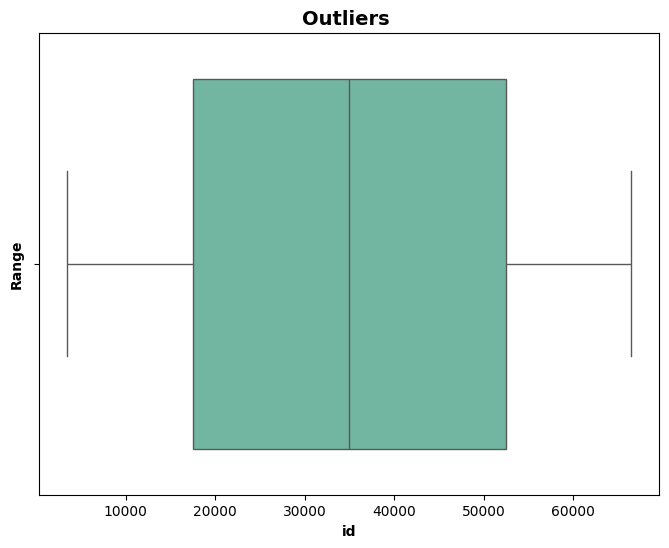

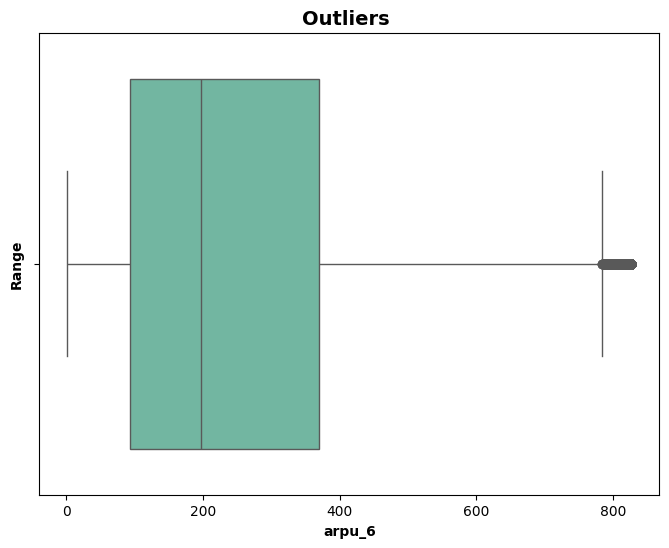

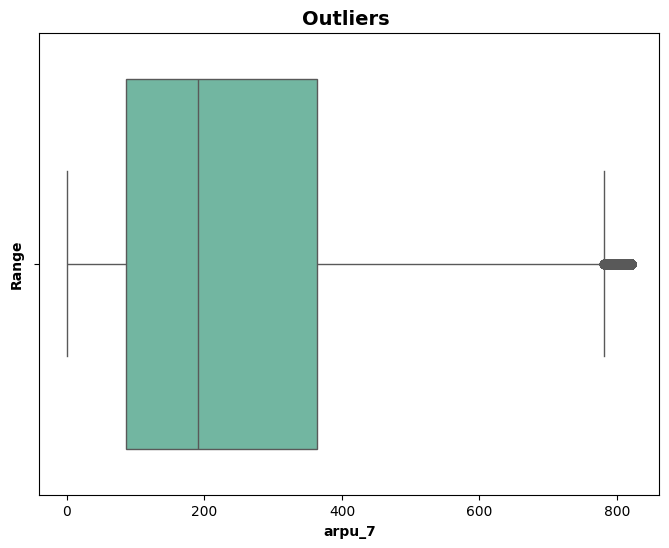

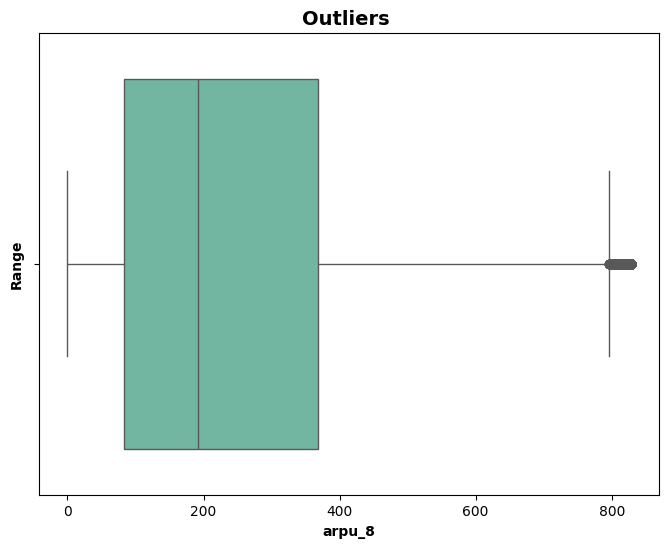

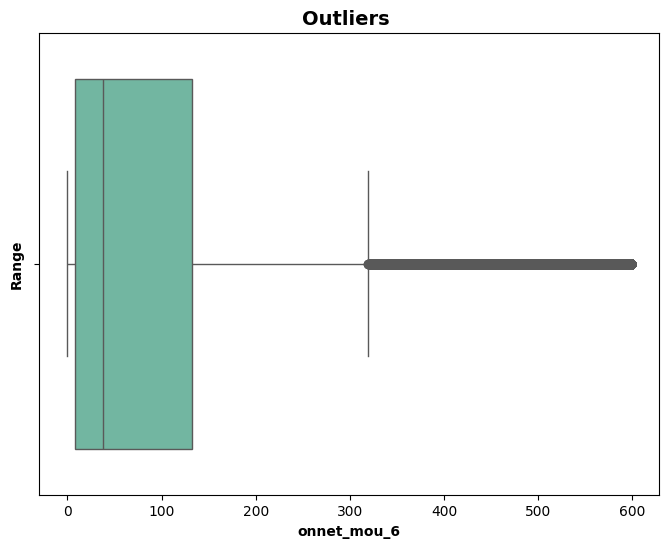

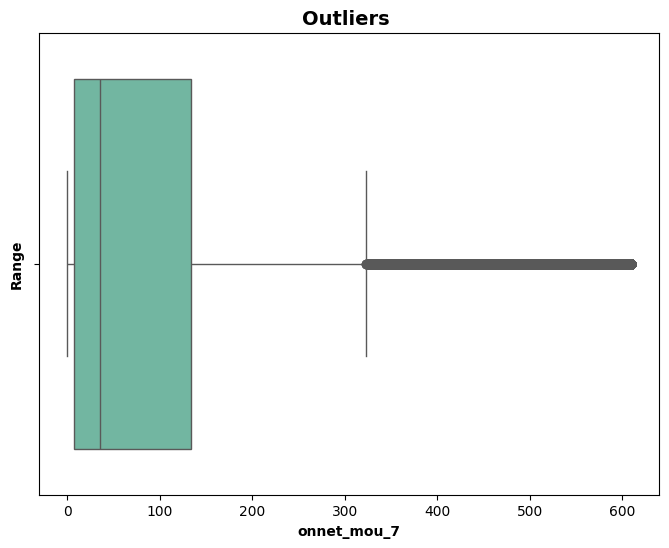

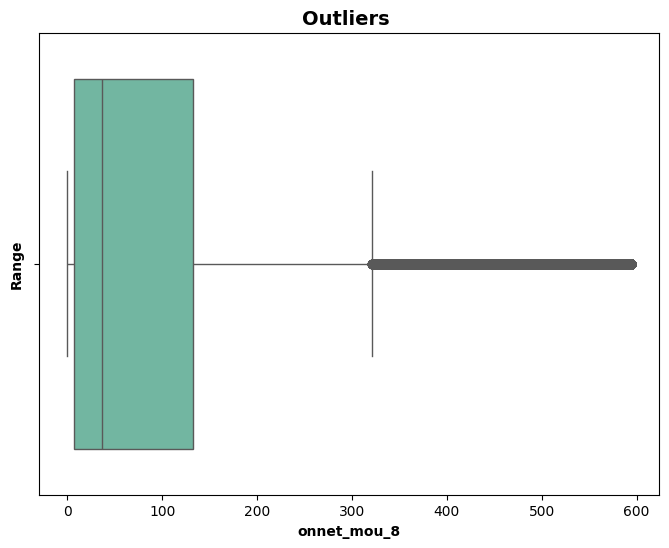

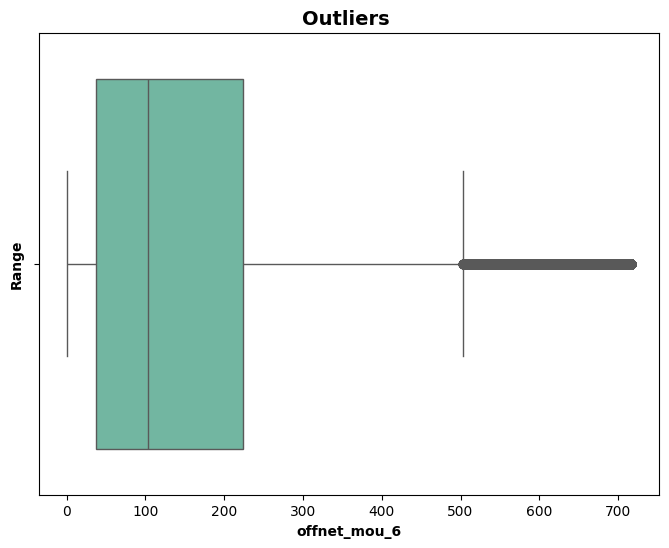

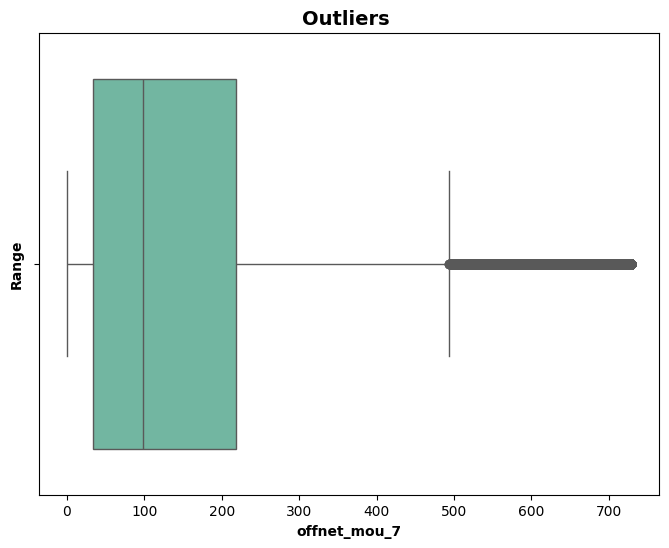

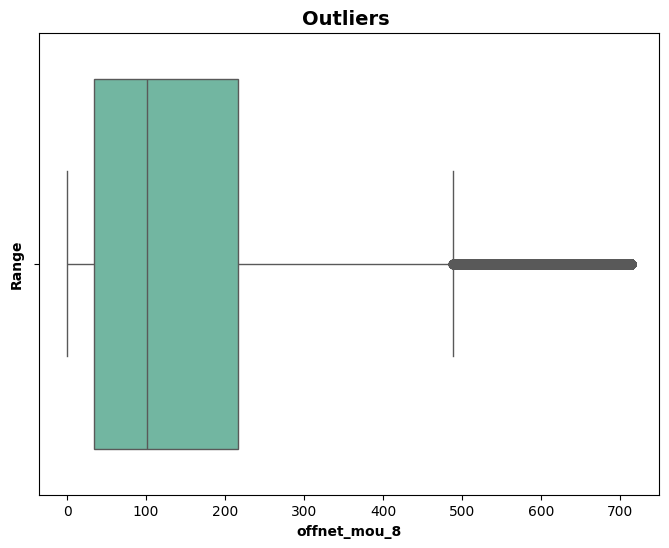

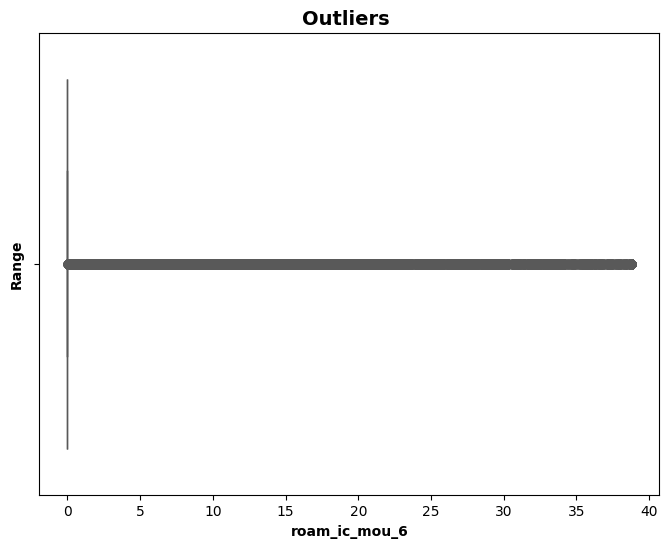

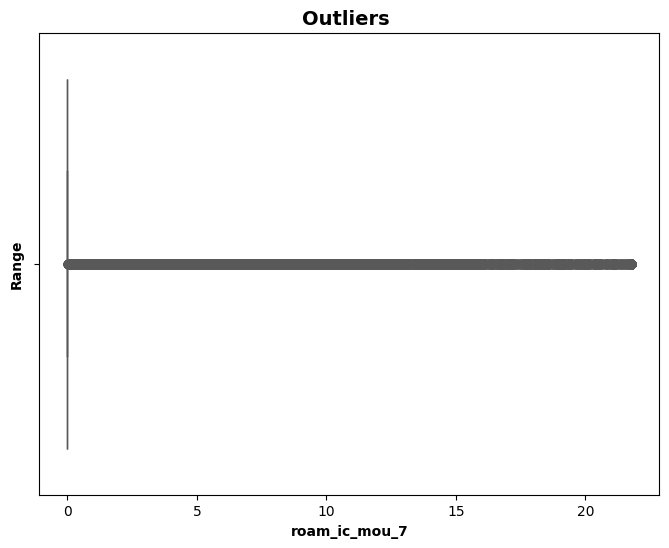

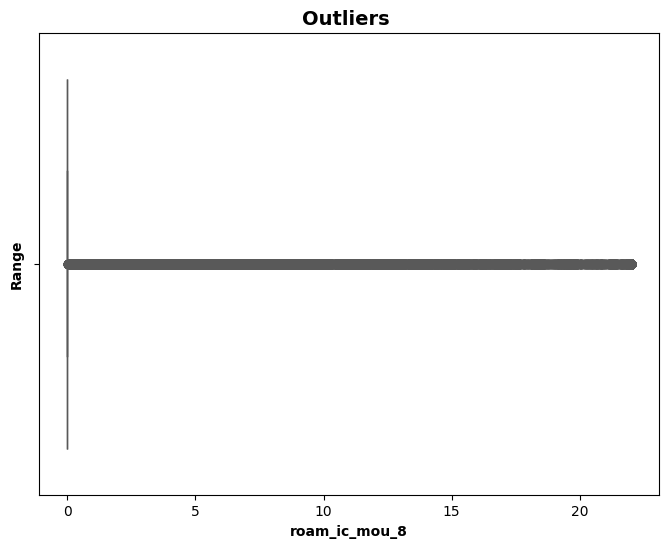

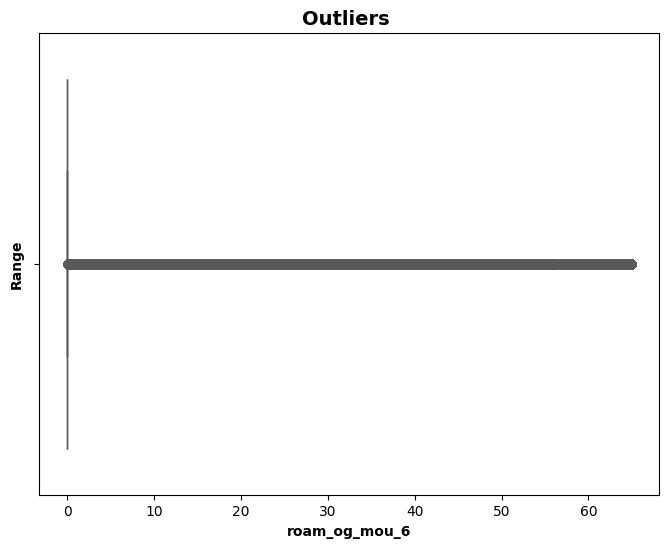

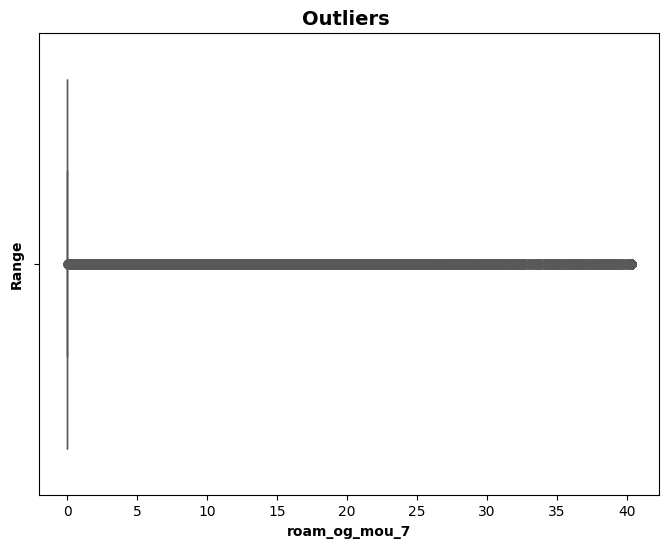

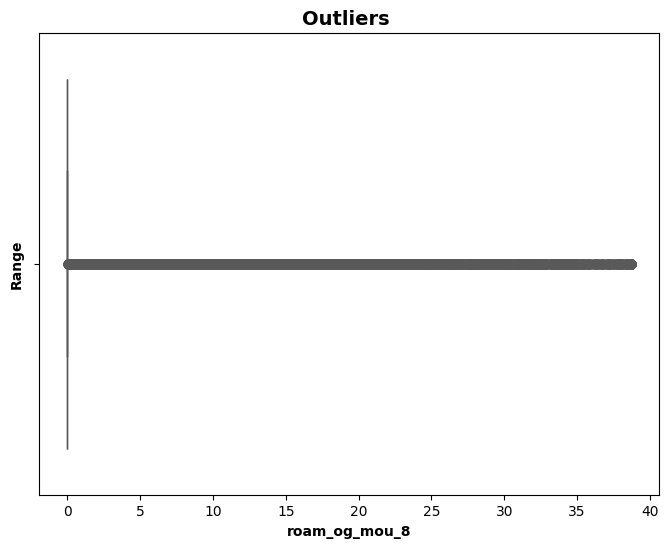

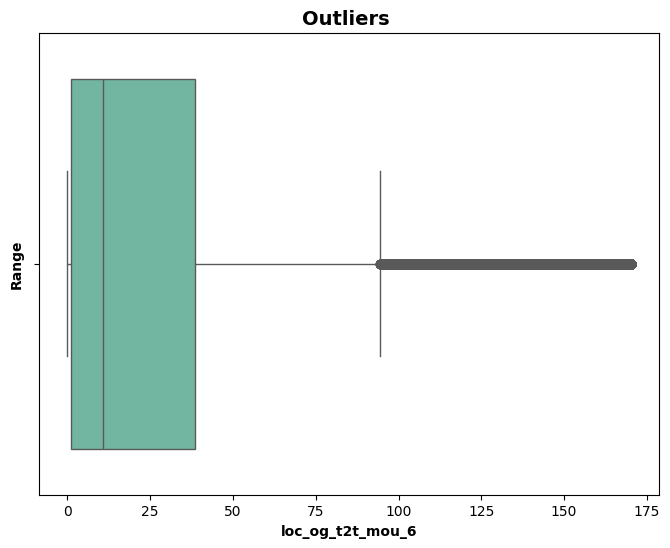

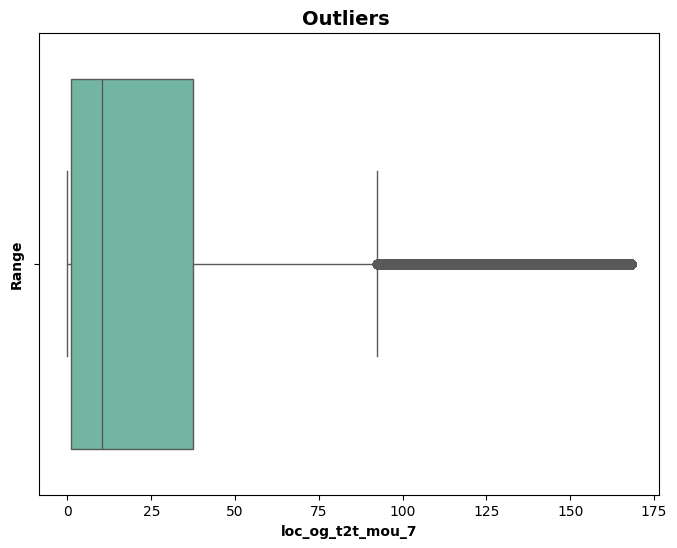

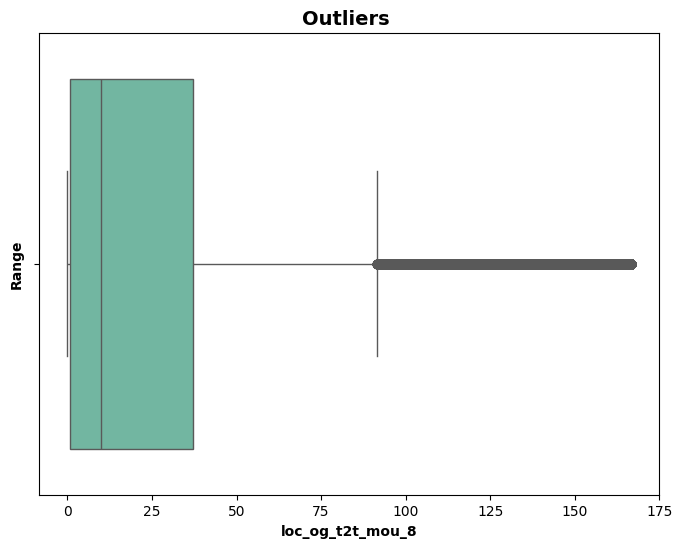

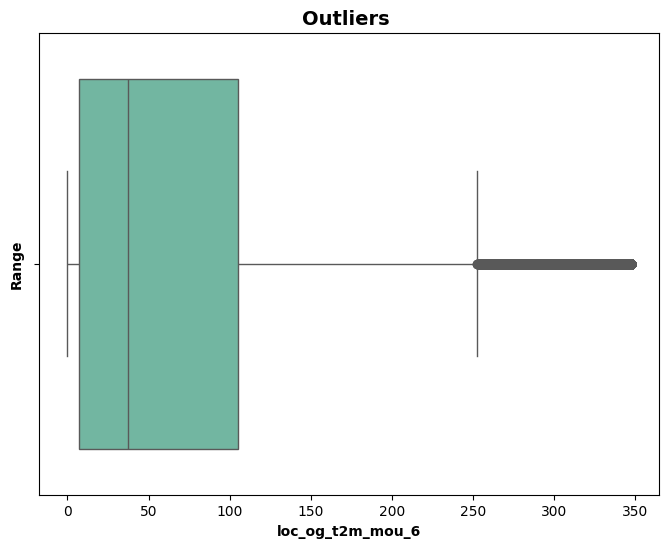

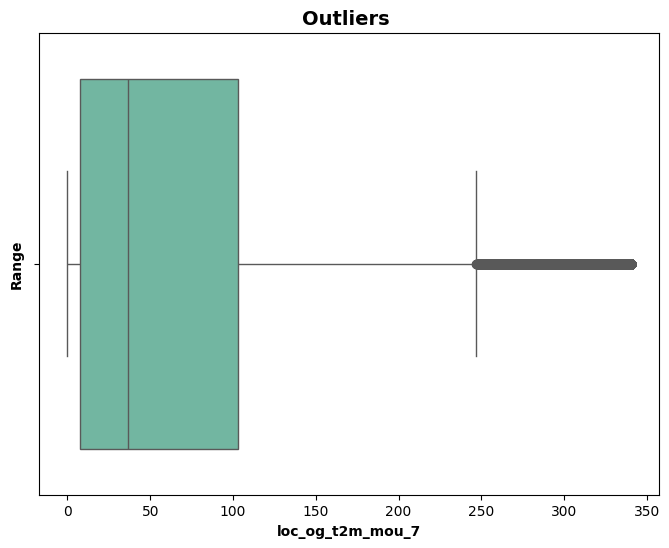

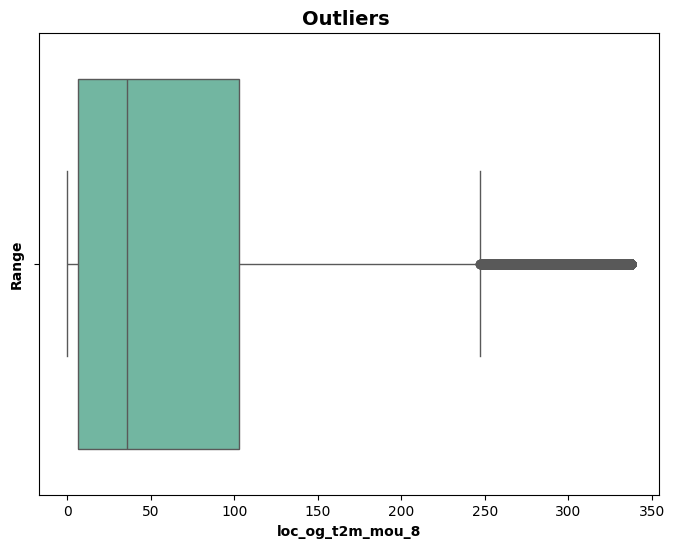

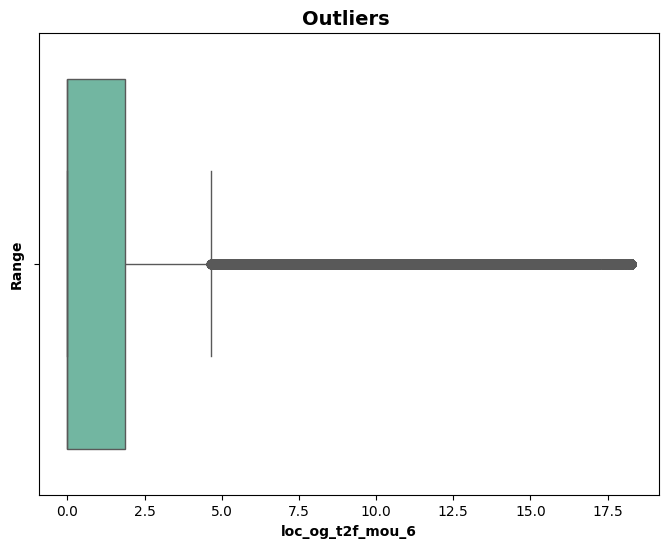

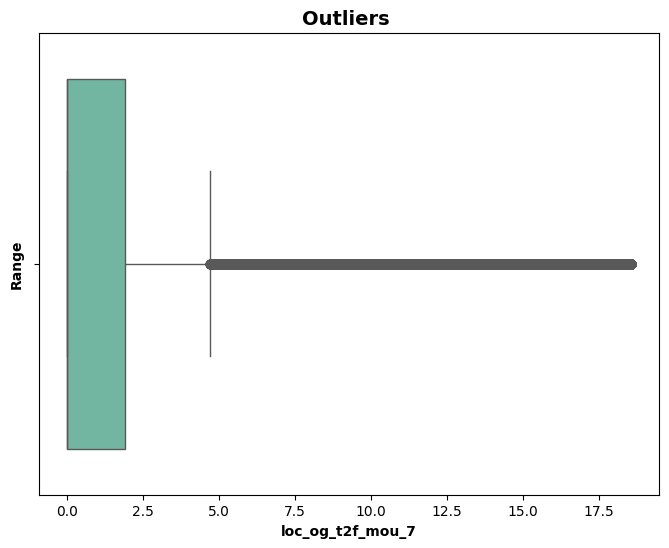

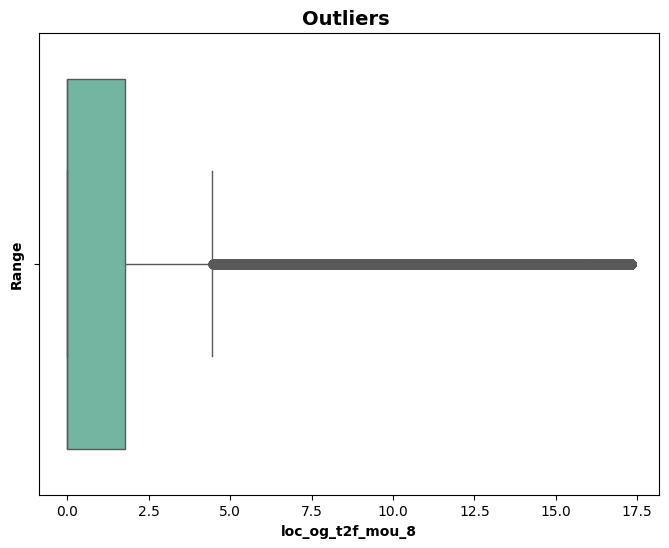

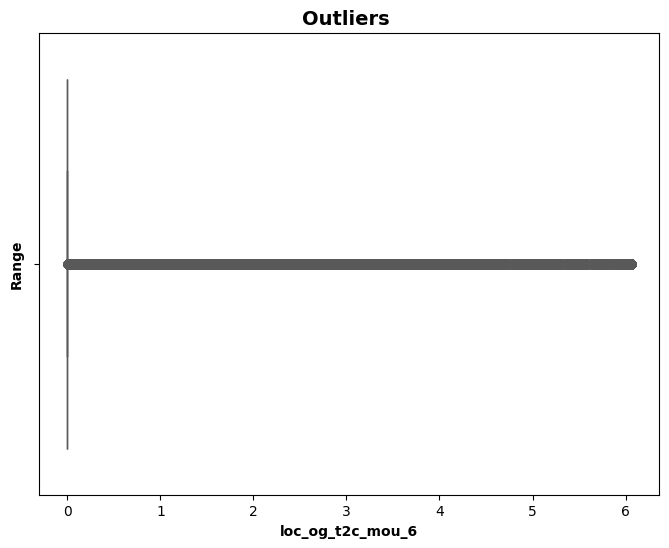

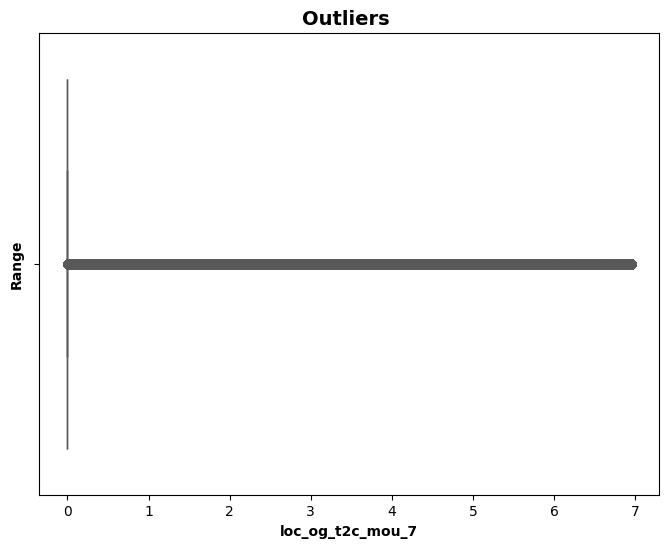

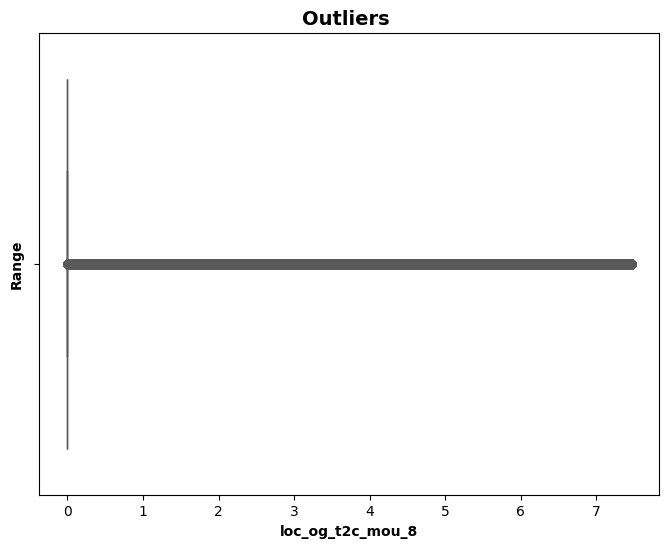

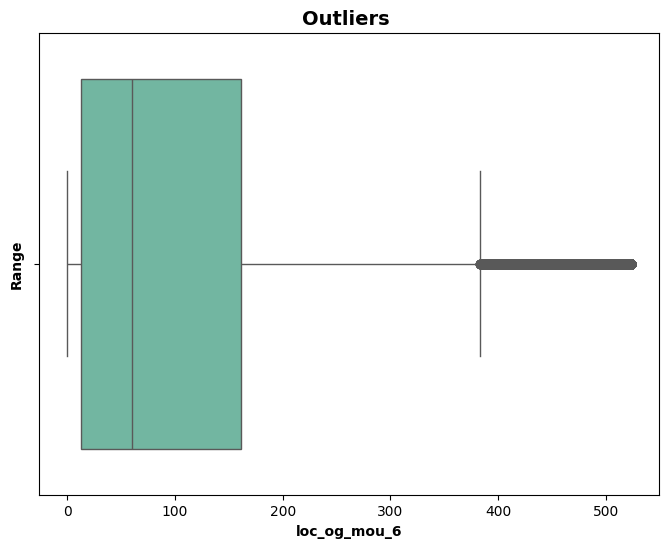

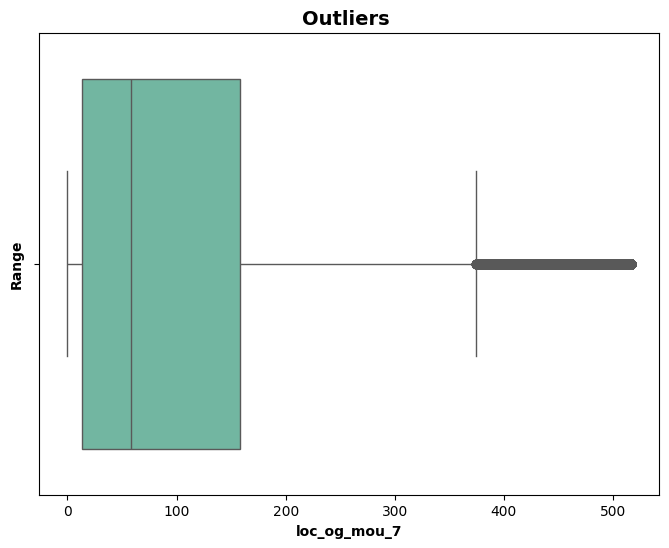

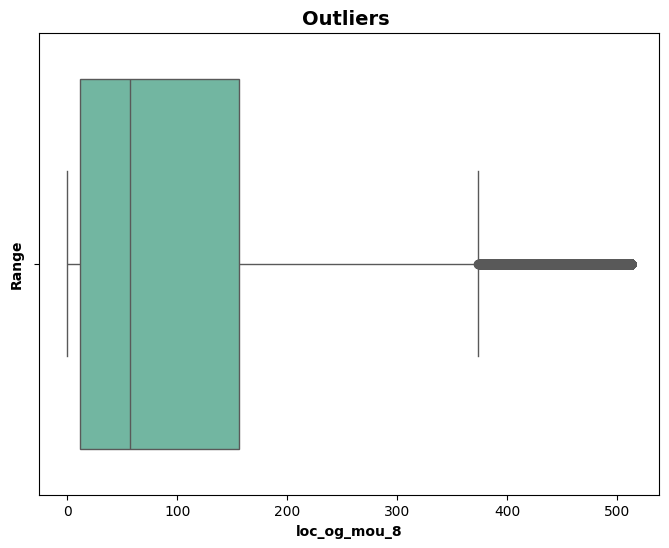

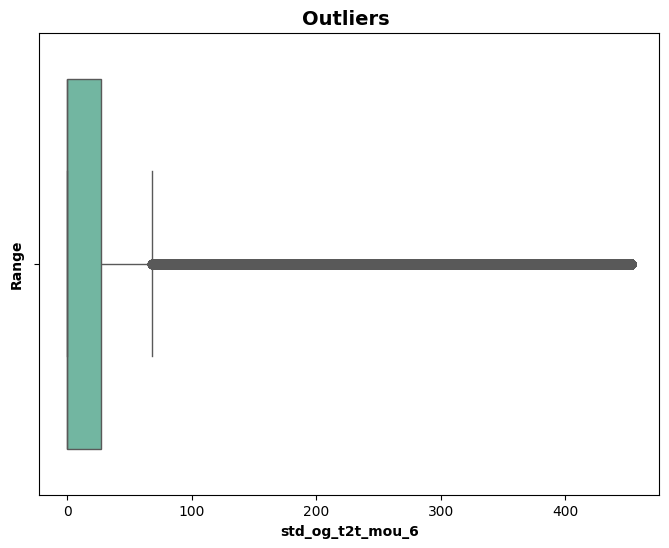

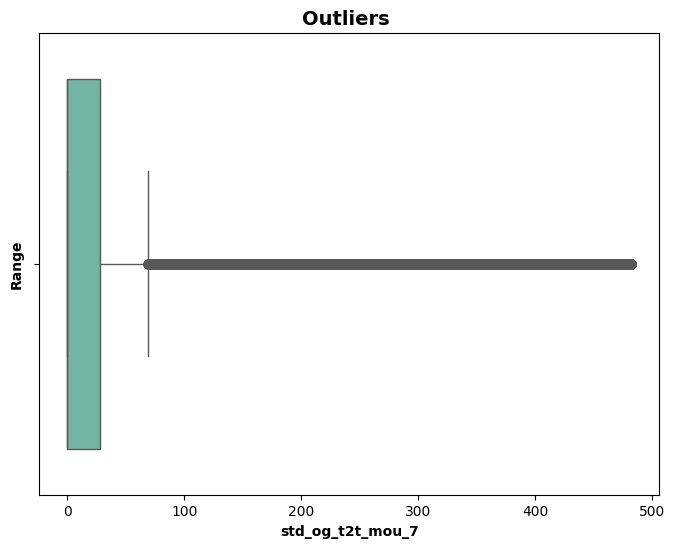

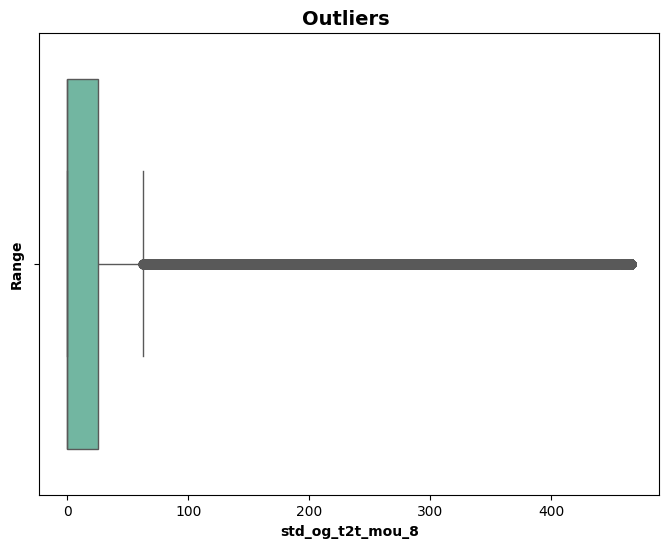

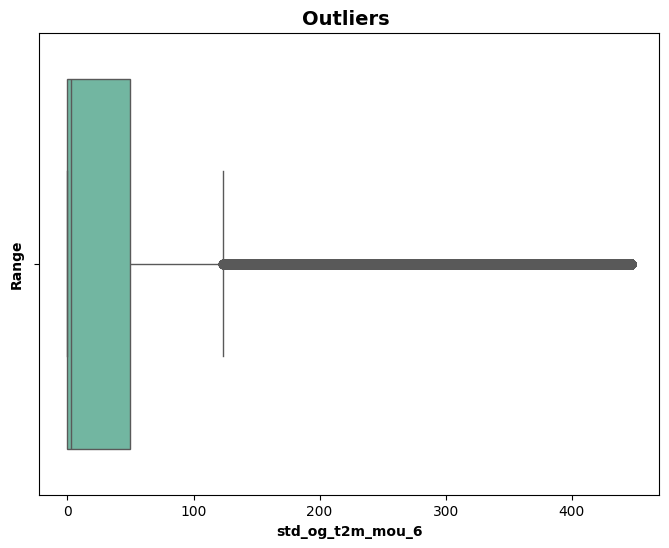

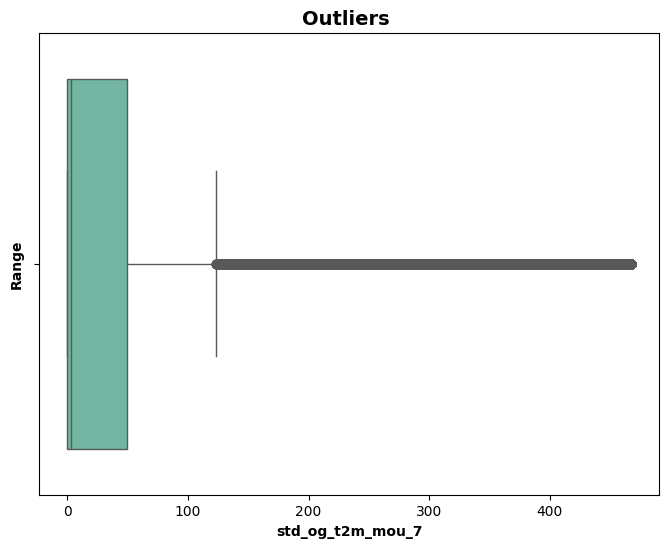

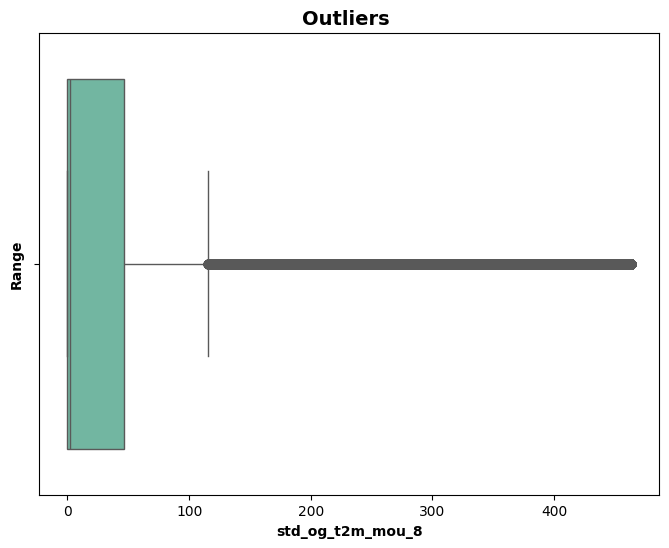

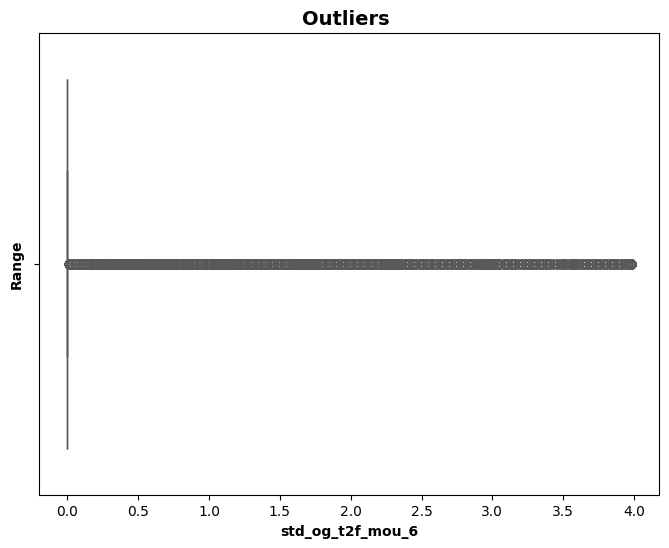

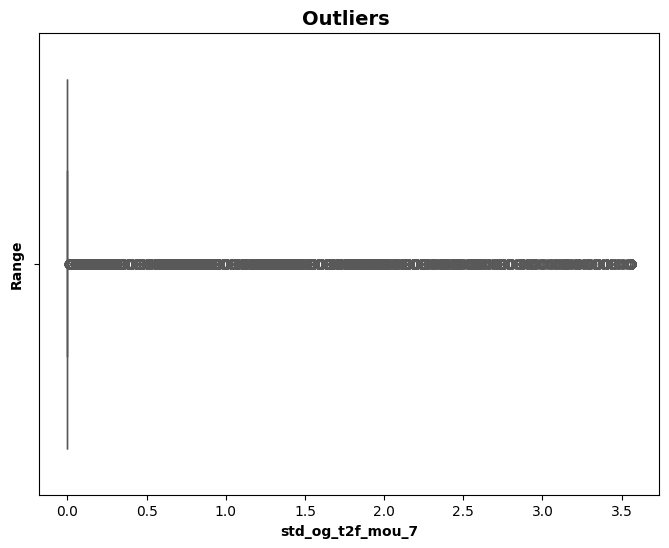

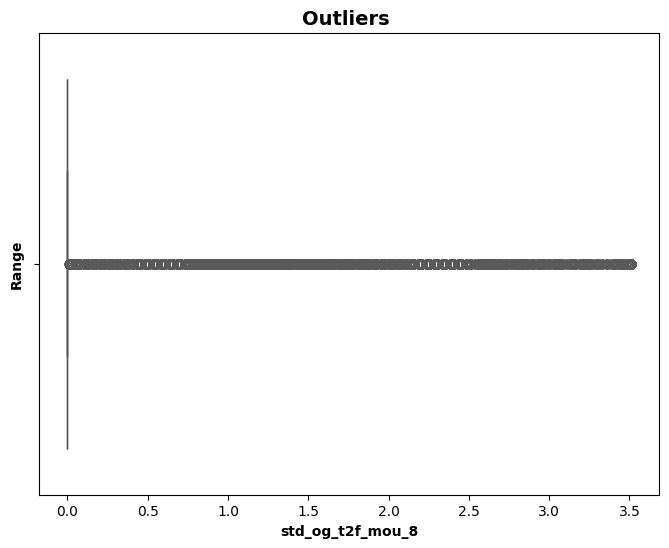

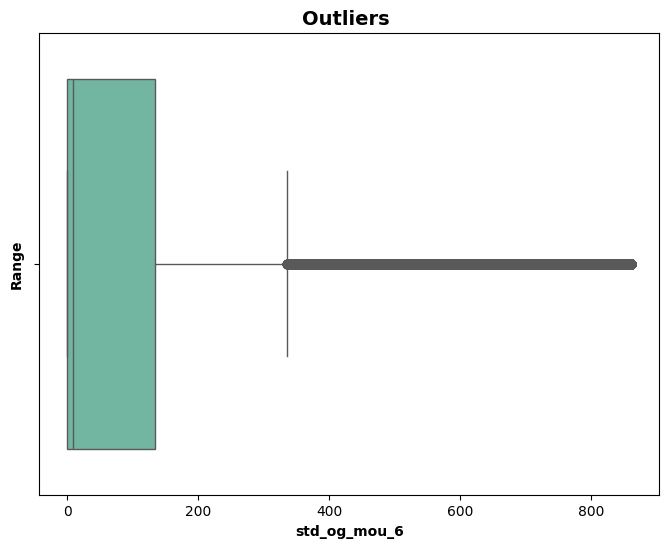

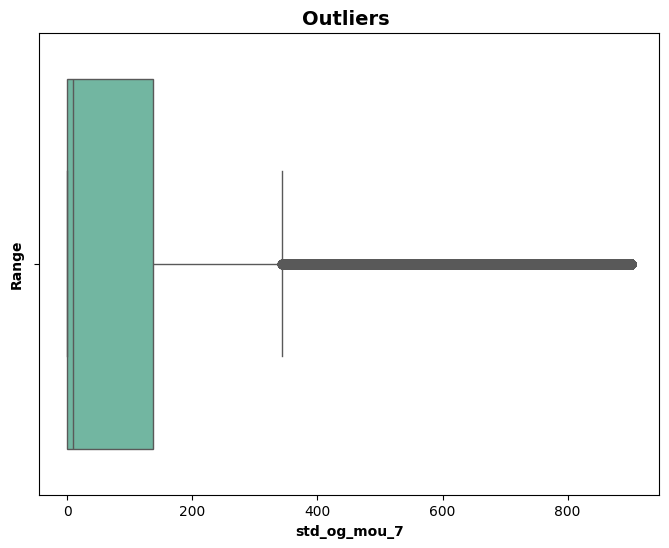

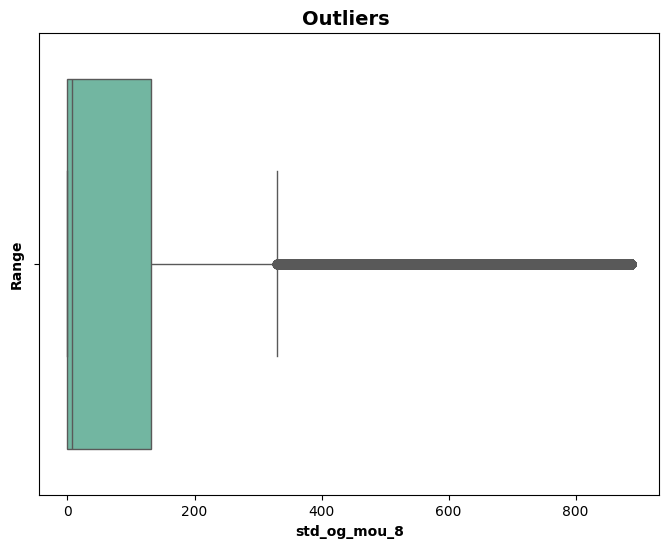

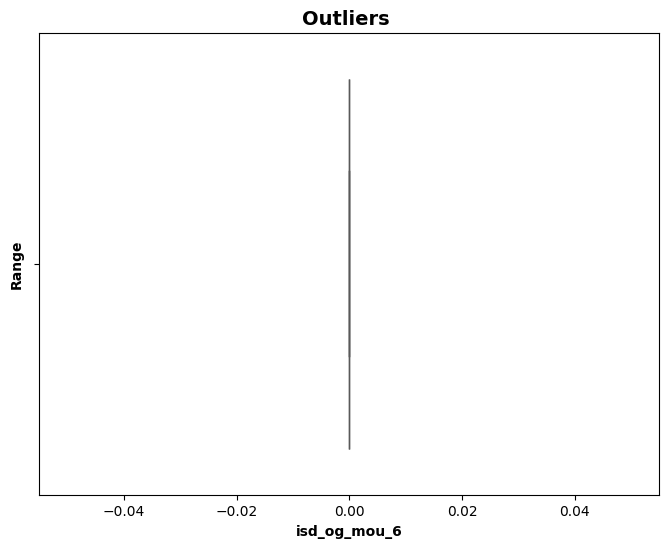

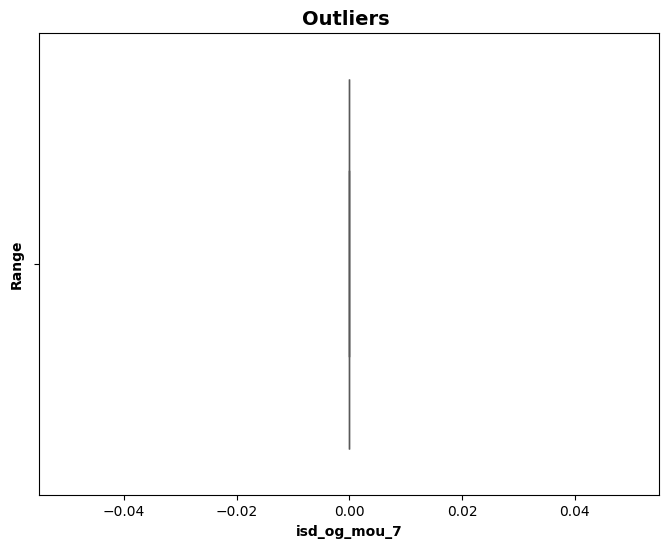

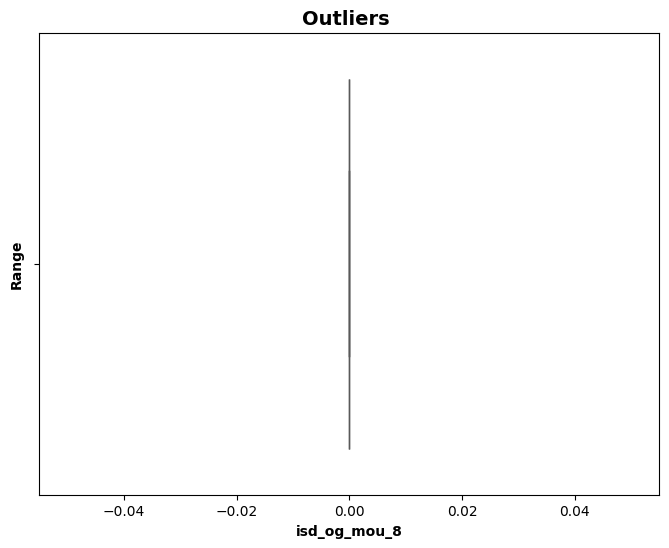

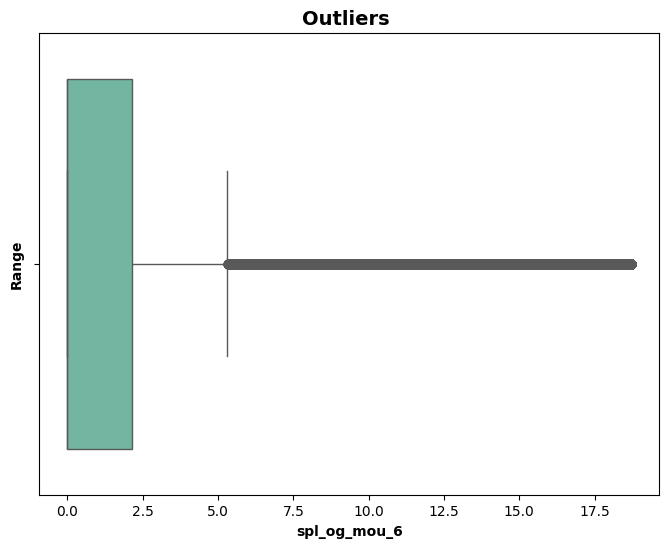

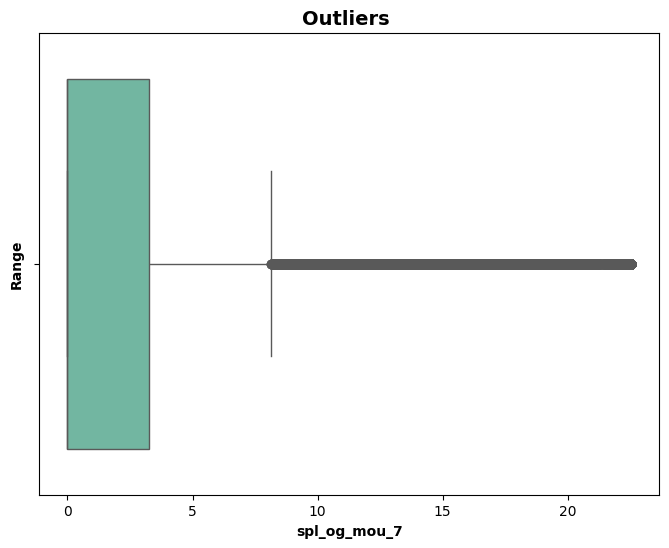

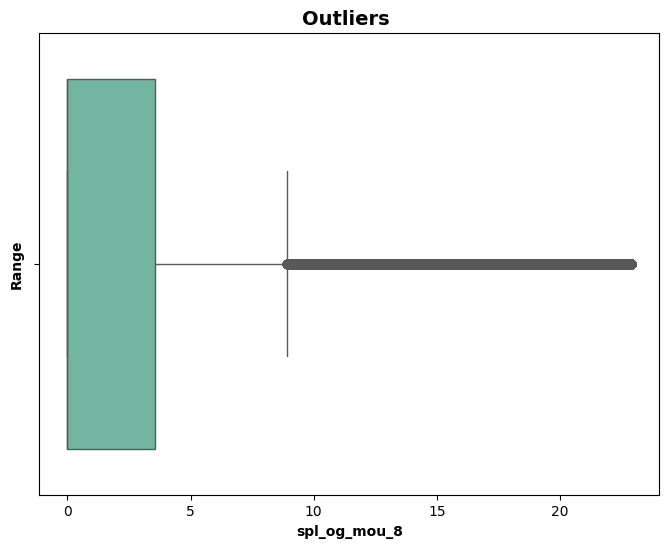

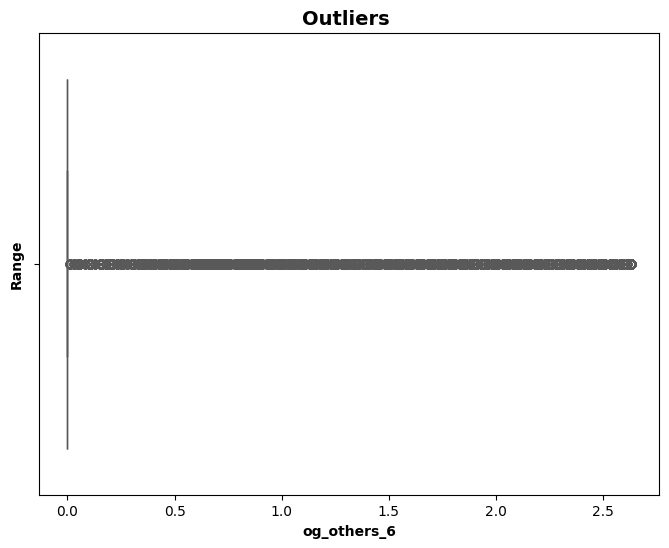

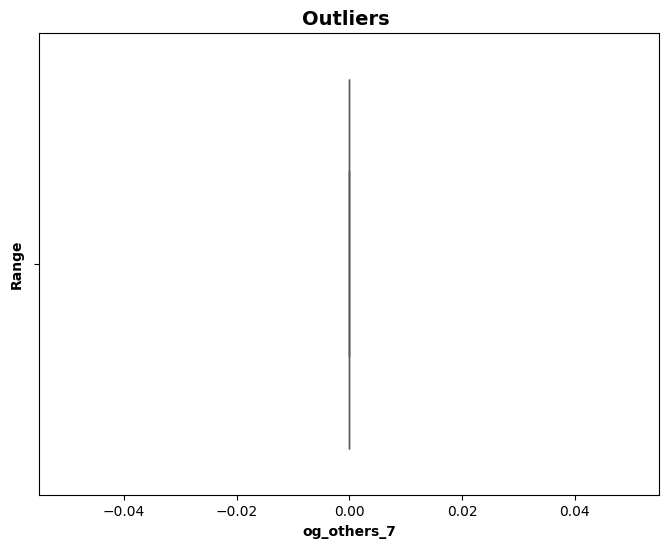

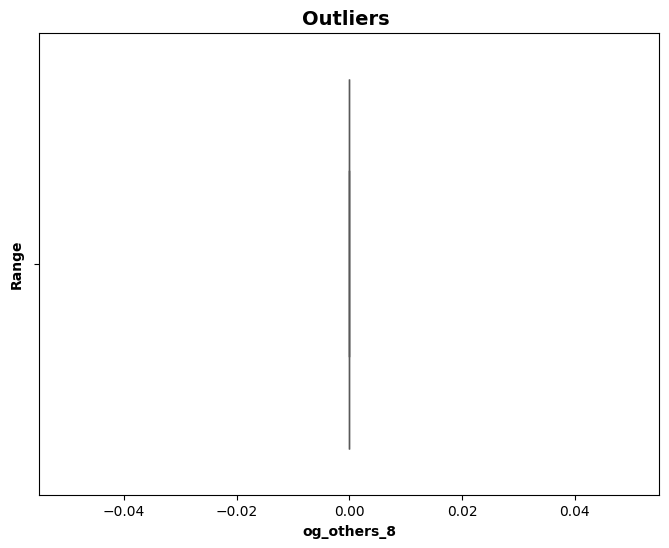

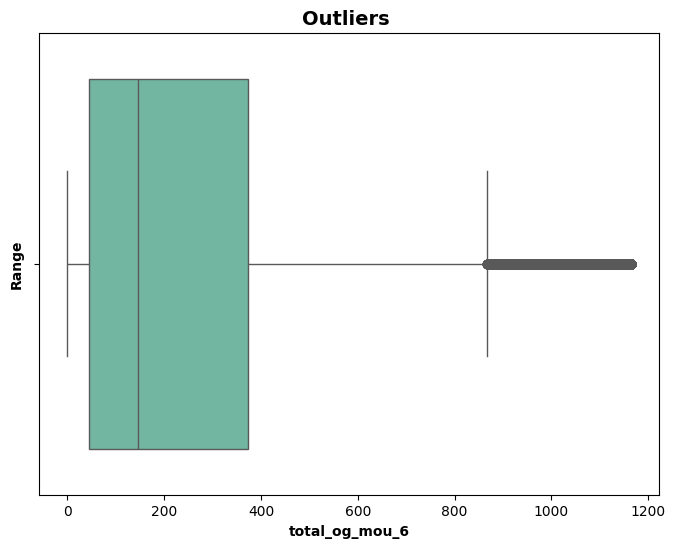

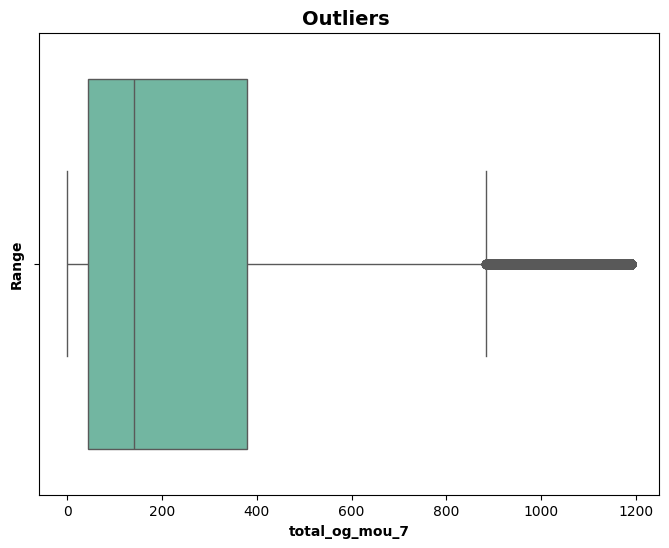

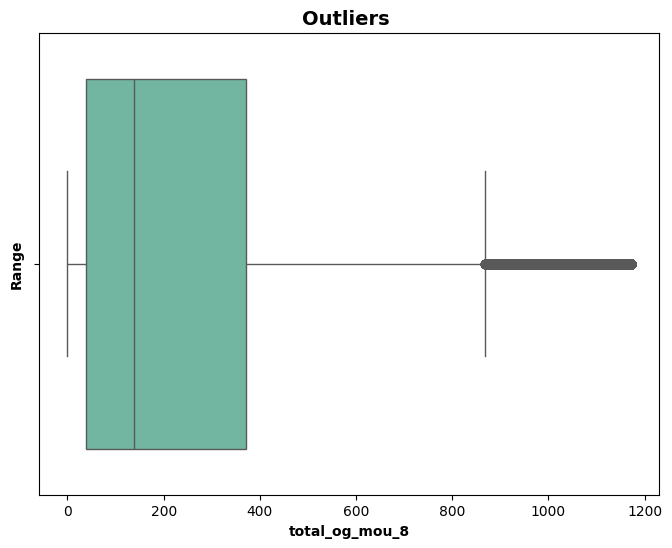

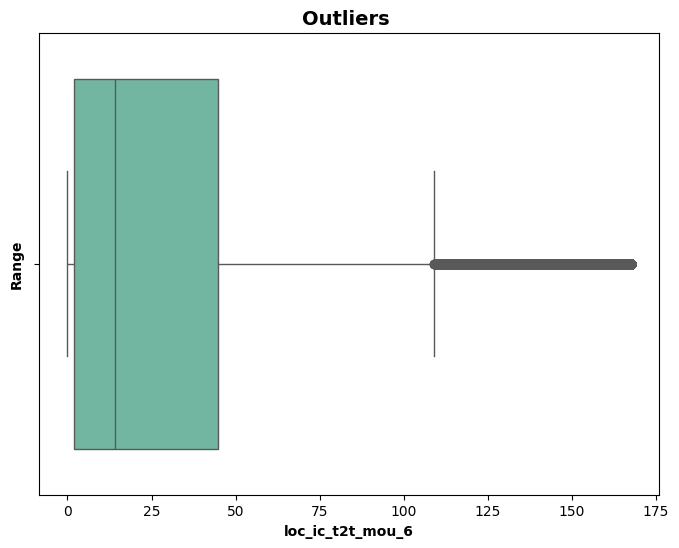

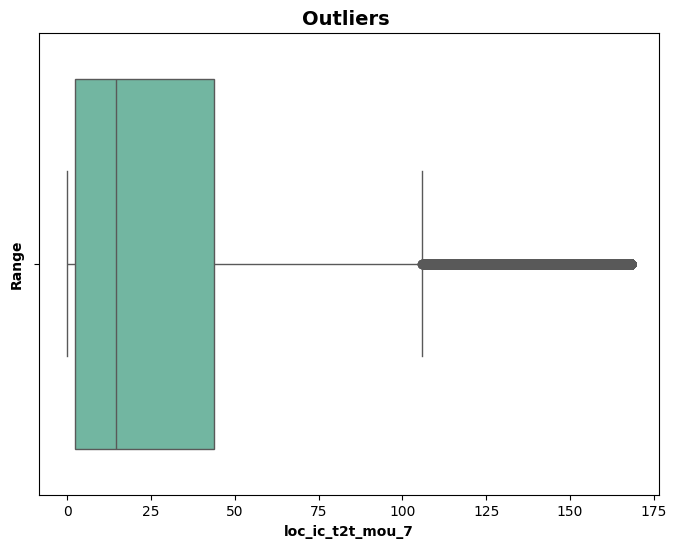

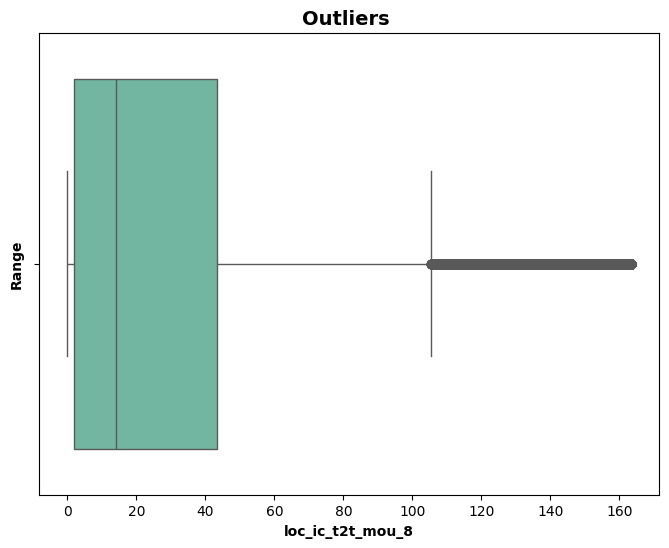

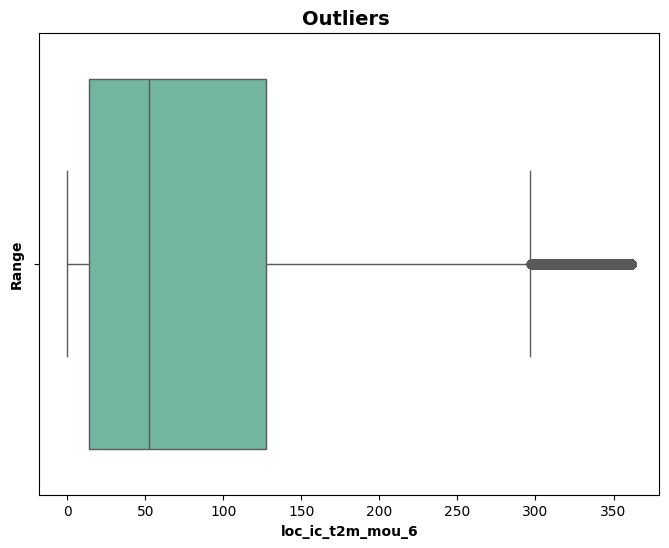

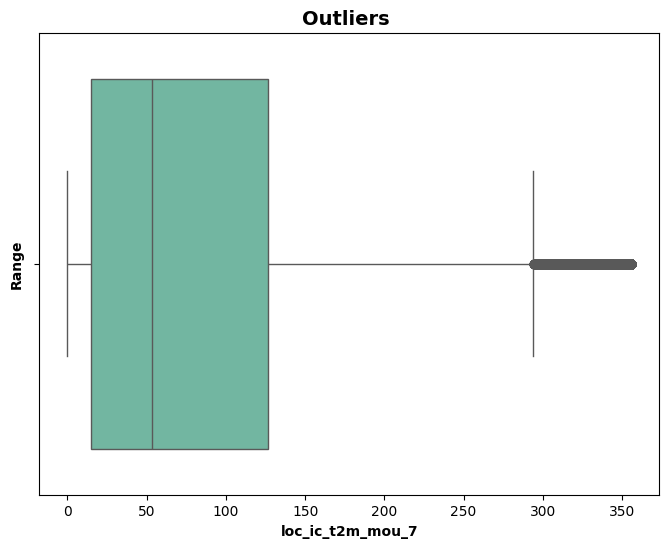

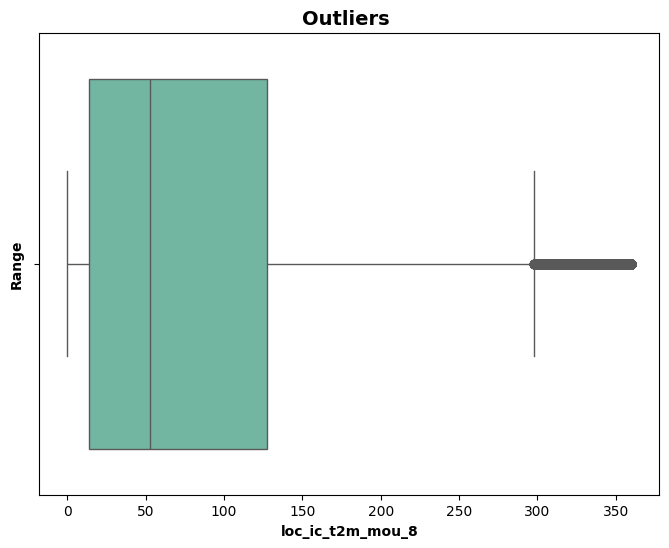

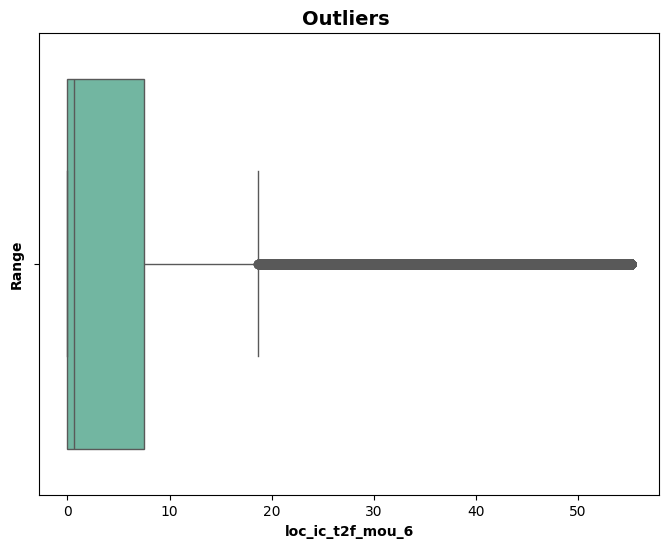

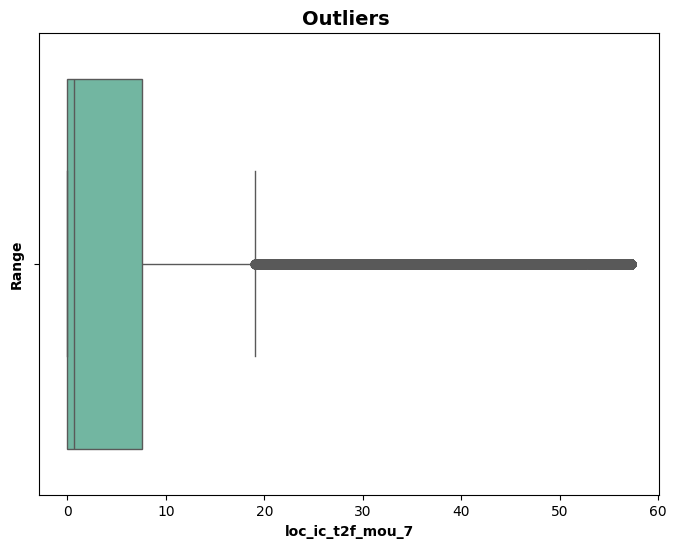

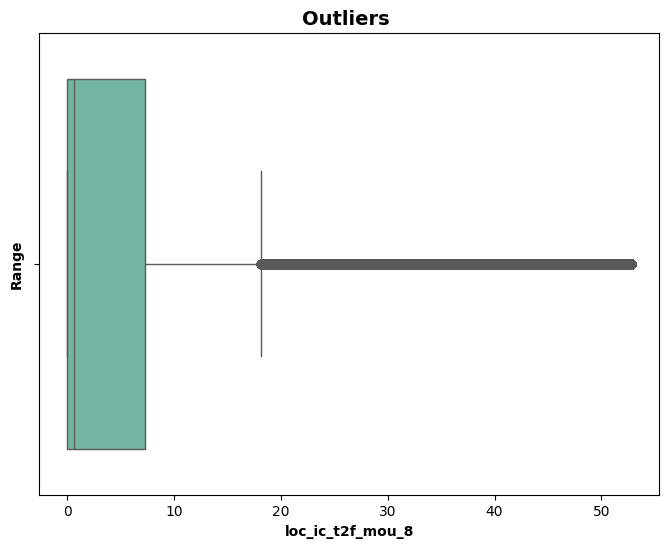

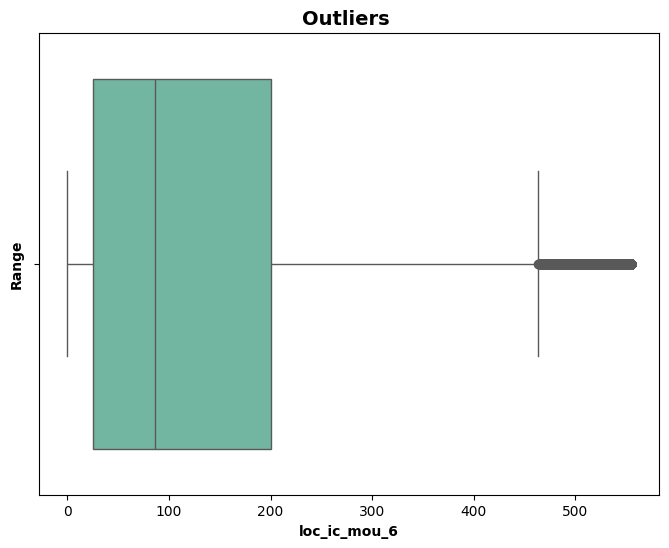

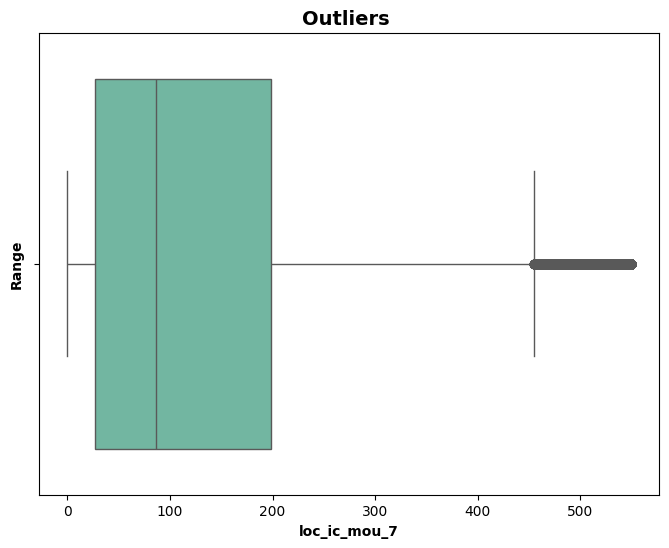

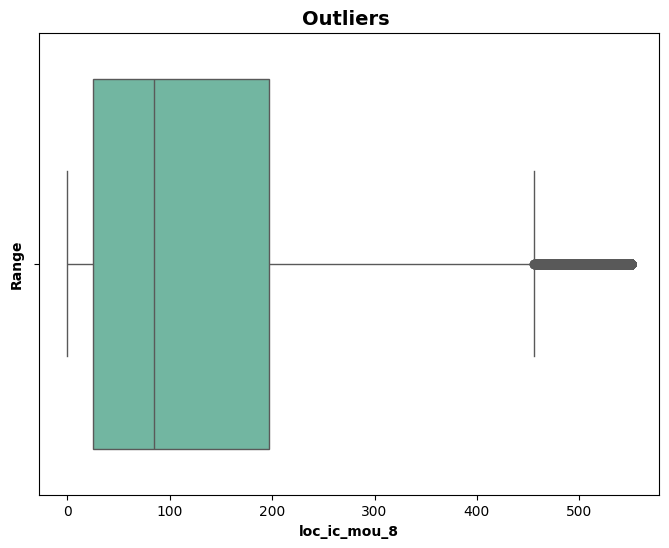

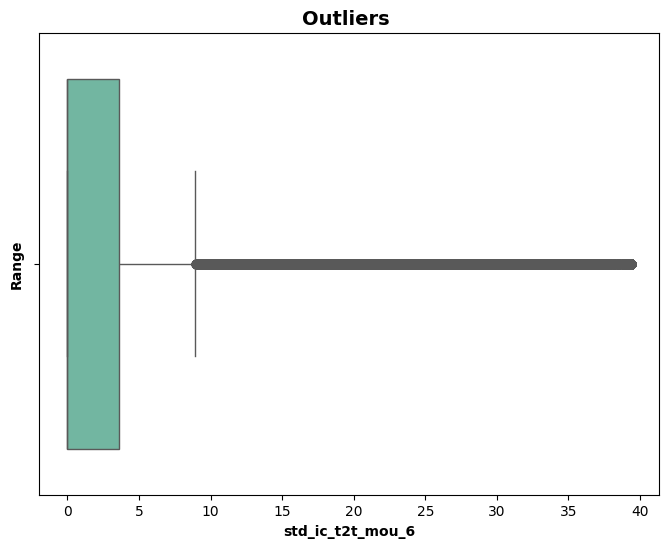

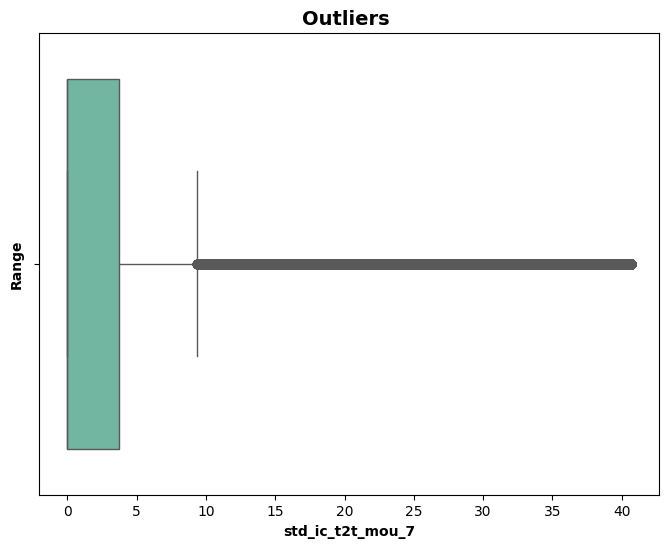

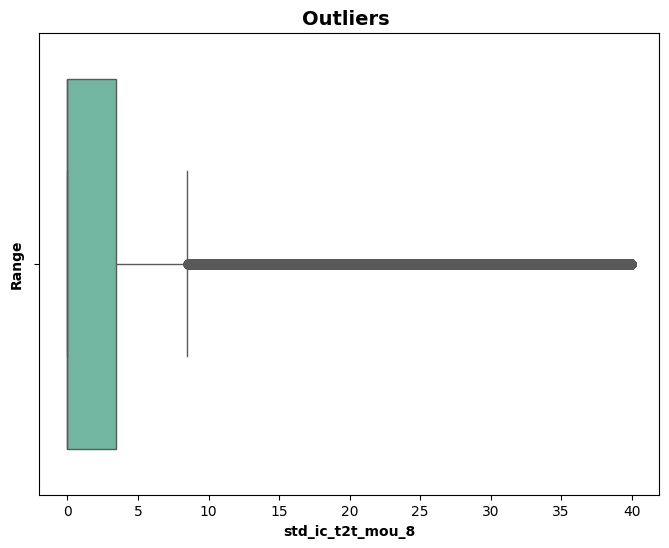

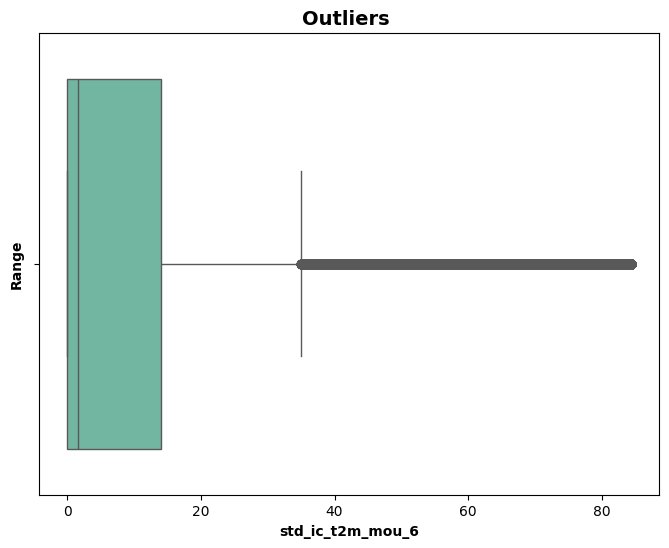

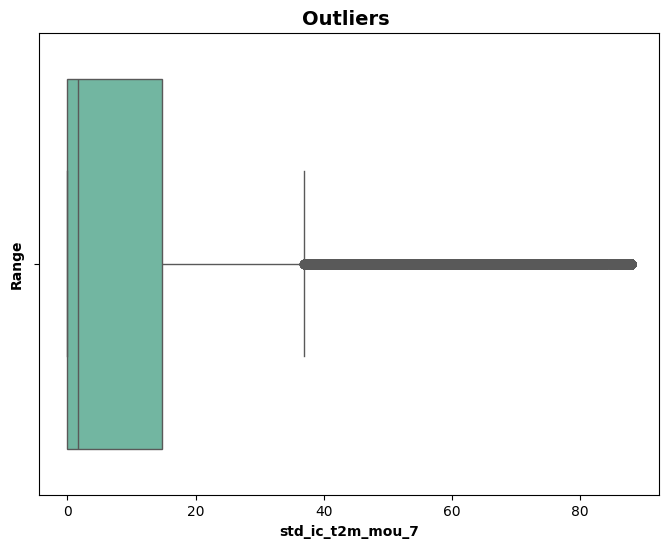

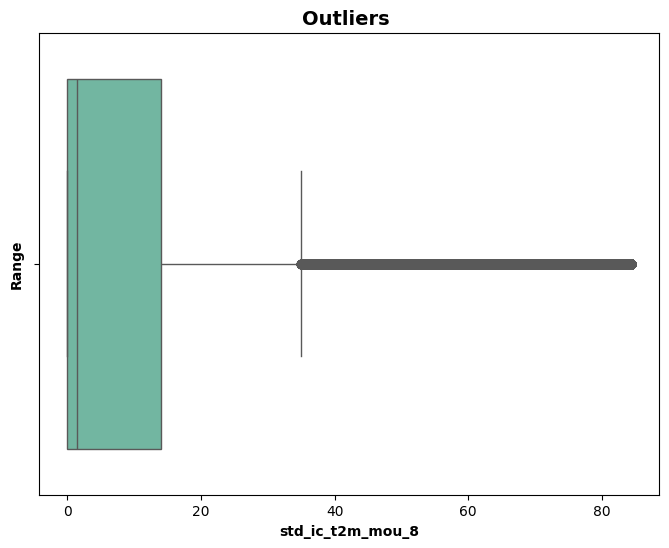

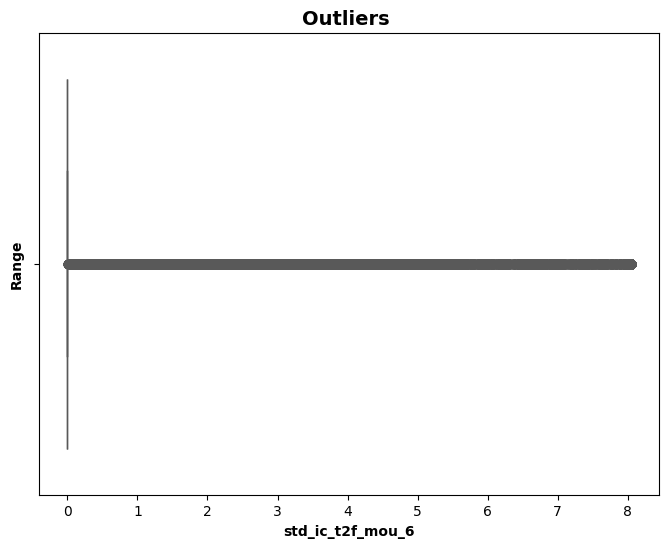

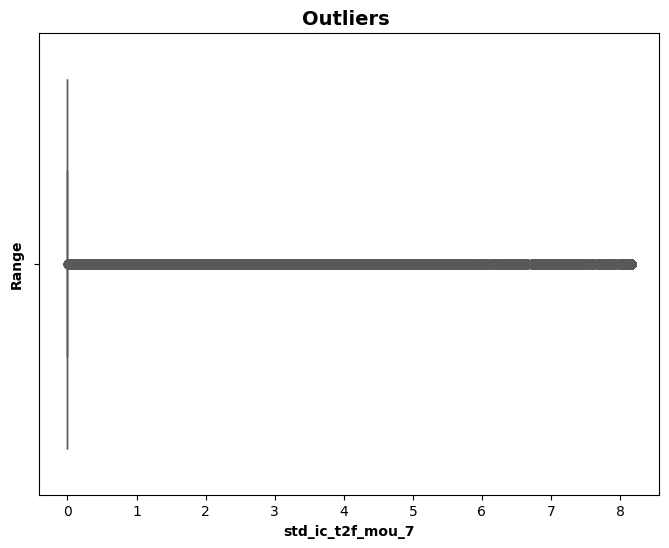

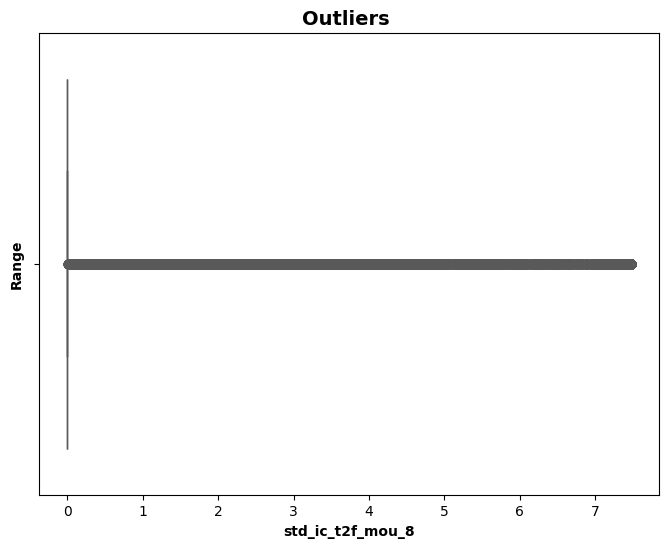

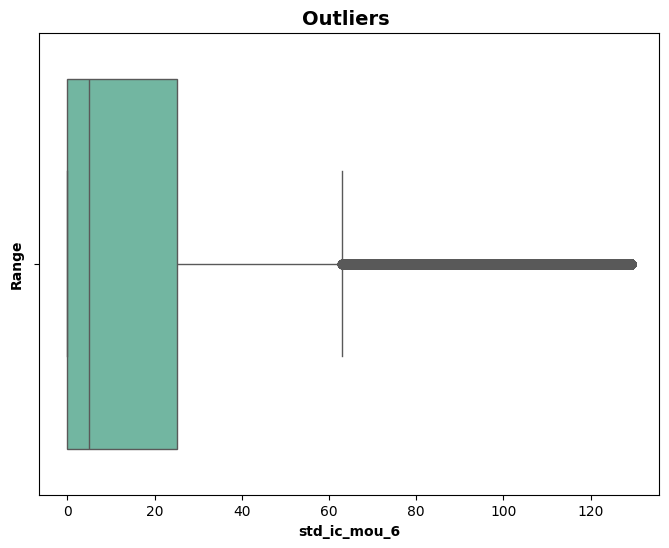

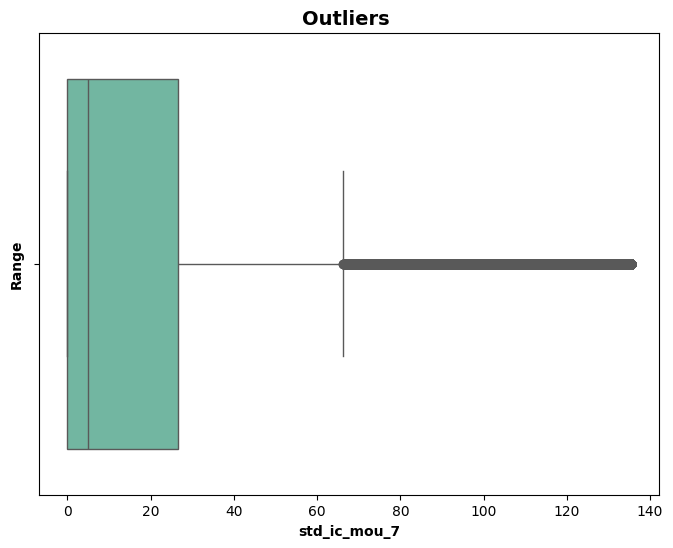

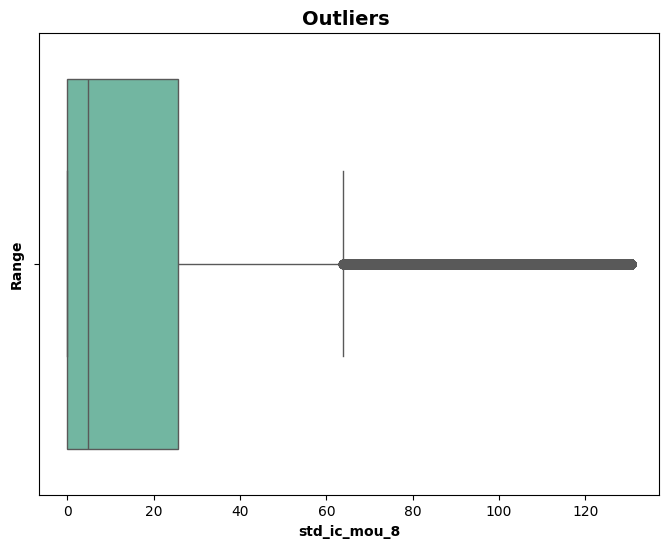

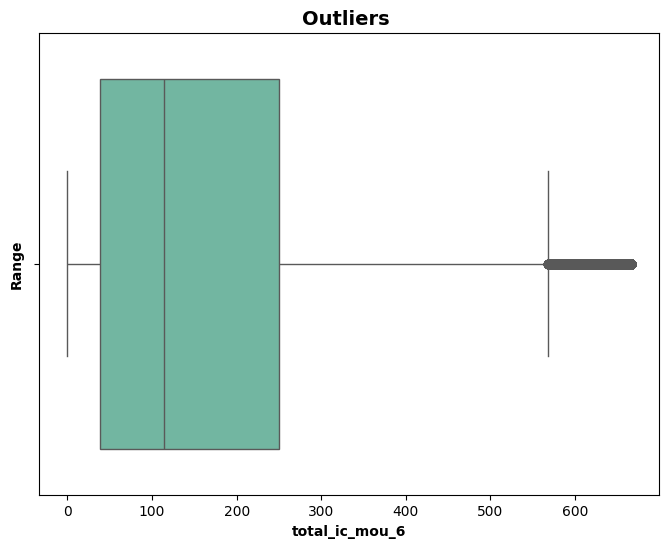

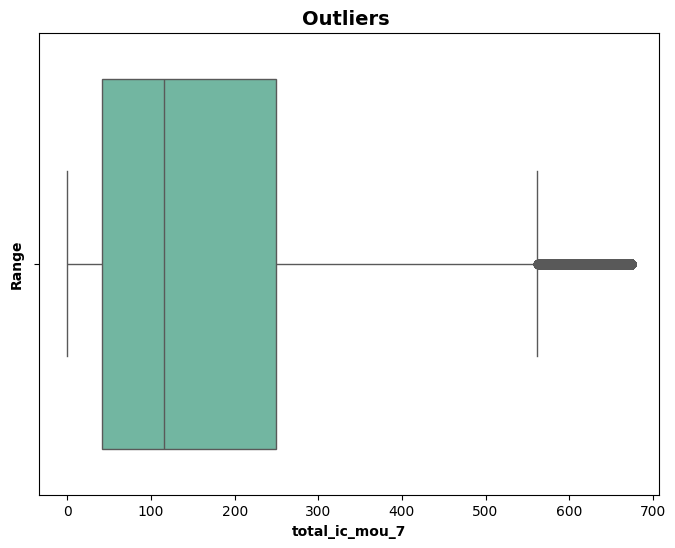

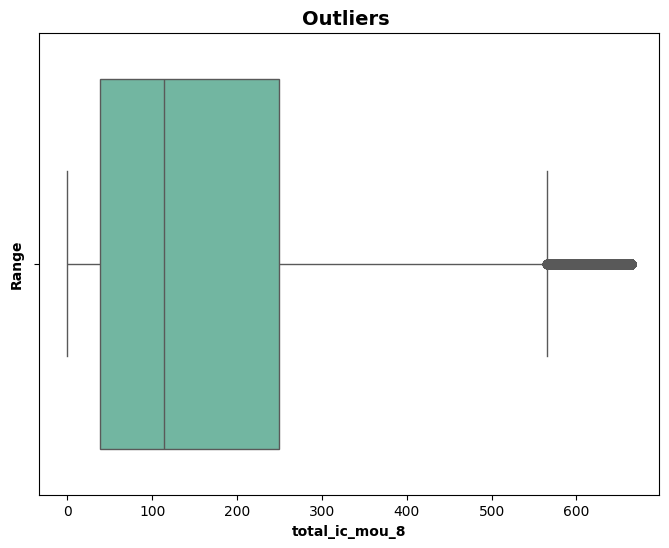

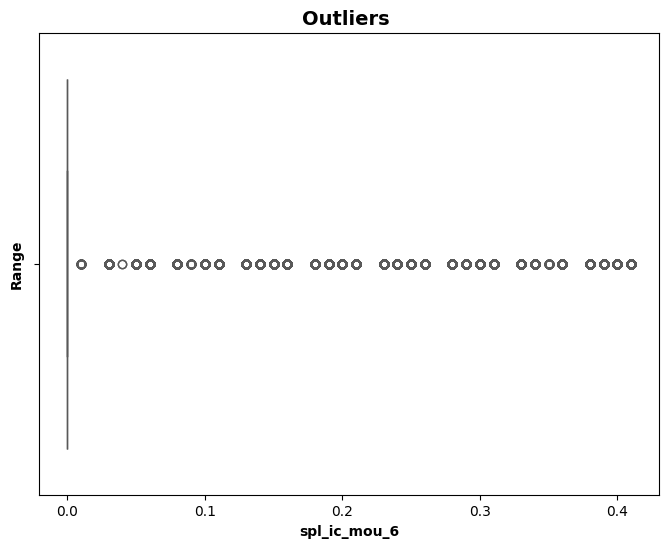

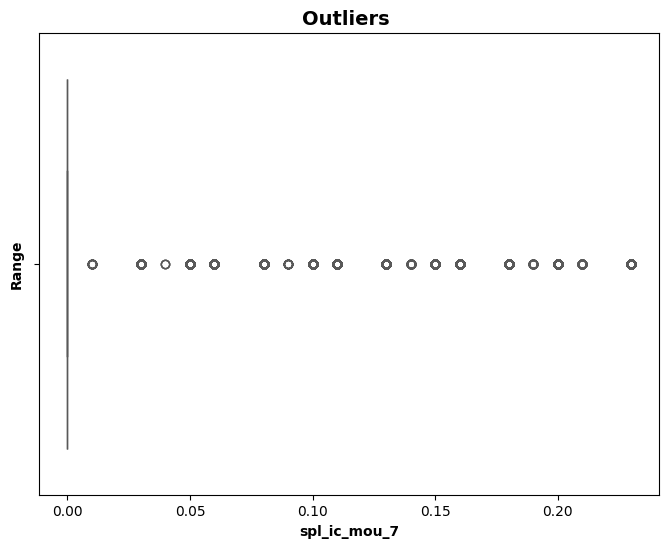

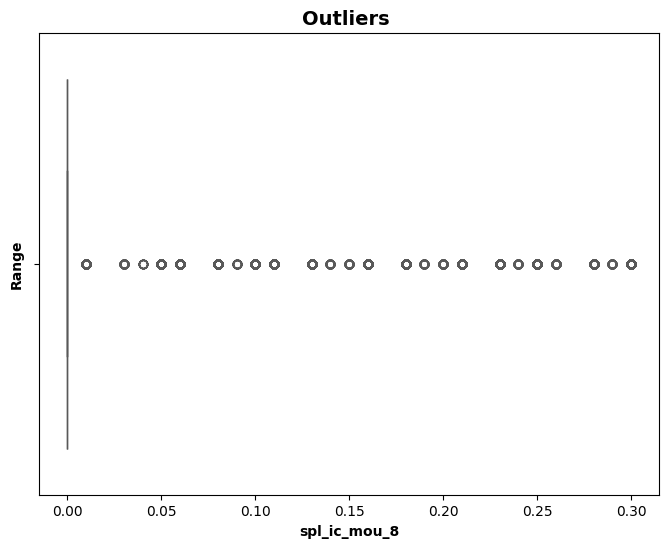

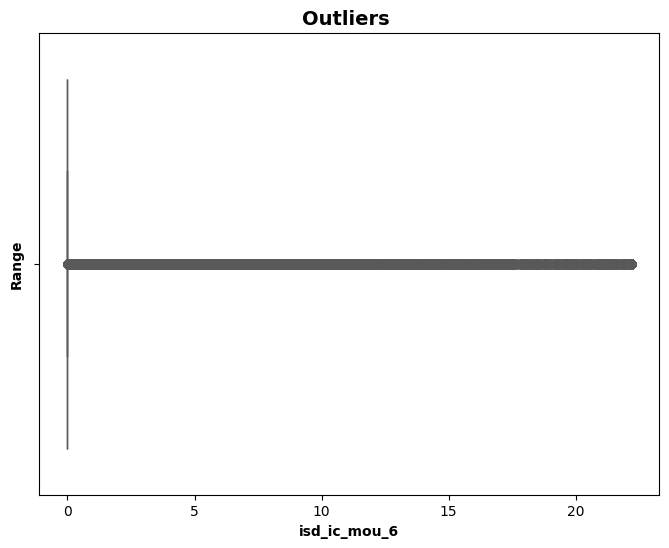

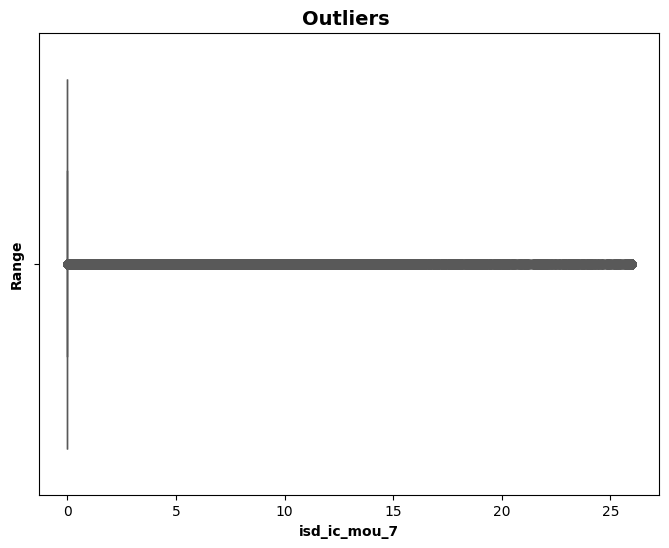

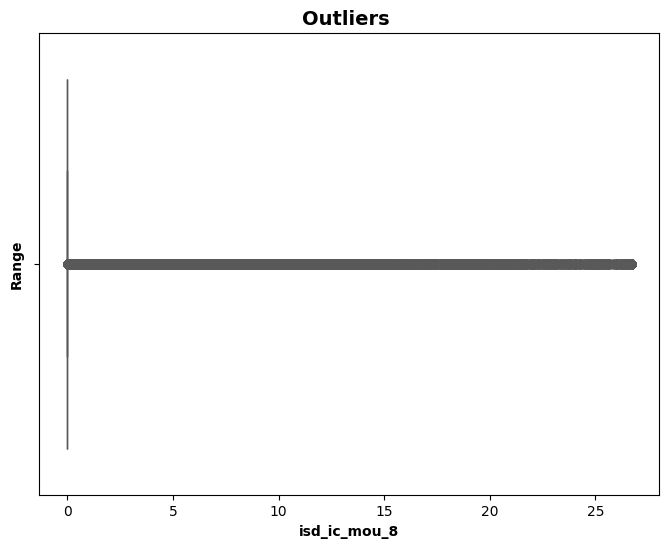

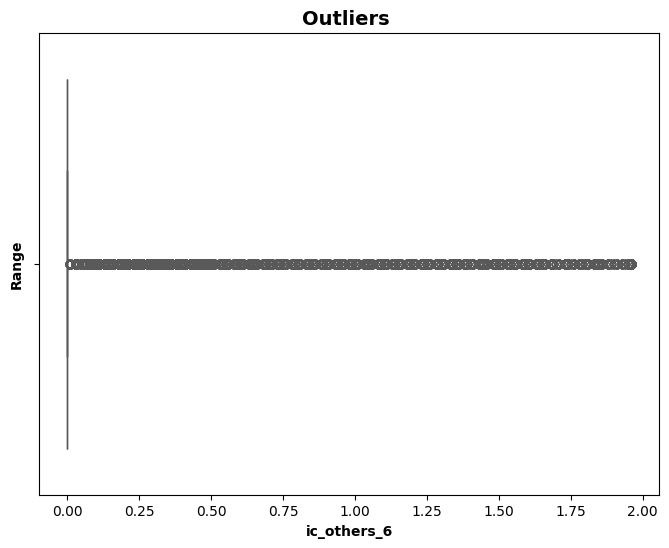

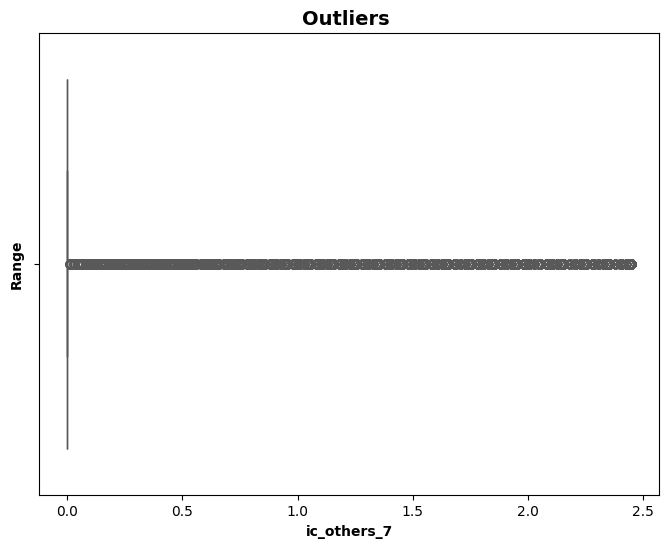

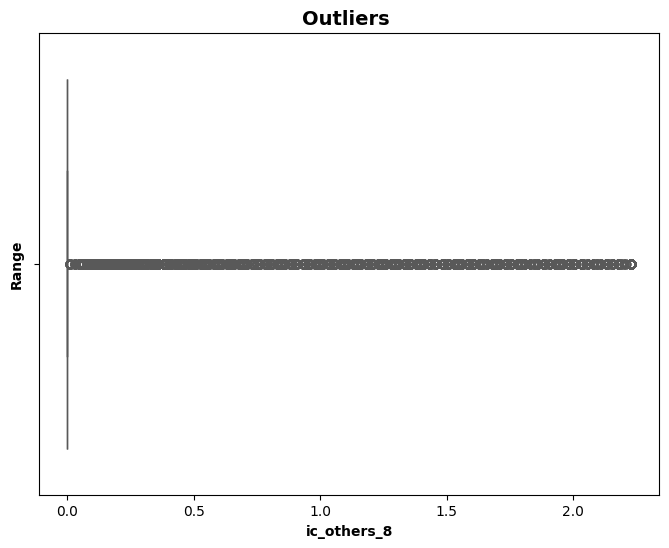

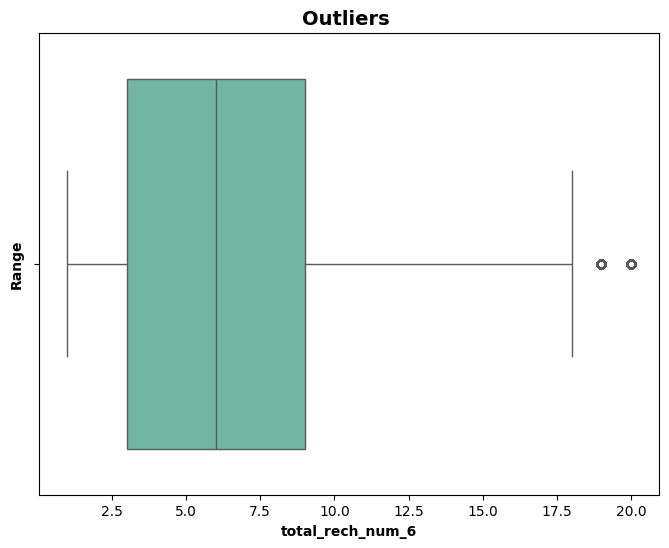

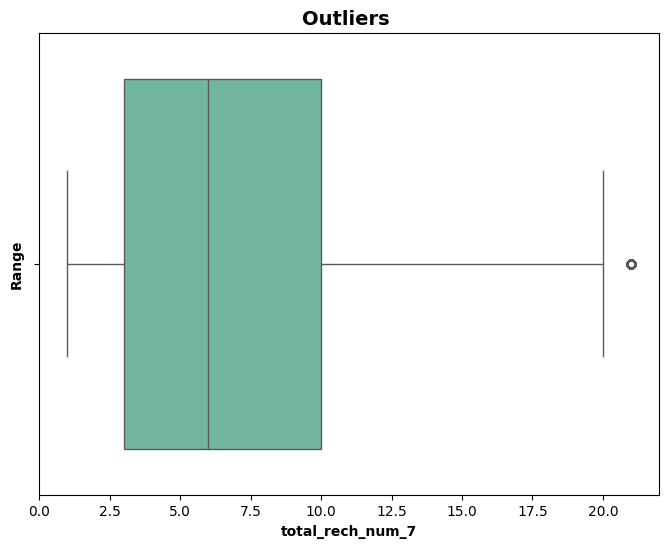

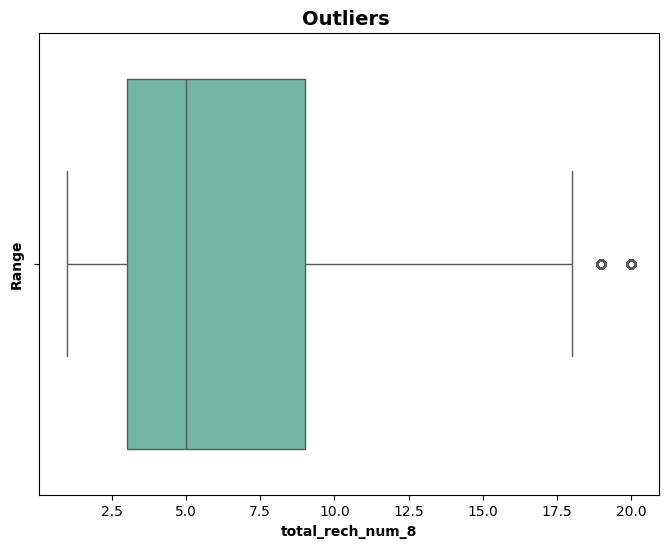

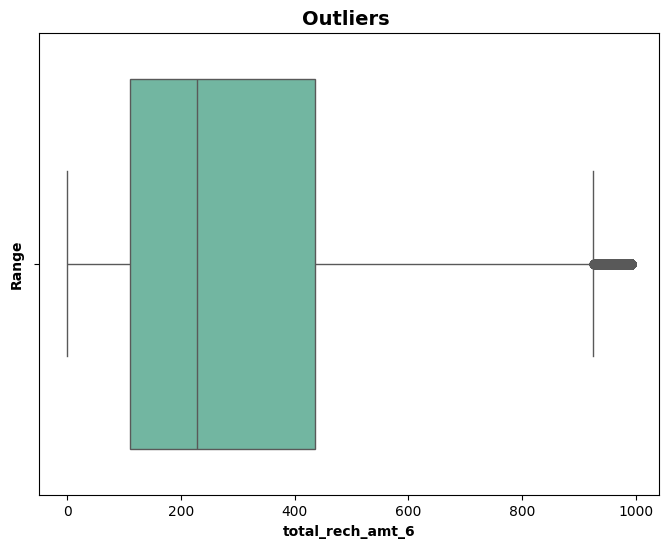

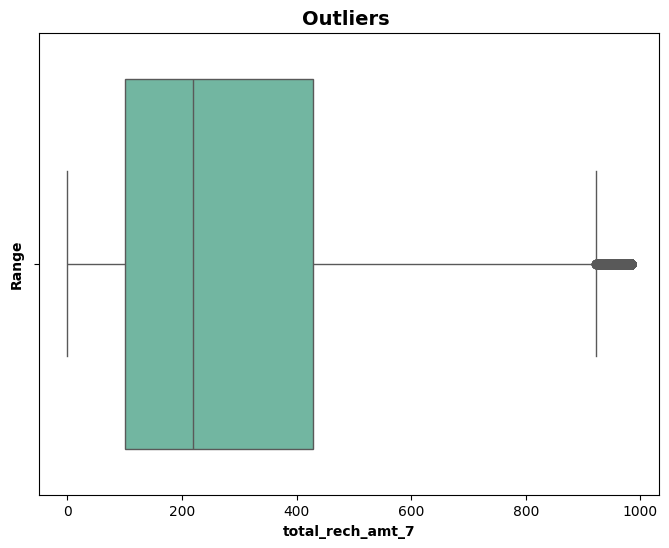

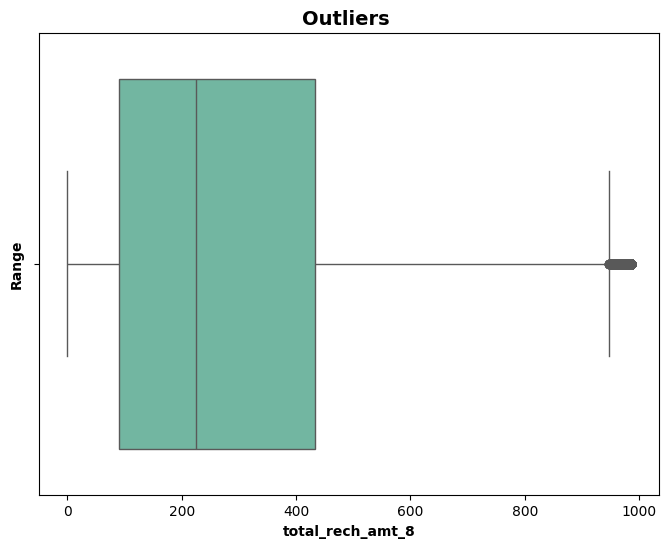

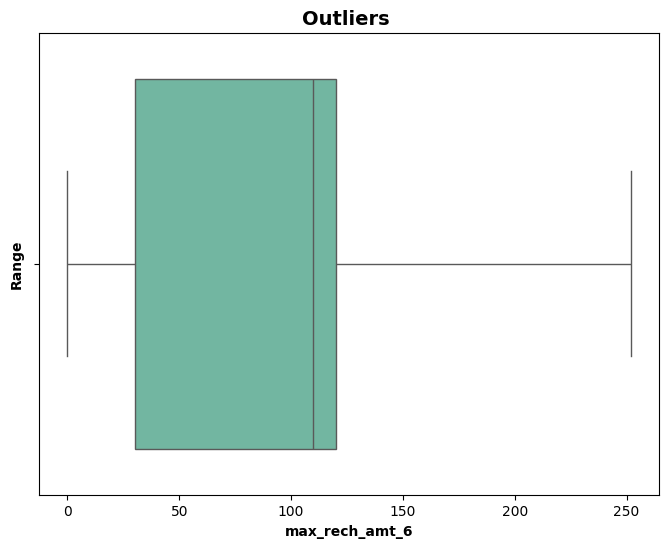

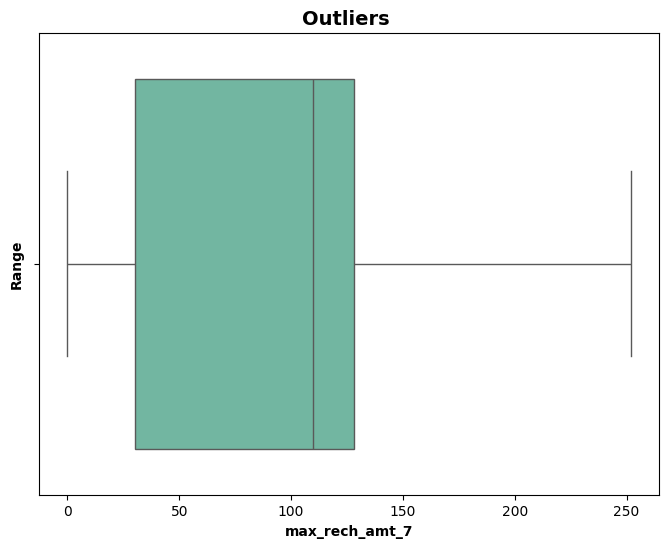

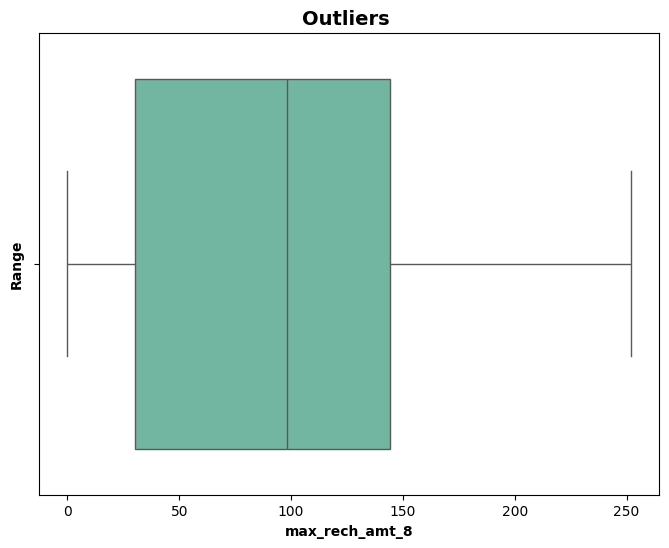

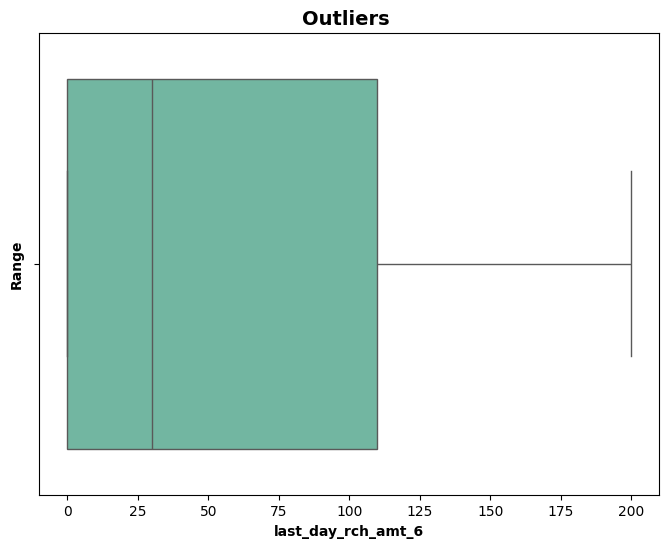

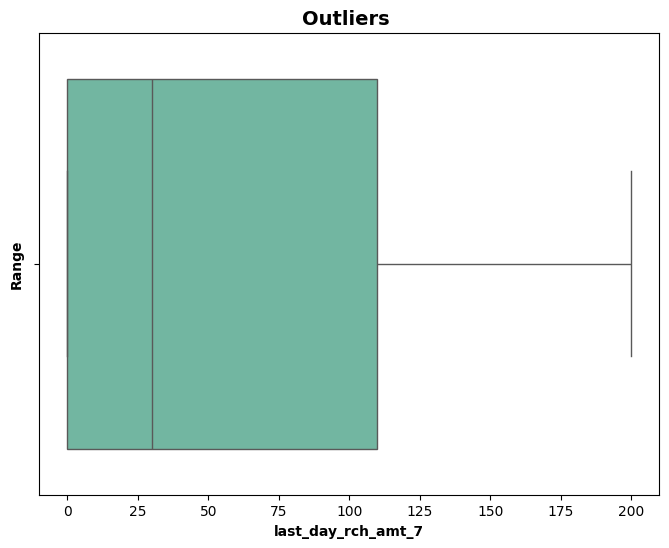

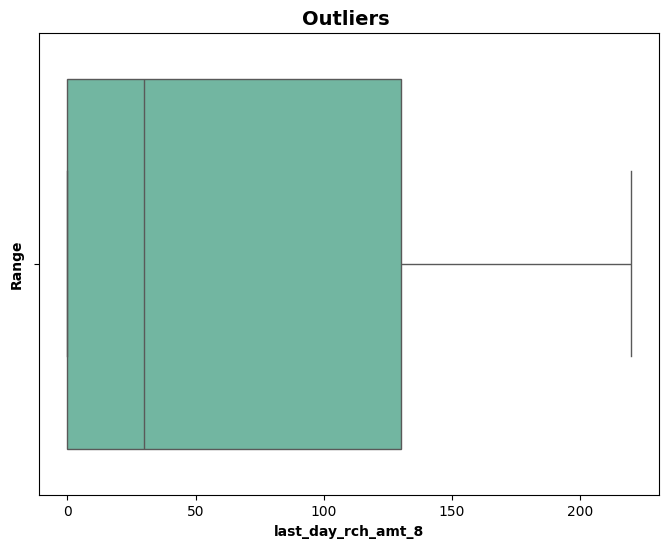

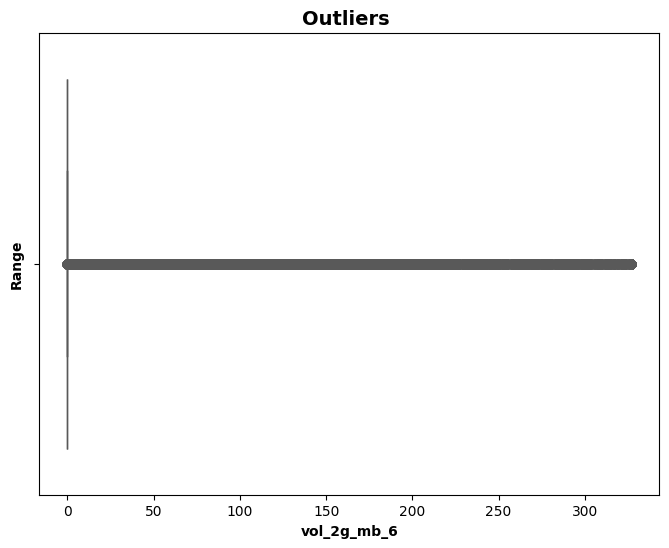

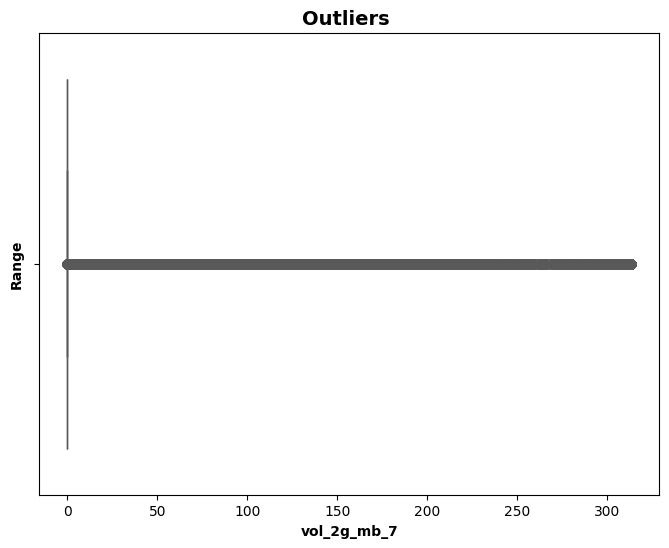

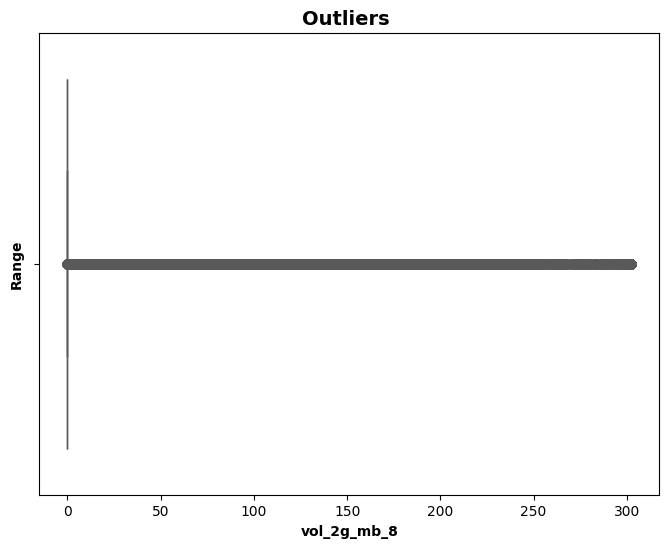

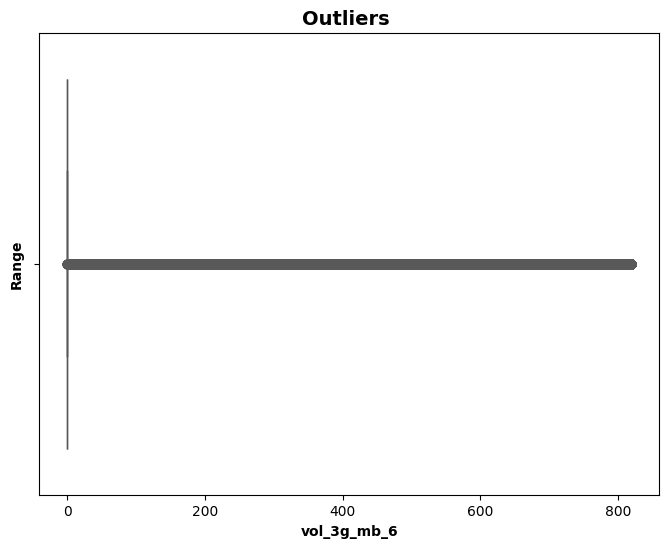

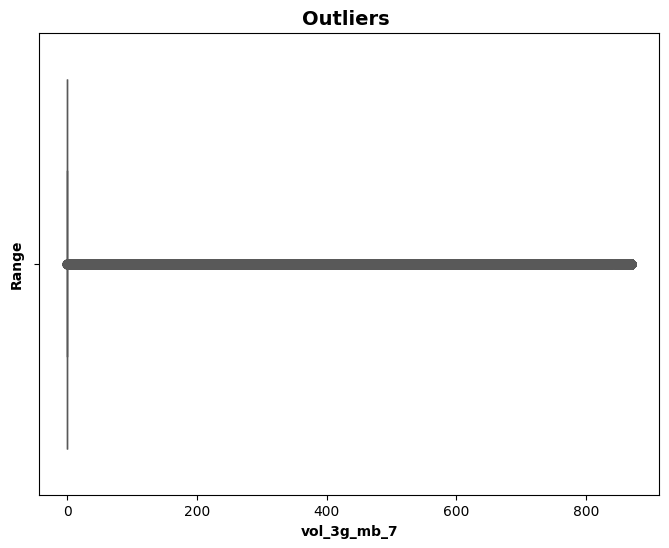

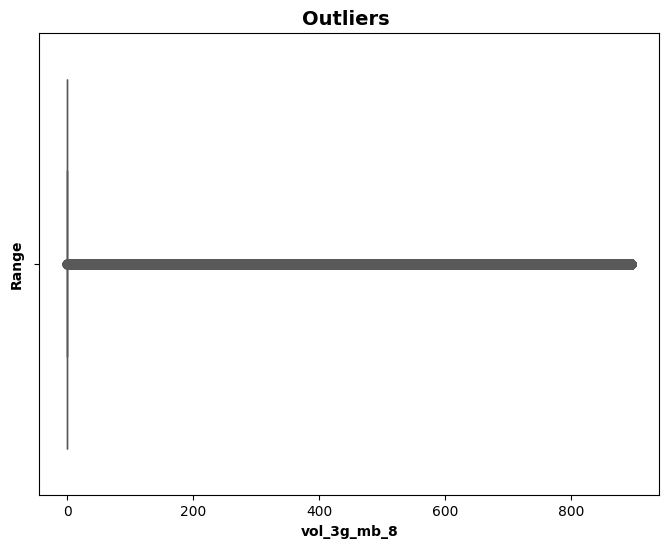

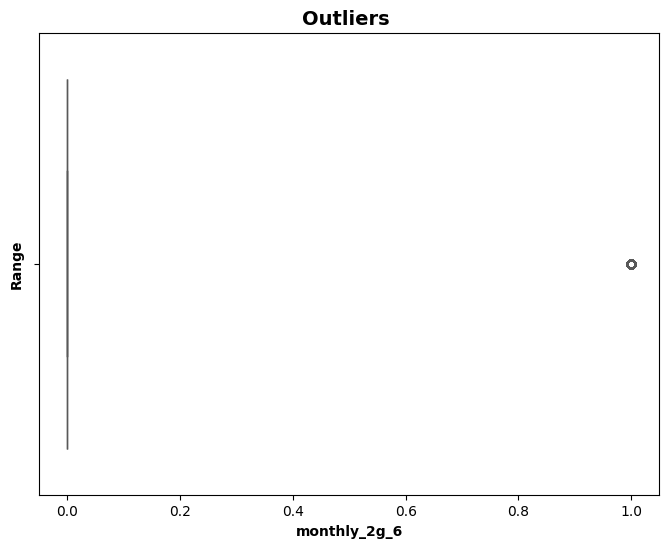

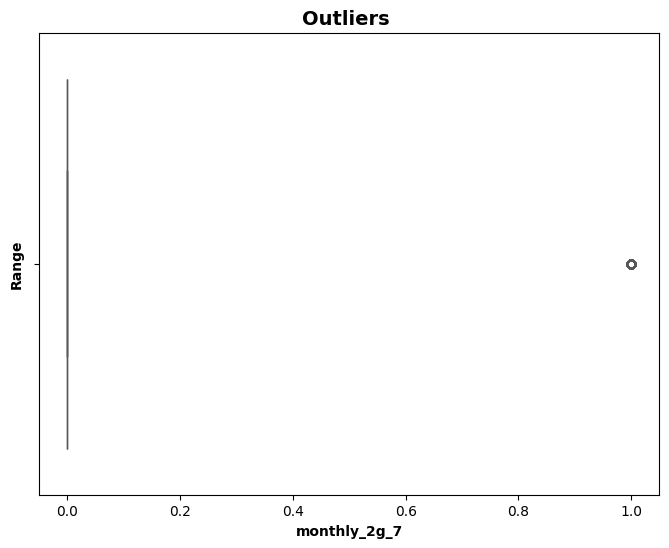

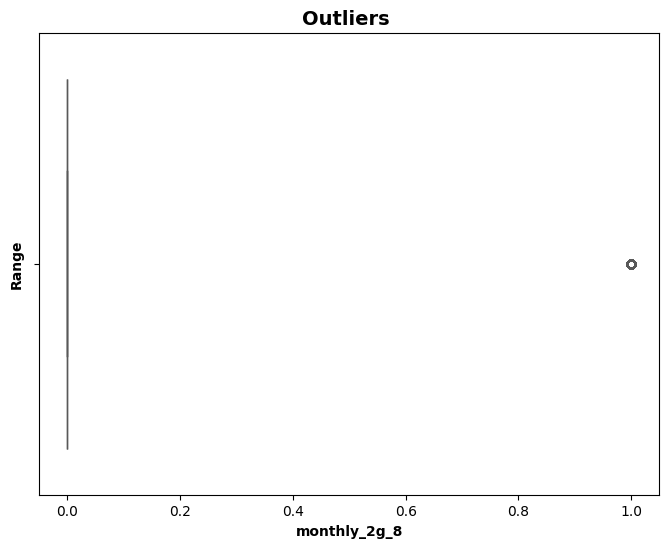

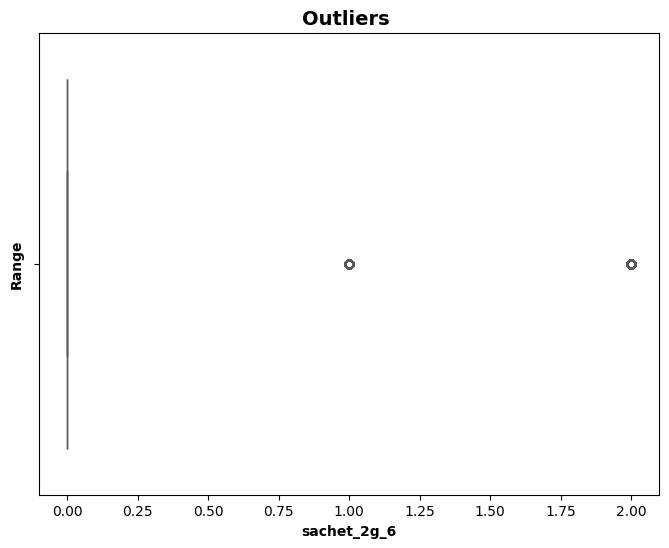

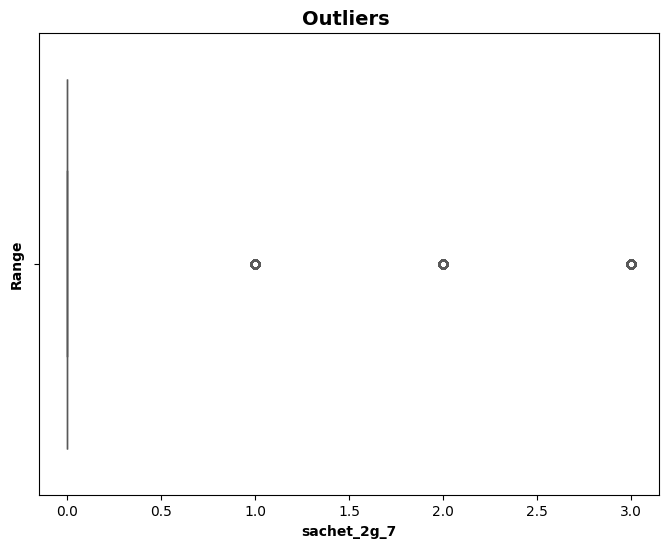

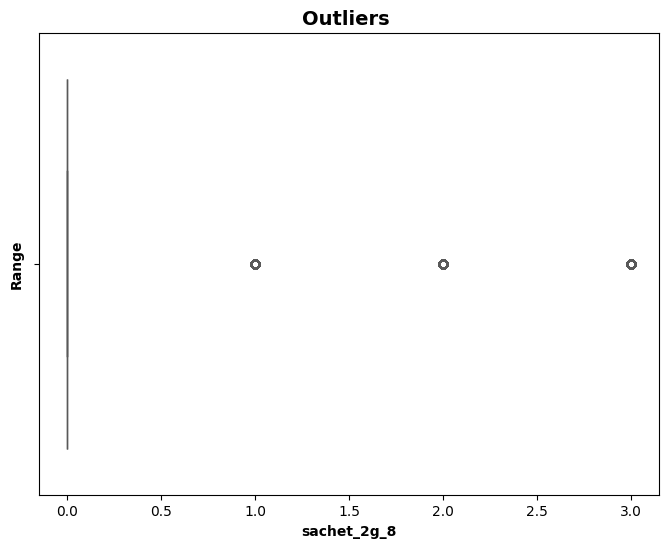

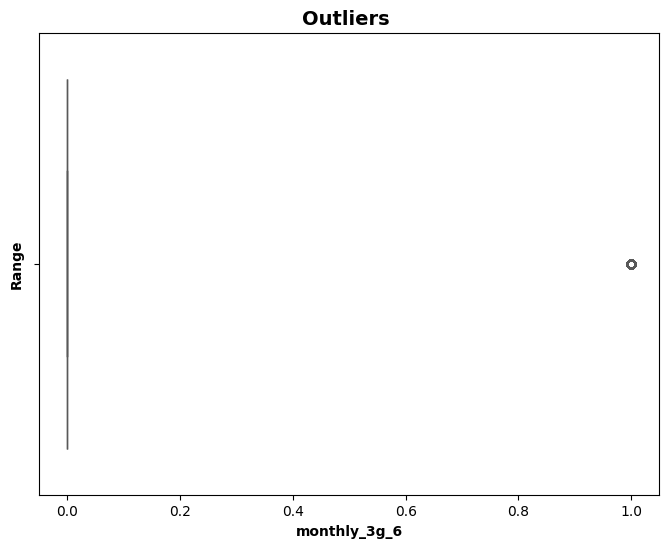

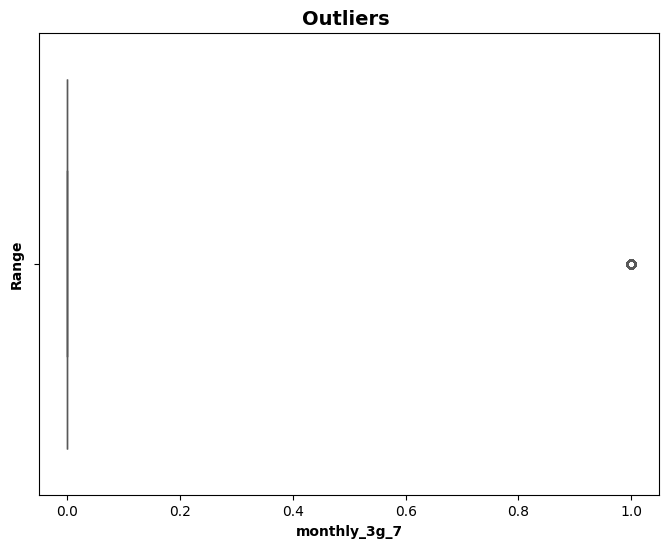

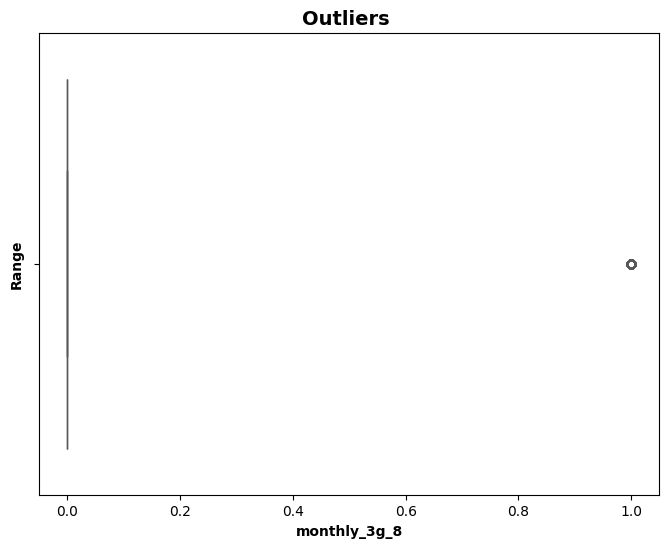

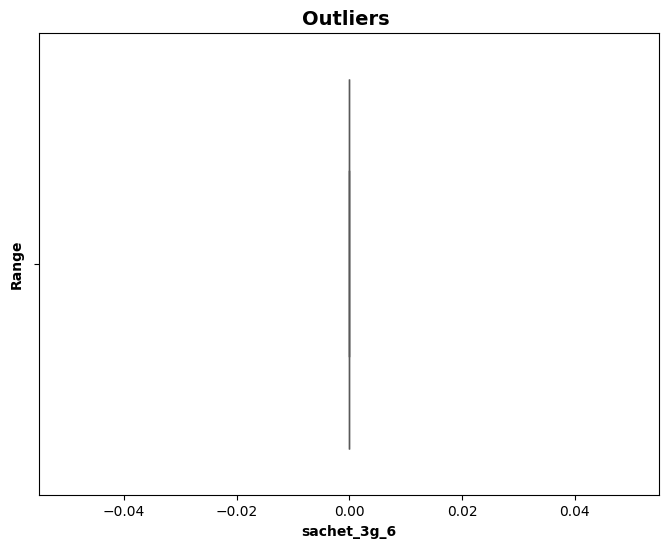

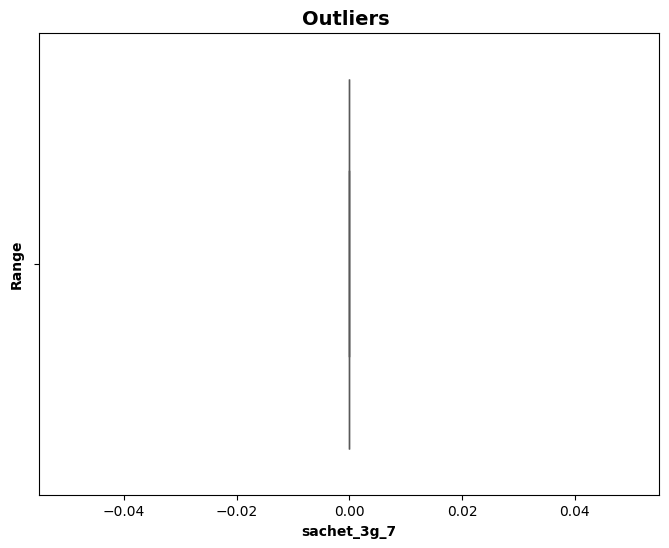

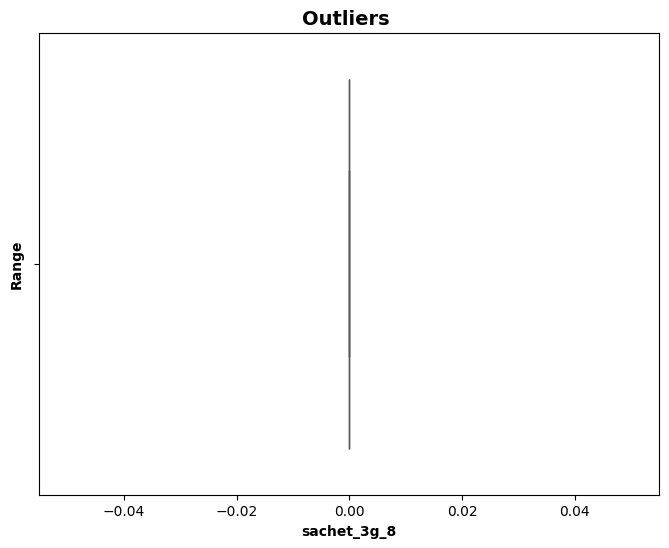

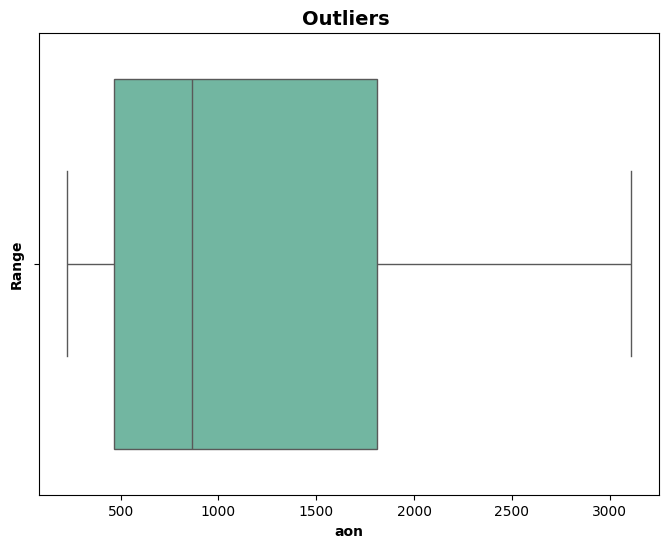

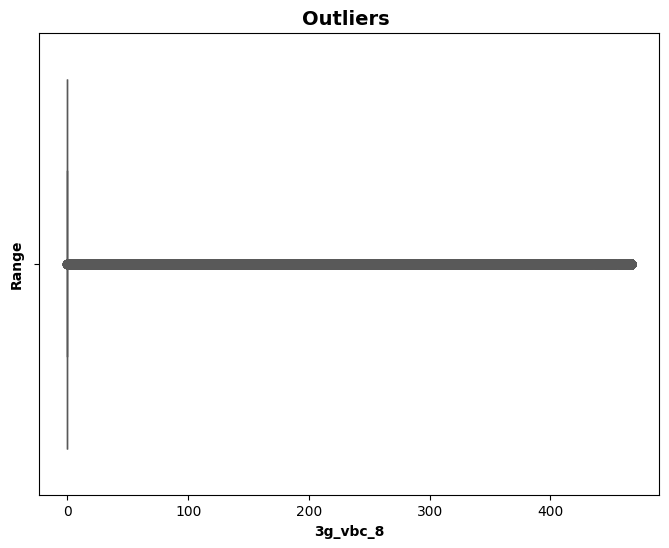

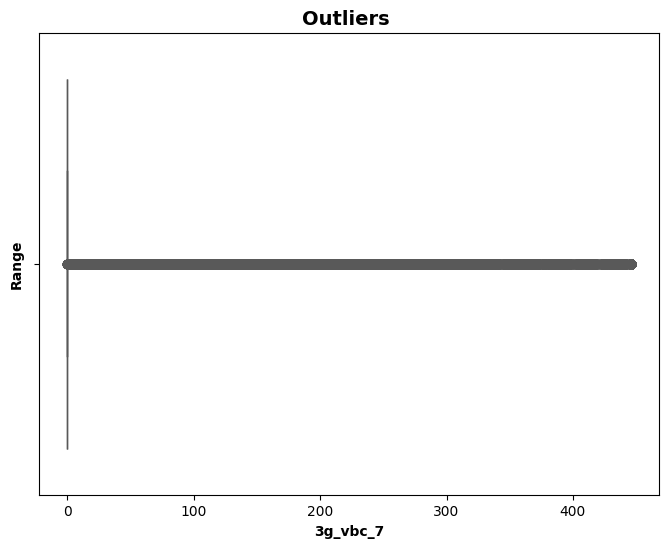

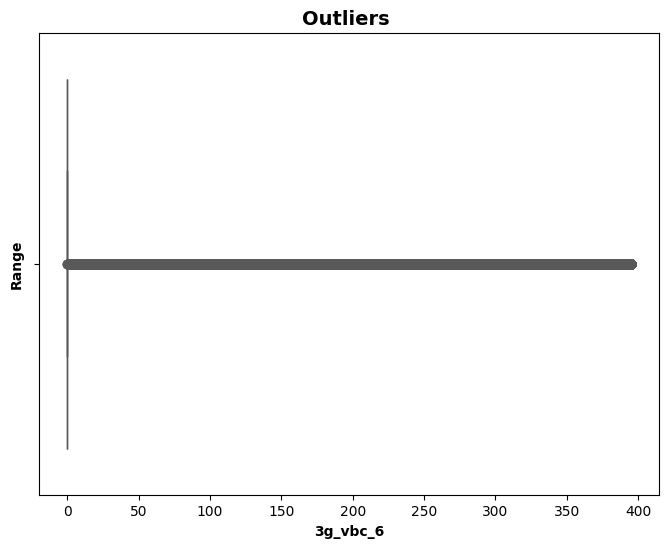

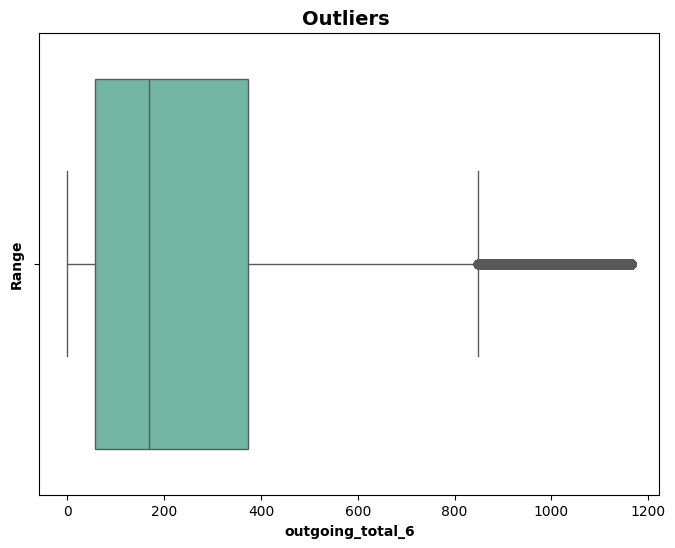

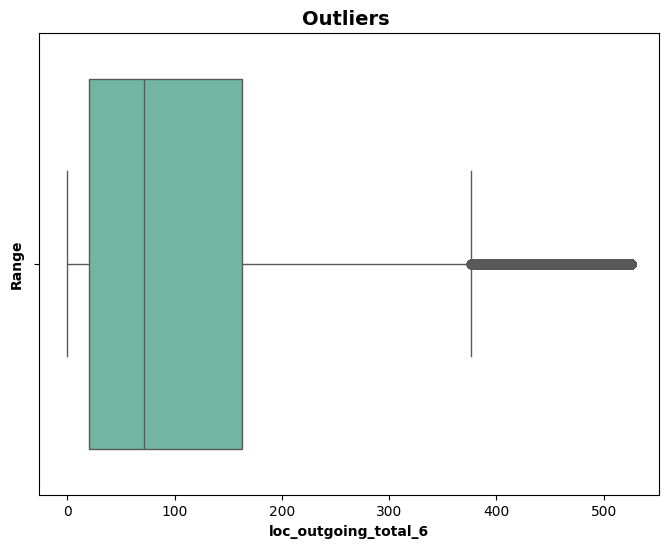

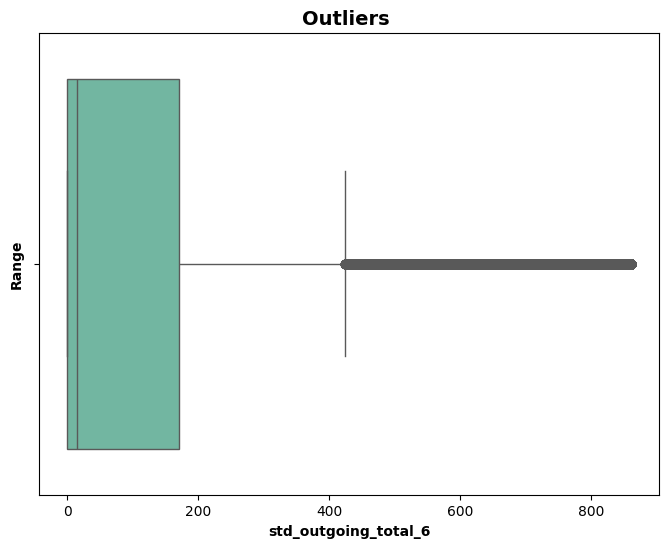

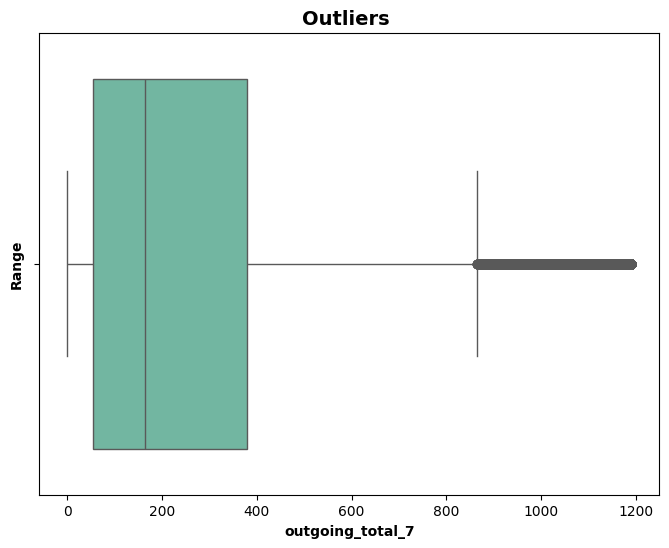

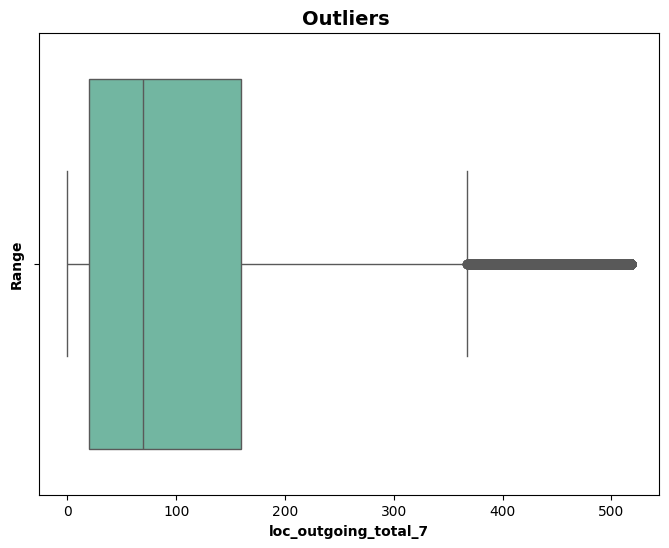

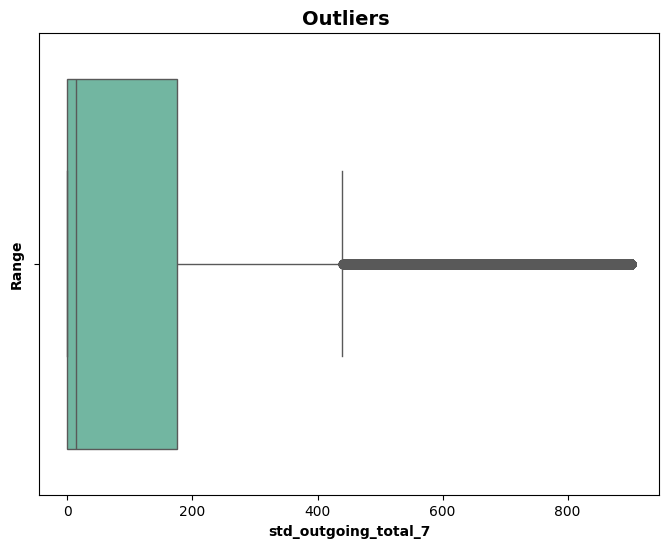

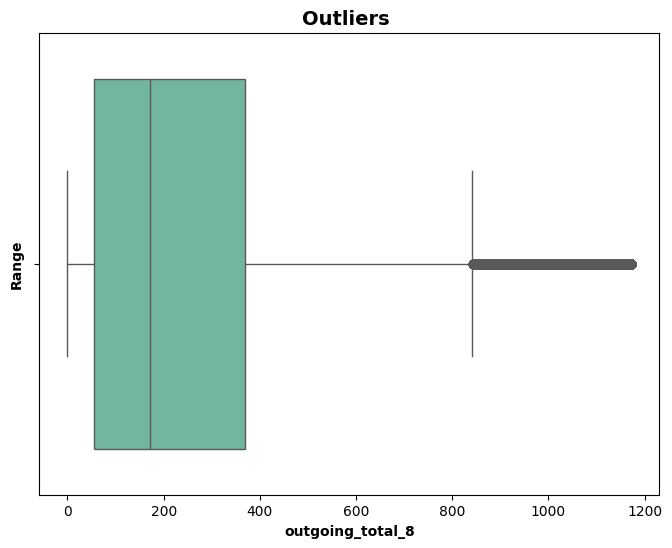

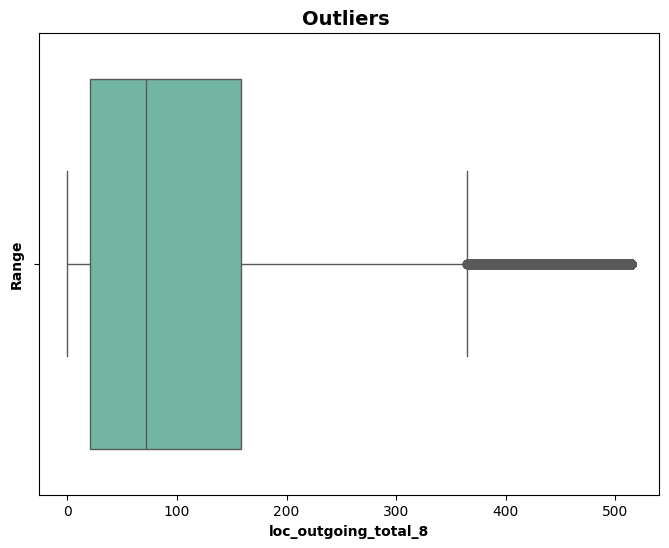

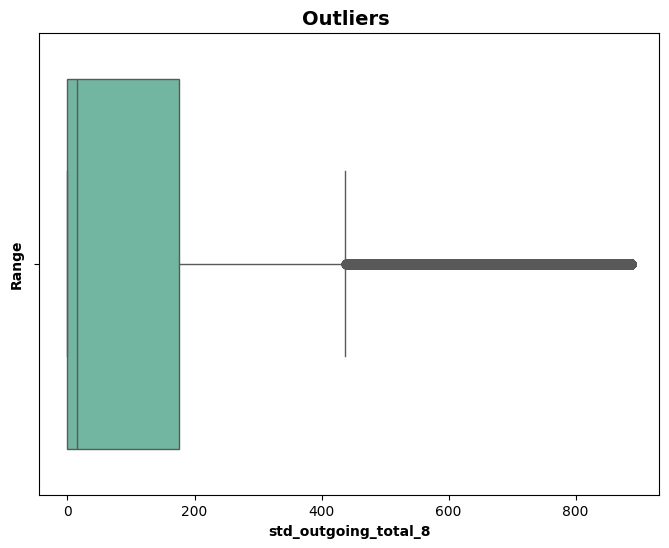

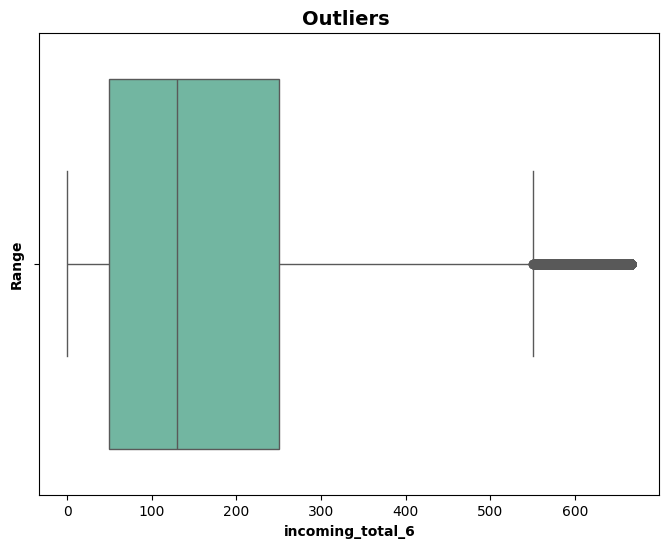

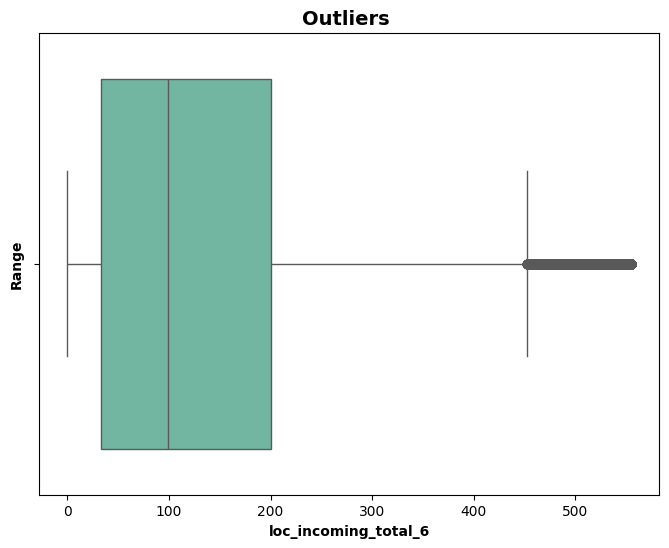

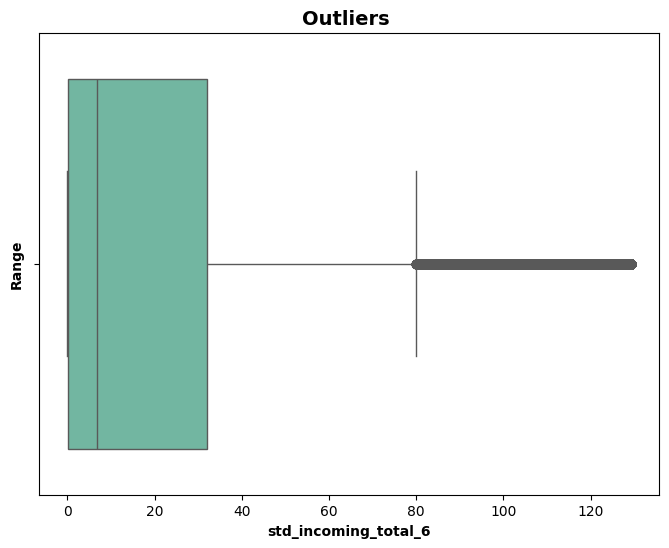

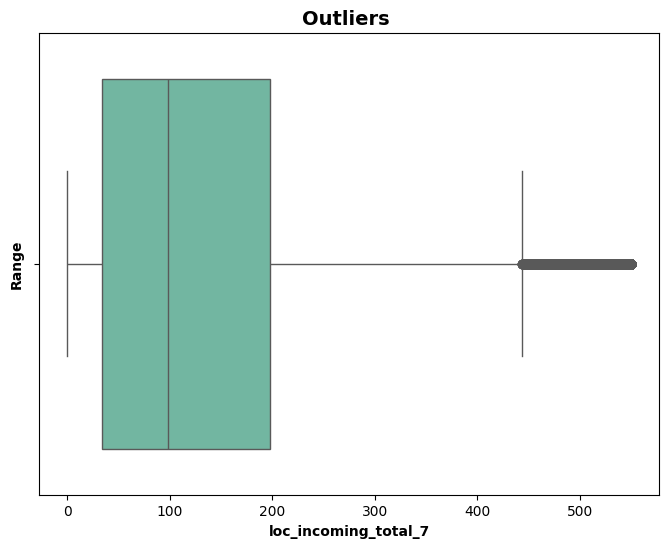

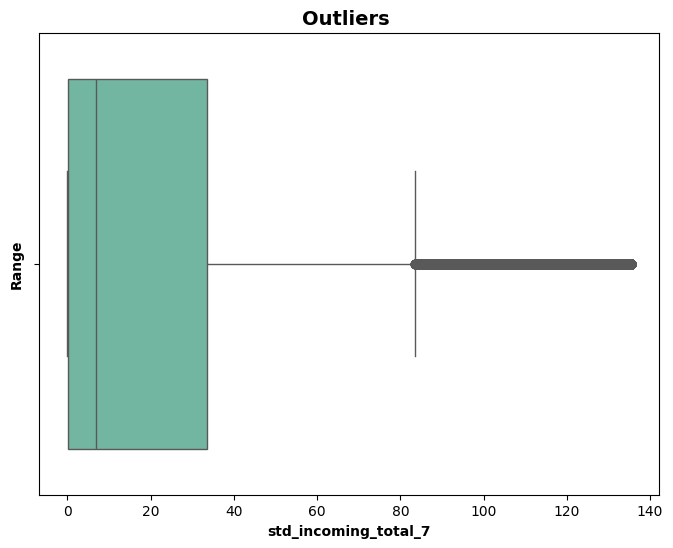

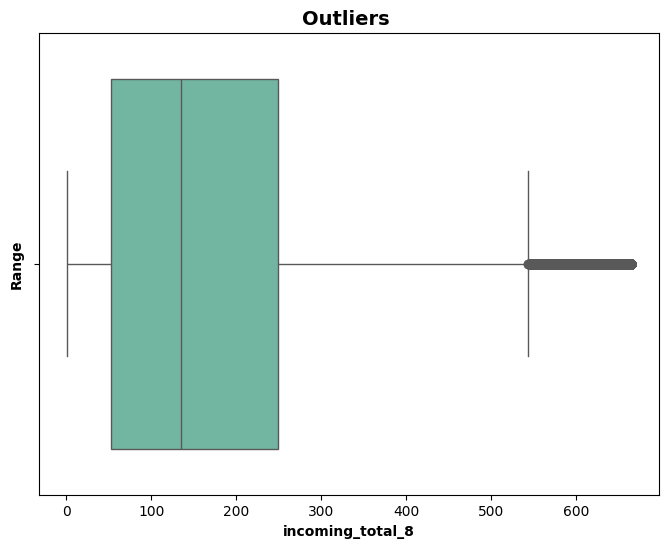

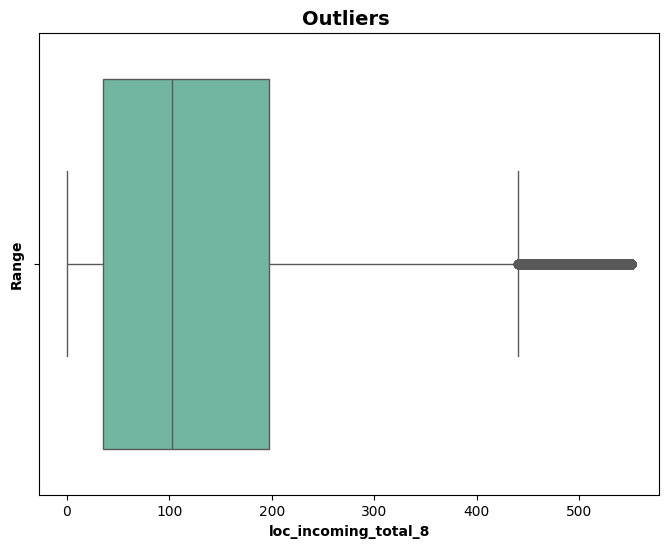

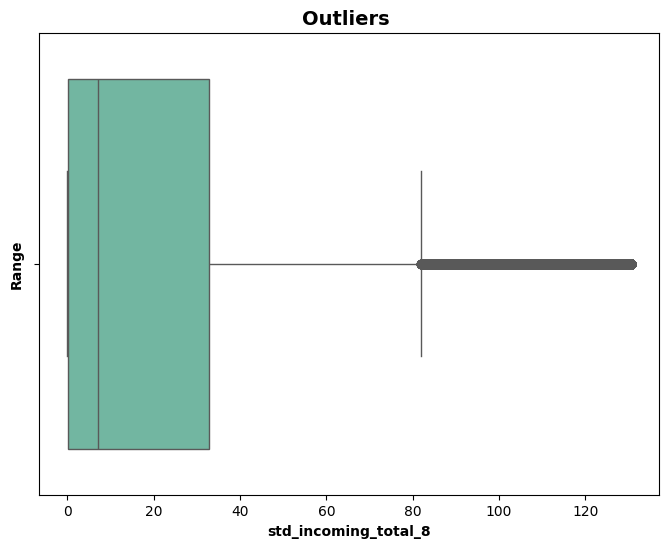

In [100]:
# Cheking whether any Outlier exists or not

for i  in df.select_dtypes(exclude = 'object').columns:
    plt.figure(figsize =(8,6))
    ax = sns.boxplot(df[i], orient="h", palette="Set2", whis = 1.5 )
    plt.title('Boxplot of '+' '+ i)
    plt.title("Outliers ", fontsize = 14, fontweight = 'bold')
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel(i, fontweight = 'bold')
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    plt.show()

##  Data Modeling and Model Evaluation

## `PART 1: - Non Interpretable models`

In [101]:
df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
52414  52414.0  509.117  442.313  460.387       222.26       245.19       212.41       716.583   
34339  34339.0  195.397  182.692  213.632        38.98        24.21        24.03       175.490   
24710  24710.0  376.730  413.630  202.564       243.14       160.43       177.74       326.560   
43069  43069.0  366.529  314.662  225.187       139.54       117.04         4.83       616.540   
32086  32086.0  254.344  266.923  306.063       328.31       287.31       348.16       116.380   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
52414        728.77        667.24            0.0            0.0           0.00            0.0   
34339        177.41        199.19            0.0            0.0           0.00            0.0   
24710        444.56        492.34            0.0            0.0           0.00            0.0   
43069        387.39        355.49            0.0            0.0           2.16            0.0   
32086        143.91        190.01            0.0            0.0           0.00            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
52414            0.0           0.00            119.63            139.21           166.667   
34339            0.0           0.00             25.19             24.21            24.030   
24710            0.0           0.00             75.34             41.83            90.140   
43069            0.0           1.15              2.28              2.31             0.000   
32086            0.0           0.00             76.24             84.33            94.340   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
52414            219.19            192.88           172.810              0.00             0.000   
34339            120.04            103.11           130.040              1.86             0.660   
24710            175.08            270.11           337.542              4.91            18.562   
43069             16.69             34.34            34.090              0.00             0.000   
32086             17.94             32.56            32.830              0.00             0.000   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
52414              0.00               0.0             0.000              0.00        338.83   
34339              0.26               0.0             0.000              0.00        147.11   
24710              2.48               0.0             6.951              5.53        255.34   
43069              0.00               0.0             0.000              0.00         18.98   
32086              0.00               0.0             0.000              0.00         94.19   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
52414        332.09       355.130            102.63            105.98             30.09   
34339        127.99       154.340             13.78              0.00              0.00   
24710        336.16       512.752            167.79            118.59             87.59   
43069         36.66        34.090            137.26            114.73              3.68   
32086        116.89       127.180            252.06            202.98            253.81   

       std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
52414           447.068           467.645           463.231               0.0               0.0   
34339            53.580            73.280            68.880               0.0               0.0   
24710           146.560           138.890            46.290               0.0               0.0   
43069           447.068           353.040           321.390               0.0               0.0   
32086            98.430           111.340           157.180              

In [102]:
df.shape

(55999, 148)

In [103]:
X_train = df

### 4) Feature scaling

In [104]:
print("Glimpse of Feature variables train dataset - x_train:")
X_train.head()

Glimpse of Feature variables train dataset - x_train:


id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
52414  52414.0  509.117  442.313  460.387       222.26       245.19       212.41       716.583   
34339  34339.0  195.397  182.692  213.632        38.98        24.21        24.03       175.490   
24710  24710.0  376.730  413.630  202.564       243.14       160.43       177.74       326.560   
43069  43069.0  366.529  314.662  225.187       139.54       117.04         4.83       616.540   
32086  32086.0  254.344  266.923  306.063       328.31       287.31       348.16       116.380   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
52414        728.77        667.24            0.0            0.0           0.00            0.0   
34339        177.41        199.19            0.0            0.0           0.00            0.0   
24710        444.56        492.34            0.0            0.0           0.00            0.0   
43069        387.39        355.49            0.0            0.0           2.16            0.0   
32086        143.91        190.01            0.0            0.0           0.00            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
52414            0.0           0.00            119.63            139.21           166.667   
34339            0.0           0.00             25.19             24.21            24.030   
24710            0.0           0.00             75.34             41.83            90.140   
43069            0.0           1.15              2.28              2.31             0.000   
32086            0.0           0.00             76.24             84.33            94.340   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
52414            219.19            192.88           172.810              0.00             0.000   
34339            120.04            103.11           130.040              1.86             0.660   
24710            175.08            270.11           337.542              4.91            18.562   
43069             16.69             34.34            34.090              0.00             0.000   
32086             17.94             32.56            32.830              0.00             0.000   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
52414              0.00               0.0             0.000              0.00        338.83   
34339              0.26               0.0             0.000              0.00        147.11   
24710              2.48               0.0             6.951              5.53        255.34   
43069              0.00               0.0             0.000              0.00         18.98   
32086              0.00               0.0             0.000              0.00         94.19   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
52414        332.09       355.130            102.63            105.98             30.09   
34339        127.99       154.340             13.78              0.00              0.00   
24710        336.16       512.752            167.79            118.59             87.59   
43069         36.66        34.090            137.26            114.73              3.68   
32086        116.89       127.180            252.06            202.98            253.81   

       std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
52414           447.068           467.645           463.231               0.0               0.0   
34339            53.580            73.280            68.880               0.0               0.0   
24710           146.560           138.890            46.290               0.0               0.0   
43069           447.068           353.040           321.390               0.0               0.0   
32086            98.430           111.340           157.180              

In [105]:
X_test.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
44414  44414             0.0             0.0             0.0            6/30/2014   
9520    9520             0.0             0.0             0.0            6/30/2014   
25161  25161             0.0             0.0             0.0            6/30/2014   
8031    8031             0.0             0.0             0.0            6/30/2014   
23525  23525             0.0             0.0             0.0            6/30/2014   

      last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  \
44414            7/31/2014            8/31/2014  156.576  152.228  181.642         7.69   
9520             7/31/2014            8/31/2014  845.031  554.610  781.106        98.18   
25161            7/31/2014            8/31/2014   99.206  224.892   70.179        18.44   
8031             7/31/2014            8/31/2014  743.750    0.000   -3.000       484.99   
23525            7/31/2014            8/31/2014   58.680  119.302   70.380         4.76   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
44414         5.03         4.86         10.48         10.13          9.36           0.00   
9520         72.14       101.21       1056.43        633.91        725.66          28.39   
25161        45.84         3.36         46.29         26.63          6.24           0.00   
8031          0.00          NaN        458.29          4.05           NaN           6.20   
23525        86.99        15.34         51.61         71.54         57.73           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
44414            0.0            0.0           0.00           0.00            0.0   
9520             0.0            0.0          78.24           0.00            0.0   
25161            0.0            0.0           0.00           0.00            0.0   
8031             0.0            NaN           9.10           4.85            NaN   
23525            0.0            0.0           0.00           0.00            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
44414              7.69              5.03              4.86             10.48             10.13   
9520              67.48             61.46             91.98            473.59            349.39   
25161              1.40              8.73              1.28             14.66             15.59   
8031              22.09              0.00               NaN             73.66              0.00   
23525              4.76             86.99             15.34             18.78             65.89   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
44414              9.36              0.00              0.00              0.00               0.0   
9520             575.66              9.26             21.23             21.23               0.0   
25161              0.88              0.00              4.33              0.00               0.0   
8031                NaN              0.00              0.00               NaN               0.0   
23525             57.73              0.00              0.00              0.00               0.0   

       loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
44414               0.0              0.00         18.18         15.16         14.23   
9520                7.6              5.83        550.34        432.09        688.88   
25161               0.0              0.00         16.06         28.66          2.16   
8031                0.0               NaN         95.76          0.00           NaN   
23525               0.0              0.00         23.54        152.89         73.08   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
44414              0.00              0.00              0.00              0.00     

In [106]:
X_train.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'loc_outgoing_total_8', 'std_outgoing_total_8', 'incoming_total_6', 'loc_incoming_total_6',
       'std_incoming_total_6', 'loc_incoming_total_7', 'std_incoming_total_7', 'incoming_total_8',
       'loc_incoming_total_8', 'std_incoming_total_8'],
      dtype='object', length=148)

In [107]:
X_test.columns

Index(['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6',
       'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object', length=170)

In [108]:
train_columns = X_train.columns.tolist()
# get the test data set columns
test_columns = X_test.columns.tolist()
# get the difference between the test and train columns
extra_columns = list(set(test_columns) - set(train_columns))
# drop the extra columns from the test data set
X_test = X_test.drop(extra_columns, axis=1)

In [109]:
# There are some columns representing volume based users have month specified in their name, while all other columns have used numbers `6,7,8,9` indicating month name
month = ['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g']
X_test = X_test.rename(columns = {'aug_vbc_3g':'3g_vbc_8','jul_vbc_3g':'3g_vbc_7','jun_vbc_3g':'3g_vbc_6','sep_vbc_3g':'3g_vbc_9'})

In [110]:
# reindex the test data with the train data columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [111]:
print(X_train.shape)
print(X_test.shape)

(55999, 148)
(14000, 148)


In [112]:
X_train = X_train.select_dtypes(include=np.number)

In [113]:
X_test = X_test.select_dtypes(include=np.number)

In [114]:
num_var = X_train.select_dtypes(exclude='object')
num_col = num_var.columns

In [115]:
## Scaling the train and test data
scale = StandardScaler()
X_train[num_col] = scale.fit_transform(X_train[num_col])
X_test[num_col] = scale.fit_transform(X_test[num_col])
X_train.head()

id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
52414  0.876483  1.099349  0.827805  0.894916     0.738658     0.869449     0.688865   
34339 -0.031475 -0.298708 -0.330965 -0.190937    -0.426496    -0.508111    -0.518408   
24710 -0.515166  0.509382  0.699784 -0.239642     0.871397     0.341067     0.466675   
43069  0.407058  0.463922  0.258058 -0.140089     0.212787     0.070579    -0.641455   
32086 -0.144649 -0.036017  0.044984  0.215808     1.412842     1.132020     1.558848   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
52414      2.848363      2.869374      2.598491      -0.389425      -0.370732      -0.384371   
34339      0.013943      0.033958      0.148621      -0.389425      -0.370732      -0.384371   
24710      0.805296      1.407799      1.683029      -0.389425      -0.370732      -0.384371   
43069      2.324305      1.113798      0.966727      -0.389425      -0.370732       0.010915   
32086     -0.295695     -0.138319      0.100571      -0.389425      -0.370732      -0.384371   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
52414      -0.392113      -0.362161      -0.373763          1.931737          2.410831   
34339      -0.392113      -0.362161      -0.373763         -0.125874         -0.135802   
24710      -0.392113      -0.362161      -0.373763          0.966769          0.254387   
43069      -0.392113      -0.362161      -0.253121         -0.625025         -0.620769   
32086      -0.392113      -0.362161      -0.373763          0.986378          1.195534   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
52414          3.056318          1.490450          1.258418          1.057713         -0.486701   
34339         -0.131428          0.455194          0.300941          0.599966         -0.103786   
24710          1.346042          1.029884          2.082144          2.820765          0.524113   
43069         -0.668467         -0.623914         -0.432552         -0.426944         -0.486701   
32086          1.439906         -0.610863         -0.451538         -0.440429         -0.486701   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
52414         -0.485263         -0.484645         -0.369071         -0.379102         -0.386825   
34339         -0.351173         -0.428225         -0.369071         -0.379102         -0.386825   
24710          3.285914          0.053514         -0.369071          3.484288          2.455055   
43069         -0.485263         -0.484645         -0.369071         -0.379102         -0.386825   
32086         -0.485263         -0.484645         -0.369071         -0.379102         -0.386825   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
52414      1.539853      1.530566      1.716280          0.418895          0.401391   
34339      0.208413      0.091482      0.291595         -0.330327         -0.442911   
24710      0.960039      1.559263      2.834672          0.968352          0.501850   
43069     -0.681413     -0.552475     -0.561628          0.710910          0.471098   
32086     -0.159101      0.013217      0.098883          1.678952          1.174152   

       std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
52414         -0.193368          3.270799          3.269691          3.274536         -0.306332   
34339         -0.440650         -0.052052          0.090953          0.066723         -0.306332   
24710          0.279173          0.733127          0.619796         -0.117033         -0.306332   
43069         -0.410408          3.270799          2.345929          2.120743         -0.306332   
32086          1.645186          0.326688          0.397732          0.784992         -0.306332   

       std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  s

In [116]:
num_var = X_test.select_dtypes(exclude='object')
num_col = num_var.columns

## Applying PCA

        In the exploratory data analaysis we saw that some columns have significant correlation among themselves. This collinearity can hamper our interpretations. Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. So let us adopt PCA to solve this problem. PCA will also help in dimensionality reduction.

In [117]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state = 42)

In [118]:
#Performing PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [119]:
# Let us observe pricipal components created
print("The Principal components are:")
pca.components_

The Principal components are:


array([[ 9.23929904e-04,  1.34973170e-01,  1.44558727e-01, ...,
         1.33679926e-01,  1.28478969e-01,  6.83069460e-02],
       [-3.38585720e-04,  5.86484894e-02,  7.57734151e-02, ...,
        -9.21919122e-02, -1.23534328e-01,  6.29444525e-02],
       [-9.02019346e-05, -6.24259813e-02, -7.16188321e-02, ...,
         1.10841423e-01,  2.73638999e-02,  2.60135637e-01],
       ...,
       [ 0.00000000e+00, -6.60740041e-17,  4.40521316e-18, ...,
         3.90165322e-15, -9.20337172e-16, -1.94402199e-15],
       [-0.00000000e+00, -1.53393165e-16, -5.17046332e-17, ...,
         1.16131743e-15, -3.84739217e-15,  2.52891181e-15],
       [-0.00000000e+00,  7.67092878e-17, -9.18673064e-17, ...,
         7.64672482e-15, -6.13593746e-15,  3.71172554e-16]])

In [120]:
# Let us also look at the variance ratio
var_ratio = np.round((pca.explained_variance_ratio_) * 100,2)
var_ratio

array([2.028e+01, 1.154e+01, 5.590e+00, 5.360e+00, 3.560e+00, 3.470e+00,
       2.630e+00, 2.370e+00, 2.210e+00, 2.040e+00, 1.860e+00, 1.790e+00,
       1.570e+00, 1.550e+00, 1.410e+00, 1.280e+00, 1.240e+00, 1.180e+00,
       1.080e+00, 9.500e-01, 9.000e-01, 8.800e-01, 8.500e-01, 8.100e-01,
       7.800e-01, 7.700e-01, 7.600e-01, 7.500e-01, 7.400e-01, 7.100e-01,
       6.900e-01, 6.600e-01, 6.300e-01, 6.200e-01, 6.000e-01, 5.600e-01,
       5.100e-01, 4.900e-01, 4.800e-01, 4.700e-01, 4.600e-01, 4.600e-01,
       4.500e-01, 4.300e-01, 4.200e-01, 4.000e-01, 4.000e-01, 3.800e-01,
       3.800e-01, 3.800e-01, 3.600e-01, 3.600e-01, 3.500e-01, 3.400e-01,
       3.200e-01, 3.100e-01, 3.000e-01, 2.900e-01, 2.800e-01, 2.700e-01,
       2.600e-01, 2.400e-01, 2.300e-01, 2.300e-01, 2.300e-01, 2.100e-01,
       2.100e-01, 2.000e-01, 2.000e-01, 1.900e-01, 1.900e-01, 1.800e-01,
       1.800e-01, 1.800e-01, 1.800e-01, 1.700e-01, 1.600e-01, 1.600e-01,
       1.500e-01, 1.400e-01, 1.400e-01, 1.300e-01, 

In [121]:
var_cum = np.cumsum(var_ratio)
var_cum

array([ 20.28,  31.82,  37.41,  42.77,  46.33,  49.8 ,  52.43,  54.8 ,
        57.01,  59.05,  60.91,  62.7 ,  64.27,  65.82,  67.23,  68.51,
        69.75,  70.93,  72.01,  72.96,  73.86,  74.74,  75.59,  76.4 ,
        77.18,  77.95,  78.71,  79.46,  80.2 ,  80.91,  81.6 ,  82.26,
        82.89,  83.51,  84.11,  84.67,  85.18,  85.67,  86.15,  86.62,
        87.08,  87.54,  87.99,  88.42,  88.84,  89.24,  89.64,  90.02,
        90.4 ,  90.78,  91.14,  91.5 ,  91.85,  92.19,  92.51,  92.82,
        93.12,  93.41,  93.69,  93.96,  94.22,  94.46,  94.69,  94.92,
        95.15,  95.36,  95.57,  95.77,  95.97,  96.16,  96.35,  96.53,
        96.71,  96.89,  97.07,  97.24,  97.4 ,  97.56,  97.71,  97.85,
        97.99,  98.12,  98.24,  98.36,  98.47,  98.58,  98.68,  98.78,
        98.88,  98.97,  99.05,  99.13,  99.21,  99.28,  99.35,  99.42,
        99.49,  99.54,  99.58,  99.62,  99.66,  99.69,  99.72,  99.75,
        99.78,  99.81,  99.84,  99.86,  99.88,  99.9 ,  99.92,  99.94,
      

#### Making a scree plot for the explained variance

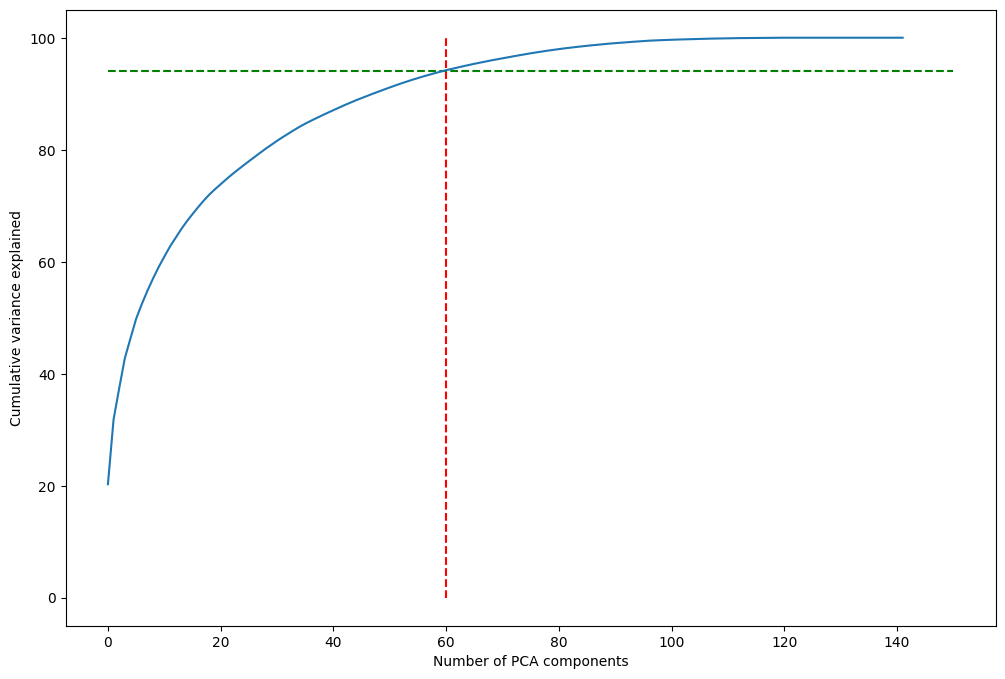

In [122]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=94, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.xlabel('Number of PCA components')
plt.ylabel("Cumulative variance explained")
plt.show()

In [123]:
X_train.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'loc_outgoing_total_8', 'std_outgoing_total_8', 'incoming_total_6', 'loc_incoming_total_6',
       'std_incoming_total_6', 'loc_incoming_total_7', 'std_incoming_total_7', 'incoming_total_8',
       'loc_incoming_total_8', 'std_incoming_total_8'],
      dtype='object', length=142)

In [124]:
X_test = X_test[X_train.columns]

In [125]:
X_train.isna().sum()

id                      0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_mou_7        0
std_og_t2f_mou_8        0
std_og_mou_6            0
std_og_mou_7            0
std_og_mou_8            0
isd_og_mou_6            0
isd_og_mou_7            0
isd_og_mou_8            0
spl_og_mou_6            0
spl_og_mou_7            0
spl_og_mou_8            0
og_others_6             0
og_others_7             0
og_others_8             0
total_og_mou_6          0
total_og_mou_7          0
total_og_mou_8          0
loc_ic_t2t_mou_6        0
loc_ic_t2t_mou_7        0
loc_ic_t2t_mou_8        0
loc_ic_t2m_mou_6        0
loc_ic_t2m_mou_7        0
loc_ic_t2m_mou_8        0
loc_ic_t2f_mou_6        0
loc_ic_t2f_mou_7        0
loc_ic_t2f_mou_8        0
loc_ic_mou_6            0
loc_ic_mou_7            0
loc_ic_mou_8            0
std_ic_t2t_mou_6        0
std_ic_t2t_mou_7        0
std_ic_t2t_mou_8        0
std_ic_t2m_mou_6        0
std_ic_t2m_mou_7        0
std_ic_t2m_mou_8        0
std_ic_t2f_mou_6        0
std_ic_t2f_mou_7        0
std_ic_t2f_mou_8        0
std_ic_mou_6            0
std_ic_mou_7            0
std_ic_mou_8            0
total_ic_mou_6          0
total_ic_mou_7          0
total_ic_mou_8          0
spl_ic_mou_6            0
spl_ic_mou_7            0
spl_ic_mou_8            0
isd_ic_mou_6            0
isd_ic_mou_7            0
isd_ic_mou_8            0
ic_others_6             0
ic_others_7             0
ic_others_8             0
total_rech_num_6        0
total_rech_num_7        0
total_rech_num_8        0
total_rech_amt_6        0
total_rech_amt_7        0
total_rech_amt_8        0
max_rech_amt_6          0
max_rech_amt_7          0
max_rech_amt_8          0
last_day_rch_amt_6      0
last_day_rch_amt_7      0
last_day_rch_amt_8      0
vol_2g_mb_6             0
vol_2g_mb_7             0
vol_2g_mb_8             0
vol_3g_mb_6             0
vol_3g_mb_7             0
vol_3g_mb_8             0
monthly_2g_6            0
monthly_2g_7            0
monthly_2g_8            0
sachet_2g_6             0
sachet_2g_7             0
sachet_2g_8             0
monthly_3g_6            0
monthly_3g_7            0
monthly_3g_8            0
sachet_3g_6             0
sachet_3g_7             0
sachet_3g_8             0
aon                     0
3g_vbc_8                0
3g_vbc_7                0
3g_vbc_6                0
outgoing_total_6        0
loc_outgoing_total_6    0
std_outgoing_total_6    0
outgoing_total_7        0
loc_outgoing_total_7    0
std_outgoing_total_7    0
outgoing_total_8        0
loc_outgoing_total_8    0
std_outgoing_total_8    0
incoming_total_6        0
loc_incoming_total_6    0
std_incoming_total_6    0
loc_incoming_total_7    0
std_incoming_total_7    0
incoming_total_8        0
loc_incoming_total_8    0
std_incoming_total_8    0
dtype: int64

In [126]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)
X_test = X_test_imputed

In [127]:
X_test.isna().sum()

id                      0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_mou_7        0
std_og_t2f_mou_8        0
std_og_mou_6            0
std_og_mou_7            0
std_og_mou_8            0
isd_og_mou_6            0
isd_og_mou_7            0
isd_og_mou_8            0
spl_og_mou_6            0
spl_og_mou_7            0
spl_og_mou_8            0
og_others_6             0
og_others_7             0
og_others_8             0
total_og_mou_6          0
total_og_mou_7          0
total_og_mou_8          0
loc_ic_t2t_mou_6        0
loc_ic_t2t_mou_7        0
loc_ic_t2t_mou_8        0
loc_ic_t2m_mou_6        0
loc_ic_t2m_mou_7        0
loc_ic_t2m_mou_8        0
loc_ic_t2f_mou_6        0
loc_ic_t2f_mou_7        0
loc_ic_t2f_mou_8        0
loc_ic_mou_6            0
loc_ic_mou_7            0
loc_ic_mou_8            0
std_ic_t2t_mou_6        0
std_ic_t2t_mou_7        0
std_ic_t2t_mou_8        0
std_ic_t2m_mou_6        0
std_ic_t2m_mou_7        0
std_ic_t2m_mou_8        0
std_ic_t2f_mou_6        0
std_ic_t2f_mou_7        0
std_ic_t2f_mou_8        0
std_ic_mou_6            0
std_ic_mou_7            0
std_ic_mou_8            0
total_ic_mou_6          0
total_ic_mou_7          0
total_ic_mou_8          0
spl_ic_mou_6            0
spl_ic_mou_7            0
spl_ic_mou_8            0
isd_ic_mou_6            0
isd_ic_mou_7            0
isd_ic_mou_8            0
ic_others_6             0
ic_others_7             0
ic_others_8             0
total_rech_num_6        0
total_rech_num_7        0
total_rech_num_8        0
total_rech_amt_6        0
total_rech_amt_7        0
total_rech_amt_8        0
max_rech_amt_6          0
max_rech_amt_7          0
max_rech_amt_8          0
last_day_rch_amt_6      0
last_day_rch_amt_7      0
last_day_rch_amt_8      0
vol_2g_mb_6             0
vol_2g_mb_7             0
vol_2g_mb_8             0
vol_3g_mb_6             0
vol_3g_mb_7             0
vol_3g_mb_8             0
monthly_2g_6            0
monthly_2g_7            0
monthly_2g_8            0
sachet_2g_6             0
sachet_2g_7             0
sachet_2g_8             0
monthly_3g_6            0
monthly_3g_7            0
monthly_3g_8            0
sachet_3g_6             0
sachet_3g_7             0
sachet_3g_8             0
aon                     0
3g_vbc_8                0
3g_vbc_7                0
3g_vbc_6                0
outgoing_total_6        0
loc_outgoing_total_6    0
std_outgoing_total_6    0
outgoing_total_7        0
loc_outgoing_total_7    0
std_outgoing_total_7    0
outgoing_total_8        0
loc_outgoing_total_8    0
std_outgoing_total_8    0
incoming_total_6        0
loc_incoming_total_6    0
std_incoming_total_6    0
loc_incoming_total_7    0
std_incoming_total_7    0
incoming_total_8        0
loc_incoming_total_8    0
std_incoming_total_8    0
dtype: int64

## Adopting Incremental PCA

Let us Build the dataframe using Incremental PCA for better efficiency.


In [128]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 60)

X_train_pca = pca_final.fit_transform(X_train)

In [129]:
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (55999, 142)
Size of dataset after PCA is: (55999, 60)


In [130]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.002 , min negative corr:  -0.005


In [131]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(14000, 60)

### 7) Model Building <br>

Let us now build various models on this PCA Transformed dataset to predict churn

## <a> Model1- PCA and Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model.
# default solver is very slow so changed to 'lbfgs'
lr = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [133]:
X_train_pca.shape, y_train.shape

((55999, 60), (55999,))

In [134]:
from sklearn.impute import SimpleImputer

# Reshape y_train to a 2D array for imputation
y_train_reshaped = y_train.values.reshape(-1, 1)

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform y_train to fill NaNs with the mean
y_train_imputed = imputer.fit_transform(y_train_reshaped).ravel()

# Convert y_train_imputed to integers
y_train_imputed = y_train_imputed.astype(int)

# Now you can fit your model with the imputed target variable
lr.fit(X_train_pca, y_train_imputed)


LogisticRegression(class_weight='balanced')

In [135]:
y_train = y_train_imputed

In [136]:
#prediction on test data
y_pred = lr.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

confusoin matrix 	
 [[10584  2009]
 [  581   826]]
sensitivity 	 0.59
specificity 	 0.84
area under the curve 	 0.71


## Hyper Parameter tuning -  Logistic Regression

In [137]:
logistic = LogisticRegression(solver = 'lbfgs',class_weight= "balanced")
penalty = ['l1', 'l2','elasticnet']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(penalty=penalty,
                  C=C)

# #creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#GradientSearchCV
logreg_model =  GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv = folds,
                    verbose=1,
                    n_jobs=-1)

In [138]:
#model fitting
logreg_model.fit(X_train_pca,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=1)

In [139]:
# cross validation results
pd.DataFrame(logreg_model.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C param_penalty  \
0       0.038119      0.006481         0.000000        0.000000   0.0001            l1   
1       0.218783      0.007764         0.011203        0.001522   0.0001            l2   
2       0.013533      0.004291         0.000000        0.000000   0.0001    elasticnet   
3       0.011463      0.000341         0.000000        0.000000   0.0010            l1   
4       0.286654      0.028981         0.009570        0.000291   0.0010            l2   

                                   params  split0_test_score  split1_test_score  \
0          {'C': 0.0001, 'penalty': 'l1'}                NaN                NaN   
1          {'C': 0.0001, 'penalty': 'l2'}           0.904231           0.906333   
2  {'C': 0.0001, 'penalty': 'elasticnet'}                NaN                NaN   
3           {'C': 0.001, 'penalty': 'l1'}                NaN                NaN   
4           {'C': 0.001, 'penalty': 'l2'}           0.912831           0.916039   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0                NaN                NaN                NaN              NaN             NaN   
1           0.910488           0.904861           0.909790         0.907141        0.002551   
2                NaN                NaN                NaN              NaN             NaN   
3                NaN                NaN                NaN              NaN             NaN   
4           0.921239           0.914462           0.915066         0.915927        0.002853   

   rank_test_score  
0                9  
1                8  
2                9  
3                9  
4                7

In [140]:
# print best hyperparameters
print("Best AUC: ", logreg_model.best_score_)
print("Best hyperparameters: ", logreg_model.best_params_)

Best AUC:  0.9169064115759312
Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}


In [141]:
#fitting the model with best parameters
logistic = LogisticRegression(solver = 'lbfgs',class_weight= "balanced", C = logreg_model.best_params_['C'],penalty=logreg_model.best_params_['penalty'])
logreg_model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=1)

In [142]:
#prediction on test data
y_pred = logreg_model.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = logreg_model.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[10609  1984]
 [  581   826]]
sensitivity 	 0.59
specificity 	 0.84
AUC:    	 0.81


## <a> Model2- PCA and SVM

In [143]:
X_train_pca.shape, y_train.shape

((55999, 60), (55999,))

In [144]:
# linear model

model_linear = SVC(kernel='linear', class_weight="balanced")
model_linear.fit(X_train_pca, y_train)

# predict
y_pred = model_linear.predict(X_test_pca)

In [145]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8433571428571428 

[[11178  1415]
 [  778   629]]


In [146]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf',class_weight="balanced")

# fit
non_linear_model.fit(X_train_pca, y_train)

# predict
y_pred = non_linear_model.predict(X_test_pca)

In [147]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8955 

[[12162   431]
 [ 1032   375]]


## Building and Evaluating the Final Model

In [148]:
# model with optimal hyperparameters

# model
model = SVC(C=1, gamma=0.01, class_weight= 'balanced',random_state=100,kernel = 'linear',verbose = 1)

model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# metrics
print("accuracy", accuracy_score(y_test, y_pred), "\n")
print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred), "\n")


[LibSVM]accuracy 0.8433571428571428 

[[11178  1415]
 [  778   629]] 

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     12593
           1       0.31      0.45      0.36      1407

    accuracy                           0.84     14000
   macro avg       0.62      0.67      0.64     14000
weighted avg       0.87      0.84      0.86     14000
 



In [149]:
#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = logreg_model.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[11178  1415]
 [  778   629]]
sensitivity 	 0.45
specificity 	 0.89
AUC:    	 0.81


## <a> Model3 PCA and Random Forest



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [150]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [151]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [152]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [153]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12593
           1       0.50      0.01      0.03      1407

    accuracy                           0.90     14000
   macro avg       0.70      0.51      0.49     14000
weighted avg       0.86      0.90      0.85     14000



In [154]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[12574    19]
 [ 1388    19]]


In [155]:
print(accuracy_score(y_test,predictions))

0.8995


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

<hr>

### Hyperparameter Tuning

### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [156]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.924266568762517
{'max_depth': 17}


In [157]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_max_depth  \
0      16.936033      0.319039         0.071965        0.027502                2   
1      50.878342      1.133861         0.137324        0.051842                7   
2      72.333944      2.209262         0.194524        0.057939               12   
3      80.546098      5.083389         0.237115        0.030951               17   

              params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0   {'max_depth': 2}           0.807857           0.817946           0.817589           0.818750   
1   {'max_depth': 7}           0.886607           0.890893           0.886696           0.887321   
2  {'max_depth': 12}           0.912054           0.915268           0.915536           0.914286   
3  {'max_depth': 17}           0.921518           0.924464           0.924464           0.923036   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0           0.812751         0.814979        0.004136                4            0.816581   
1           0.888472         0.887998        0.001593                3            0.897944   
2           0.917314         0.914891        0.001723                2            0.951986   
3           0.927851         0.924267        0.002097                1            0.978504   

   split1_train_score  split2_train_score  split3_train_score  split4_train_score  \
0            0.819550            0.817116            0.818858            0.814085   
1            0.895801            0.895466            0.898792            0.896071   
2            0.951472            0.951227            0.951249            0.950871   
3            0.978526            0.978169            0.978303            0.978951   

   mean_train_score  std_train_score  
0          0.817238         0.001916  
1          0.896815         0.001310  
2          0.951361         0.000367  
3          0.978491         0.000265

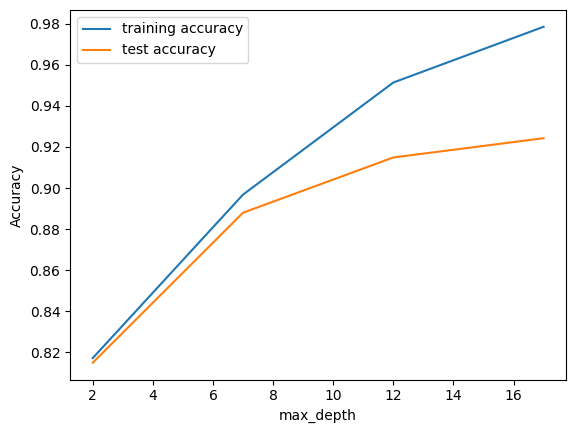

In [158]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

<hr>

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [159]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 500)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight ='balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds, verbose = 1,
                   scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.8659440495324837
{'n_estimators': 1100}


In [160]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_n_estimators  \
0      30.512059      0.539942         0.073416        0.003775                 100   
1     184.802231      1.534419         0.420425        0.019935                 600   
2     324.372669     23.948212         0.851009        0.341499                1100   

                   params  split0_test_score  split1_test_score  split2_test_score  \
0   {'n_estimators': 100}           0.859821           0.866607           0.865536   
1   {'n_estimators': 600}           0.863125           0.867232           0.866696   
2  {'n_estimators': 1100}           0.865089           0.867768           0.867589   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.862321           0.863381         0.863533        0.002397                3   
1           0.861607           0.866327         0.864998        0.002220                2   
2           0.862500           0.866774         0.865944        0.001965                1   

   split0_train_score  split1_train_score  split2_train_score  split3_train_score  \
0            0.866001            0.864015            0.868100            0.867743   
1            0.869149            0.866894            0.867854            0.869104   
2            0.870533            0.867966            0.868345            0.869506   

   split4_train_score  mean_train_score  std_train_score  
0            0.866763          0.866524         0.001456  
1            0.869375          0.868475         0.000953  
2            0.869509          0.869172         0.000918

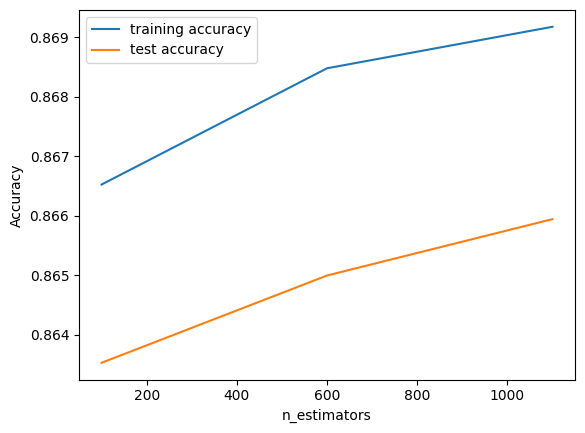

In [161]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<hr>

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [162]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds,
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8712120246705701
{'max_features': 4}


In [163]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_max_features  \
0      18.815351      0.878239         0.089763        0.036549                   4   
1      34.529149      0.501289         0.110012        0.044530                   8   
2      59.700404      0.761498         0.072349        0.003717                  14   
3      84.757647      1.248279         0.113523        0.052460                  20   
4      97.308639      7.829371         0.088280        0.040956                  24   

                 params  split0_test_score  split1_test_score  split2_test_score  \
0   {'max_features': 4}           0.868750           0.873125           0.872946   
1   {'max_features': 8}           0.860268           0.866161           0.864554   
2  {'max_features': 14}           0.849107           0.851964           0.853214   
3  {'max_features': 20}           0.840446           0.843661           0.840893   
4  {'max_features': 24}           0.844196           0.845268           0.842589   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.867857           0.873382         0.871212        0.002395                1   
1           0.860536           0.864452         0.863194        0.002361                2   
2           0.851786           0.850880         0.851390        0.001363                3   
3           0.842768           0.844272         0.842408        0.001504                5   
4           0.844643           0.846861         0.844712        0.001393                4   

   split0_train_score  split1_train_score  split2_train_score  split3_train_score  \
0            0.874662            0.872006            0.874573            0.875823   
1            0.864305            0.866046            0.865823            0.869752   
2            0.852050            0.853077            0.853657            0.856448   
3            0.844014            0.845956            0.843880            0.847251   
4            0.847675            0.847318            0.844662            0.848300   

   split4_train_score  mean_train_score  std_train_score  
0            0.874353          0.874283         0.001248  
1            0.867612          0.866707         0.001848  
2            0.854107          0.853868         0.001462  
3            0.844888          0.845198         0.001267  
4            0.847143          0.847020         0.001244

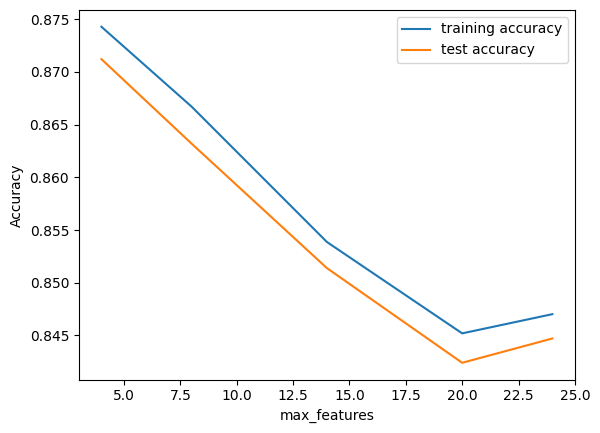

In [164]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_features"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Having less features the model seems to work well on both test and train, but after 22 features both test and train seems to increase in terms of accuracy

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [165]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8890873244422334
{'min_samples_leaf': 100}


In [166]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_min_samples_leaf  \
0      61.953223      0.454935         0.157590        0.009725                     100   
1      57.374822      1.073506         0.193987        0.073166                     150   
2      55.886350      0.683659         0.197941        0.077848                     200   
3      52.661007      0.843541         0.155514        0.037824                     250   
4      51.112753      1.509804         0.163272        0.058562                     300   

                      params  split0_test_score  split1_test_score  split2_test_score  \
0  {'min_samples_leaf': 100}           0.888393           0.891875           0.888571   
1  {'min_samples_leaf': 150}           0.882143           0.884107           0.881607   
2  {'min_samples_leaf': 200}           0.877143           0.883304           0.880357   
3  {'min_samples_leaf': 250}           0.877679           0.880000           0.876696   
4  {'min_samples_leaf': 300}           0.871429           0.879286           0.872321   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.886429           0.890169         0.889087        0.001831                1   
1           0.879375           0.883382         0.882123        0.001633                2   
2           0.877232           0.881954         0.879998        0.002477                3   
3           0.876875           0.878382         0.877926        0.001199                4   
4           0.871964           0.875525         0.874105        0.002959                5   

   split0_train_score  split1_train_score  split2_train_score  split3_train_score  \
0            0.901136            0.897252            0.897833            0.899953   
1            0.893502            0.890310            0.890466            0.890131   
2            0.887497            0.885913            0.885422            0.886962   
3            0.885154            0.882721            0.882386            0.883792   
4            0.880979            0.880198            0.878926            0.879484   

   split4_train_score  mean_train_score  std_train_score  
0            0.899509          0.899137         0.001418  
1            0.890246          0.890931         0.001290  
2            0.884955          0.886150         0.000948  
3            0.880558          0.882922         0.001527  
4            0.879397          0.879797         0.000718

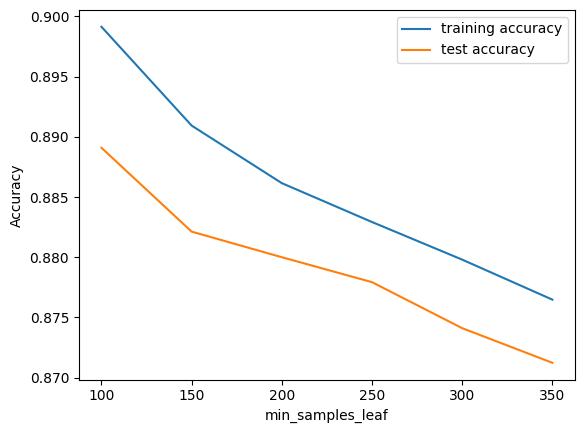

In [167]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that the model starts of overfit as you decrease the value of min_samples_leaf.

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [168]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds,
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.9051233225543097
{'min_samples_split': 200}


In [169]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_min_samples_split  \
0      76.883302      0.639749         0.253538        0.071804                      200   
1      76.428613      0.637218         0.159659        0.004316                      250   
2      73.998707      1.742474         0.186522        0.056727                      300   
3      72.662079      0.563332         0.191525        0.040447                      350   
4      70.777387      0.965745         0.159808        0.007926                      400   

                       params  split0_test_score  split1_test_score  split2_test_score  \
0  {'min_samples_split': 200}           0.902768           0.909286           0.904732   
1  {'min_samples_split': 250}           0.897500           0.903125           0.898125   
2  {'min_samples_split': 300}           0.894196           0.901429           0.895179   
3  {'min_samples_split': 350}           0.890714           0.898571           0.894643   
4  {'min_samples_split': 400}           0.889911           0.896339           0.891339   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.902768           0.906063         0.905123        0.002427                1   
1           0.897321           0.901598         0.899534        0.002374                2   
2           0.894018           0.897848         0.896534        0.002804                3   
3           0.891786           0.894366         0.894016        0.002726                4   
4           0.888929           0.895348         0.892373        0.002952                5   

   split0_train_score  split1_train_score  split2_train_score  split3_train_score  \
0            0.922967            0.922052            0.921427            0.924172   
1            0.915735            0.915400            0.914953            0.914976   
2            0.912788            0.909663            0.908279            0.911538   
3            0.907565            0.905623            0.906940            0.904775   
4            0.903659            0.901248            0.902386            0.904060   

   split4_train_score  mean_train_score  std_train_score  
0            0.921719          0.922467         0.000997  
1            0.915982          0.915409         0.000407  
2            0.910647          0.910583         0.001545  
3            0.905379          0.906056         0.001034  
4            0.903571          0.902985         0.001033

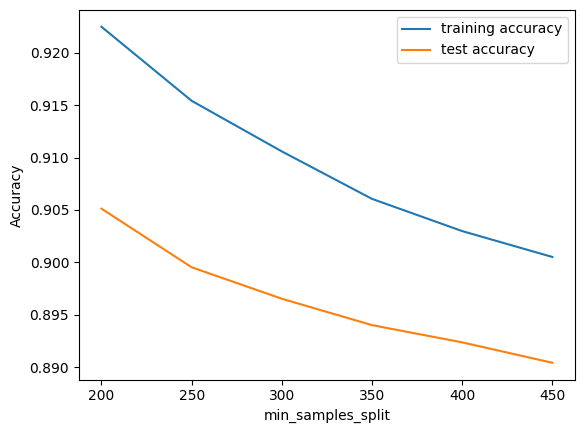

In [170]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<hr>

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

- ### <a> ****Note: The Below GridSearch Step will take almost 30-35 mins to run.****

In [171]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300],
    'max_features': [5, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1,verbose = 1)

In [172]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [173]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.915534226322622 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [174]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],n_estimators =grid_search.best_params_['n_estimators'], random_state=100)

In [175]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_split=200, n_estimators=300,
                       random_state=100)

In [176]:
# predict
predictions = rfc.predict(X_test_pca)

In [177]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90     12593
           1       0.29      0.48      0.36      1407

    accuracy                           0.83     14000
   macro avg       0.61      0.67      0.63     14000
weighted avg       0.87      0.83      0.85     14000



In [178]:
#create confusion matrix
cm = confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)

#checking sesitivity
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[10940  1653]
 [  730   677]]
sensitivity 	 0.48
specificity 	 0.87
AUC:    	 0.81


### 8) Final Choice of Model
Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.

<a> **INFERENCE:**<br>    

We choose logistic regression from all the above models. Its sensitivity is very good which is our prime requirement in this case study.

## `PART 2: -  Interpretable models`

Let us now build models to identify the churn indicators. Identification of these churn indicators will help in retaining customers that are likely to churn.

## 3) Model building

The main objective behind building these models  is identifying important predictor attributes which help the business understand indicators of churn.

### MODEL 1 -  Tree Model Regression

In [183]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (69999, 170)
Size of response variable dataset is: (69999,)


**Decision tree with default parameters**

In [184]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(random_state = 100, class_weight='balanced')
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=100)

In [185]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12593
           1       0.17      0.01      0.03      1407

    accuracy                           0.89     14000
   macro avg       0.53      0.50      0.49     14000
weighted avg       0.83      0.89      0.85     14000



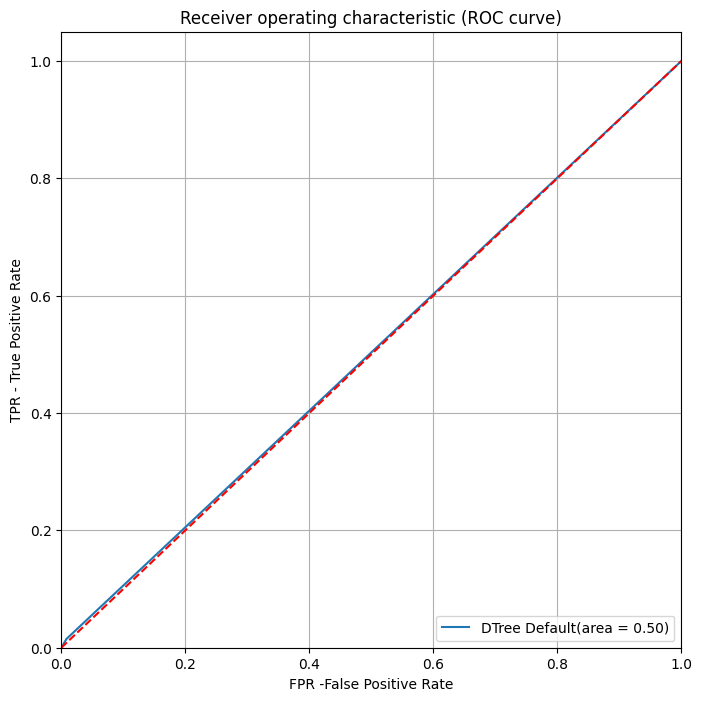

Area under curve is: 0.5
Recall for our model is: 0.01
Accuracy on test set is: 0.89
Confusion matrix for our model is: [[12488   105]
 [ 1386    21]]


In [186]:
import sklearn.metrics as metrics

# Plotting AUC curve
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_default, drop_intermediate =True)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='DTree Default(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR -False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('Receiver operating characteristic (ROC curve)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred_default),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred_default),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred_default),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred_default))

**Hyperparameter Tuning**

The results of default tree are quite poor, and we need to improve it by tuning the hyperparameters.

`Tuning max_depth`

In [187]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10,1)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="recall",return_train_score=True, n_jobs=-1,
                    error_score = 'raise',verbose = 1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8682969432314411
{'max_depth': 4}


In [188]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()



mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_max_depth  \
0       1.264589      0.369752         0.050998        0.017820                1   
1       2.049906      0.570233         0.028001        0.003277                2   
2       2.340575      0.086194         0.024571        0.000336                3   
3       3.850383      0.850127         0.034342        0.018101                4   
4       4.657208      0.932562         0.032080        0.013642                5   

             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0  {'max_depth': 1}           0.676856           0.698690           0.706550           0.697817   
1  {'max_depth': 2}           0.823581           0.831441           0.839301           0.834061   
2  {'max_depth': 3}           0.770306           0.795633           0.793013           0.817467   
3  {'max_depth': 4}           0.856769           0.873362           0.854148           0.882969   
4  {'max_depth': 5}           0.841921           0.852402           0.852402           0.847162   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0           0.675983         0.691179        0.012432                9            0.688865   
1           0.820961         0.829869        0.006751                3            0.828384   
2           0.772926         0.789869        0.017173                8            0.789738   
3           0.874236         0.868297        0.011039                1            0.880131   
4           0.864629         0.851703        0.007541                2            0.881878   

   split1_train_score  split2_train_score  split3_train_score  split4_train_score  \
0            0.689301            0.707424            0.697817            0.687773   
1            0.829913            0.839520            0.833843            0.828603   
2            0.784934            0.793668            0.812664            0.788646   
3            0.873581            0.851528            0.881659            0.876419   
4            0.870742            0.868996            0.855895            0.875328   

   mean_train_score  std_train_score  
0          0.694236         0.007506  
1          0.832052         0.004217  
2          0.793930         0.009772  
3          0.872664         0.010939  
4          0.870568         0.008583

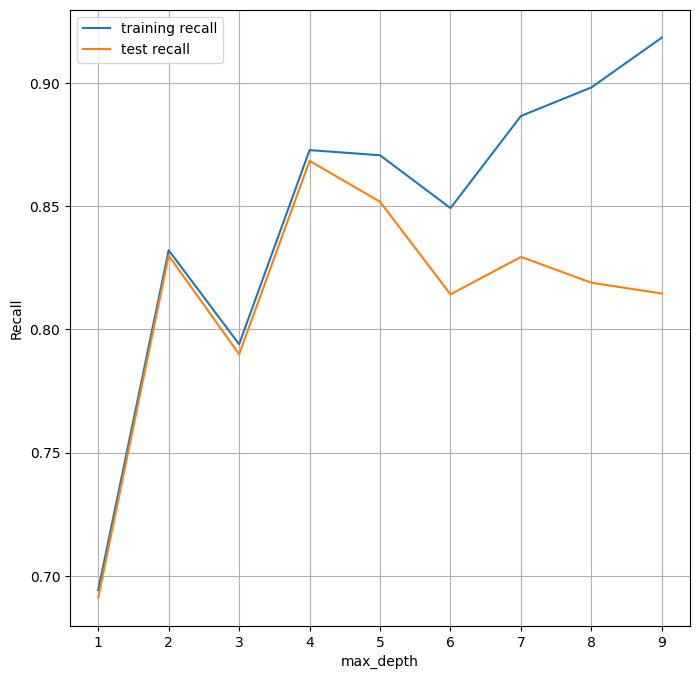

In [189]:
# plotting accuracies with max_depth
plt.figure(figsize=(8,8))
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()


<a> The model perfroms the best at max_depth = 4 and after that the increase in

*   List item
*   List item

depth drops the accuracy on the test dataset.

`Tuning min_samples_leaf`

In [190]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,
                   scoring="recall", n_jobs = -1,return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)


Fitting 5 folds for each of 39 candidates, totalling 195 fits
0.8565938864628823
{'min_samples_leaf': 175}


In [191]:
scores = tree.cv_results_
pd.DataFrame(scores).head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_min_samples_leaf  \
0      12.511526      0.925961         0.047691        0.016183                       5   
1      12.981031      0.429614         0.027401        0.000253                      10   
2      12.530948      0.868283         0.035614        0.015933                      15   
3      12.146823      0.479819         0.035041        0.014334                      20   
4      11.905708      0.684443         0.033819        0.011868                      25   

                     params  split0_test_score  split1_test_score  split2_test_score  \
0   {'min_samples_leaf': 5}           0.719651           0.724891           0.712664   
1  {'min_samples_leaf': 10}           0.759825           0.775546           0.755459   
2  {'min_samples_leaf': 15}           0.802620           0.801747           0.795633   
3  {'min_samples_leaf': 20}           0.803493           0.814847           0.807860   
4  {'min_samples_leaf': 25}           0.816594           0.820961           0.827948   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.707424           0.706550         0.714236        0.007082               39   
1           0.748472           0.724891         0.752838        0.016562               38   
2           0.795633           0.782533         0.795633        0.007181               37   
3           0.796507           0.803493         0.805240        0.006026               36   
4           0.815721           0.817467         0.819738        0.004474               35   

   split0_train_score  split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000            1.000000   
1            0.976638            0.972926            0.973144            0.974891   
2            0.973799            0.976856            0.974672            0.971397   
3            0.951092            0.956332            0.960044            0.958079   
4            0.951747            0.952183            0.961790            0.954148   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.972707          0.974061         0.001503  
2            0.968996          0.973144         0.002713  
3            0.958515          0.956812         0.003095  
4            0.956332          0.955240         0.003656

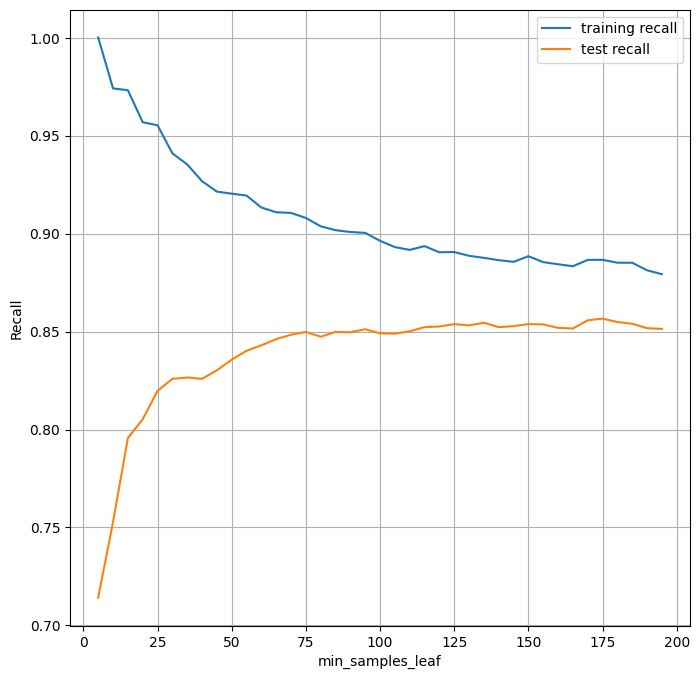

In [192]:
# plotting accuracies with min_samples_leaf
plt.figure(figsize = (8,8))
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

As seen from the above plot, accuracy of the model increases as min_samples_leaf increases. A steep increase from 0 to 115 and it kind of flattens rest of the way.

`Tuning min_samples_split`

In [193]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(300,450,5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, return_train_score=True,
                    cv=n_folds, verbose=1,
                   scoring="recall",n_jobs=-1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.8489082969432313
{'min_samples_split': 390}


In [194]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_min_samples_split  \
0      12.128228      0.776942         0.036460        0.011281                      300   
1      12.431029      0.441208         0.033298        0.010037                      305   
2      12.228932      0.744747         0.036797        0.012460                      310   
3      12.077134      0.572804         0.032657        0.011335                      315   
4      12.005481      0.697659         0.038118        0.013942                      320   

                       params  split0_test_score  split1_test_score  split2_test_score  \
0  {'min_samples_split': 300}           0.833188           0.843668           0.848035   
1  {'min_samples_split': 305}           0.838428           0.843668           0.849782   
2  {'min_samples_split': 310}           0.838428           0.841921           0.850655   
3  {'min_samples_split': 315}           0.838428           0.844541           0.850655   
4  {'min_samples_split': 320}           0.838428           0.845415           0.854148   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.831441           0.829694         0.837205        0.007278               30   
1           0.831441           0.829694         0.838603        0.007501               29   
2           0.831441           0.831441         0.838777        0.007193               28   
3           0.831441           0.832314         0.839476        0.007315               27   
4           0.831441           0.833188         0.840524        0.008370               25   

   split0_train_score  split1_train_score  split2_train_score  split3_train_score  \
0            0.908079            0.914192            0.908734            0.895633   
1            0.908297            0.914192            0.909170            0.895415   
2            0.908297            0.912882            0.908952            0.895415   
3            0.905895            0.913974            0.906550            0.895415   
4            0.905022            0.911572            0.907424            0.895415   

   split4_train_score  mean_train_score  std_train_score  
0            0.917904          0.908908         0.007560  
1            0.917904          0.908996         0.007633  
2            0.917686          0.908646         0.007415  
3            0.917467          0.907860         0.007618  
4            0.917031          0.907293         0.007203

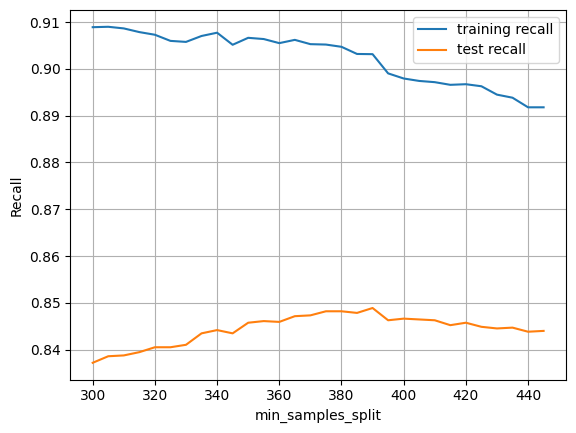

In [195]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()


<a> The test accuracy of the model increases as the min_samples_split increases.

#### Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [196]:
# Create the parameter grid
param_grid = {
    'max_depth': range(3,10, 2),
    'min_samples_leaf': range(100, 125, 5),
    'min_samples_split': range(380,400,5),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                          cv = n_folds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 10, 2),
                         'min_samples_leaf': range(100, 125, 5),
                         'min_samples_split': range(380, 400, 5)},
             verbose=1)

In [197]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8911767361243988
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 100, 'min_samples_split': 380}


In [198]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_criterion  \
0         2.803524      0.315907         0.020292        0.003573         entropy   
1         3.629586      0.761626         0.028478        0.011023         entropy   
2         2.966231      0.644731         0.025052        0.010636         entropy   
3         3.218068      0.772541         0.019688        0.002249         entropy   
4         3.317995      0.850657         0.019916        0.003860         entropy   
5         3.006725      0.675632         0.017518        0.000763         entropy   
6         3.460760      0.714868         0.024578        0.010376         entropy   
7         2.778822      0.258833         0.017625        0.001099         entropy   
8         3.664999      0.913205         0.028895        0.011364         entropy   
9         2.633178      0.036755         0.018092        0.000915         entropy   
10        3.655104      0.668834         0.025478        0.010156         entropy   
11        2.668661      0.066903         0.022064        0.008712         entropy   
12        3.620400      0.879335         0.022152        0.007118         entropy   
13        2.811508      0.393493         0.020882        0.007208         entropy   
14        3.308567      0.924147         0.022119        0.008702         entropy   
15        3.228674      0.693477         0.020309        0.004258         entropy   
16        2.897267      0.437995         0.017896        0.000937         entropy   
17        3.524996      0.879222         0.027567        0.008887         entropy   
18        2.663171      0.049766         0.017452        0.000502         entropy   
19        3.620282      0.657001         0.025146        0.009072         entropy   
20        5.023248      1.016423         0.020100        0.002752         entropy   
21        5.086579      0.629333         0.029733        0.011855         entropy   
22        5.240667      0.762088         0.020696        0.004501         entropy   
23        5.148068      0.814043         0.023085        0.008083         entropy   
24        5.380779      1.008591         0.020868        0.006816         entropy   
25        5.330785      1.106568         0.019259        0.003545         entropy   
26        5.278021      1.118978         0.017995        0.000525         entropy   
27        5.194694      0.959545         0.023141        0.006711         entropy   
28        5.053088      1.012282         0.018567        0.001252         entropy   
29        4.982207      0.691176         0.023523        0.006603         entropy   
30        5.169567      0.704700         0.018967        0.002756         entropy   
31        5.068230      0.854522         0.021727        0.007679         entropy   
32        5.368539      0.941843         0.022332        0.008094         entropy   
33        5.420939      1.272220         0.021979        0.008702         entropy   
34        5.333661      1.125548         0.021050        0.006993         entropy   
35        5.293511      0.973812         0.021793        0.007670         entropy   
36        5.121398      1.024511         0.022745        0.010018         entropy   
37        4.928859      0.638954         0.022162        0.005527         entropy   
38        5.082448      0.779855         0.020096        0.004229         entropy   
39        5.071243      0.870019         0.021152        0.004757         entropy   
40        7.461835      1.201280         0.022169        0.008104         entropy   
41        7.223124      1.057624         0.025102        0.007484         entropy   
42        7.334900      0.564159         0.026061        0.008859         entropy   
43        6.944189      0.710974         0.025111        0.009526         entropy   
44        6.898282      0.971193         0.022251        0.008681         entropy   
45        6.823387      1.105432         0.020067        0.003073         entropy   
46        

**Running the model with best parameters obtained from grid search.**

In [199]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy",
                                  random_state = 100,
                                  max_depth=grid_search.best_params_['max_depth'],
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'], class_weight='balanced')
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_leaf=100, min_samples_split=380,
                       random_state=100)

In [200]:
# accuracy score
clf_gini.score(X_train,y_train)

0.8969267308344792

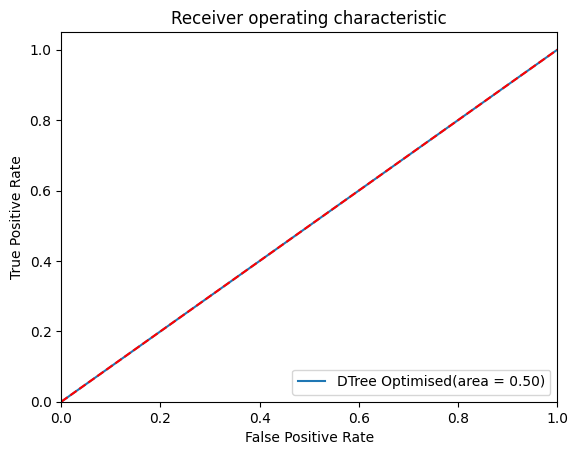

Area under curve is: 0.5
Recall for our model is: 0.0
Accuracy on test set is: 0.9
Confusion matrix for our model is: [[12593     0]
 [ 1407     0]]


In [201]:
# classification metrics

y_pred = clf_gini.predict(X_test)

logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='DTree Optimised(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred))

In [202]:
# accuracy score on training set

y_train_pred = clf_gini.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)
print("Accuracy on train set is:" , round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy on train set is: 0.9


In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12593
           1       0.00      0.00      0.00      1407

    accuracy                           0.90     14000
   macro avg       0.45      0.50      0.47     14000
weighted avg       0.81      0.90      0.85     14000



In [204]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[12593     0]
 [ 1407     0]]


In [205]:
speci = round((cm[0,0]/(cm[0,0]+cm[0,1])),2)
sensi = round((cm[1,1]/(cm[1,0]+cm[1,1])),2)

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 1.0
The sensitivity is: 0.0


<hr>



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [206]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters
rfc = RandomForestClassifier(class_weight = 'balanced',random_state=100,n_jobs = -1)

# fit
rfc.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=100)

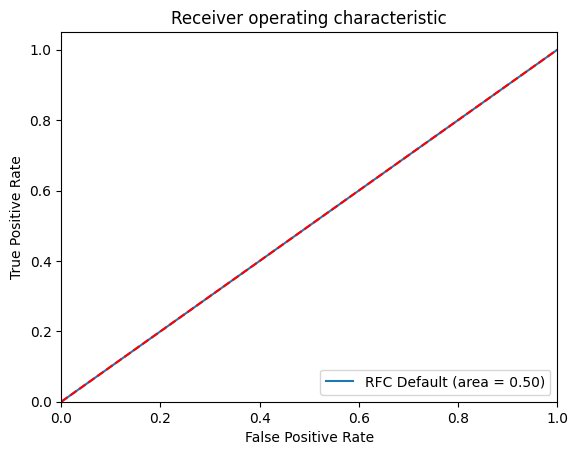

Area under curve is: 0.5
Recall for our model is: 0.0
Accuracy on test set is: 0.9
Confusion matrix for our model is: [[12593     0]
 [ 1407     0]]


In [207]:
# Making Predictions
y_pred_default = rfc.predict(X_test)


logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_default )
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_default )
plt.figure()
plt.plot(fpr, tpr, label='RFC Default (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred_default),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred_default),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred_default),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred_default))

In [208]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12593
           1       0.00      0.00      0.00      1407

    accuracy                           0.90     14000
   macro avg       0.45      0.50      0.47     14000
weighted avg       0.81      0.90      0.85     14000



In [209]:
# Printing confusion matrix
cm = confusion_matrix(y_test,y_pred_default)
print(cm)

[[12593     0]
 [ 1407     0]]


In [210]:
speci = round((cm[0,0]/(cm[0,0]+cm[0,1])),2)
sensi = round((cm[1,1]/(cm[1,0]+cm[1,1])),2)

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 1.0
The sensitivity is: 0.0


In [211]:
print(accuracy_score(y_test,y_pred_default))

0.8995


**Hyperparameter Tuning**

The results of default tree are poor, and we need to improve it by tuning the hyperparameters.

`Tuning max_depth`

In [212]:
# parameters to build the model on
parameters = {'max_depth': range(2, 15, 1)}

# number of folds
n_folds = 5

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)


# fit tree on training data
rf = GridSearchCV(rf, parameters, return_train_score=True,cv=n_folds, n_jobs=-1,
                   scoring="recall",verbose = 1)
rf.fit(X_train, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
0.7809606986899563
{'max_depth': 6}


In [213]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_max_depth  \
0       9.697450      1.283989         0.091745        0.029754                2   
1      14.444485      0.128363         0.082634        0.002793                3   
2      18.626986      0.563408         0.125310        0.042616                4   
3      22.887543      1.302822         0.123106        0.009753                5   
4      34.335682      2.713290         0.205133        0.068321                6   

             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0  {'max_depth': 2}           0.695197           0.716157           0.708297           0.707424   
1  {'max_depth': 3}           0.711790           0.729258           0.728384           0.724891   
2  {'max_depth': 4}           0.737118           0.769432           0.763319           0.764192   
3  {'max_depth': 5}           0.760699           0.793886           0.775546           0.781659   
4  {'max_depth': 6}           0.767686           0.801747           0.786900           0.786900   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0           0.709170         0.707249        0.006774               10            0.708734   
1           0.724891         0.723843        0.006283                8            0.728821   
2           0.743231         0.755459        0.012800                6            0.767031   
3           0.760699         0.774498        0.012721                3            0.794760   
4           0.761572         0.780961        0.014524                1            0.818559   

   split1_train_score  split2_train_score  split3_train_score  split4_train_score  \
0            0.709607            0.710262            0.705895            0.704585   
1            0.724891            0.732751            0.724891            0.732533   
2            0.760262            0.760917            0.758734            0.762882   
3            0.791921            0.783624            0.792140            0.790175   
4            0.811790            0.806769            0.807424            0.807642   

   mean_train_score  std_train_score  
0          0.707817         0.002198  
1          0.728777         0.003467  
2          0.761965         0.002862  
3          0.790524         0.003748  
4          0.810437         0.004431

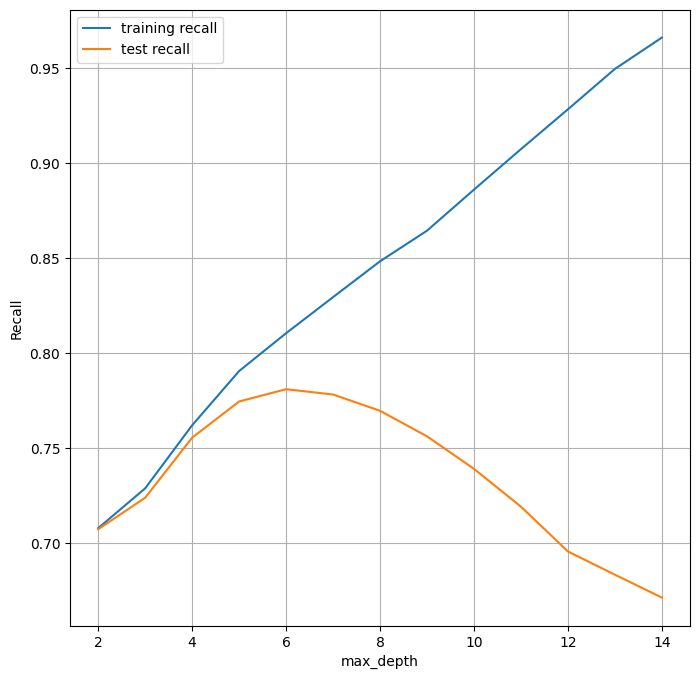

In [214]:
# plotting accuracies with max_depth
plt.figure(figsize=(8,8))
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.grid(True)
plt.legend()
plt.show()


`Tuning n_estimators`

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. We'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [215]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': [10,25,50,75,100]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(random_state = 100,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds, verbose=1,scoring="recall",return_train_score = True,
                  n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.571004366812227
{'n_estimators': 100}


In [216]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_n_estimators  \
0       6.553795      0.934234         0.078189        0.028124                  10   
1      15.461342      0.139622         0.142956        0.034758                  25   
2      30.485164      0.244310         0.290168        0.088199                  50   
3      45.253156      0.883470         0.492745        0.153962                  75   
4      58.935728      4.978414         0.522000        0.139297                 100   

                  params  split0_test_score  split1_test_score  split2_test_score  \
0   {'n_estimators': 10}           0.524017           0.517031           0.543231   
1   {'n_estimators': 25}           0.565066           0.578166           0.588646   
2   {'n_estimators': 50}           0.558952           0.570306           0.586026   
3   {'n_estimators': 75}           0.563319           0.577293           0.590393   
4  {'n_estimators': 100}           0.560699           0.579039           0.590393   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.512664           0.510044         0.521397        0.011898                5   
1           0.550218           0.563319         0.569083        0.013194                3   
2           0.544978           0.563319         0.564716        0.013492                4   
3           0.555459           0.567686         0.570830        0.012059                2   
4           0.554585           0.570306         0.571004        0.012781                1   

   split0_train_score  split1_train_score  split2_train_score  split3_train_score  \
0            0.932096            0.927729            0.929476            0.928166   
1            0.987991            0.988865            0.987336            0.986026   
2            0.996070            0.996943            0.996725            0.995633   
3            0.999345            0.998690            0.998472            0.998908   
4            0.999782            0.999563            0.999563            0.999563   

   split4_train_score  mean_train_score  std_train_score  
0            0.932533          0.930000         0.001980  
1            0.986245          0.987293         0.001064  
2            0.995852          0.996245         0.000505  
3            0.998908          0.998865         0.000290  
4            0.999563          0.999607         0.000087

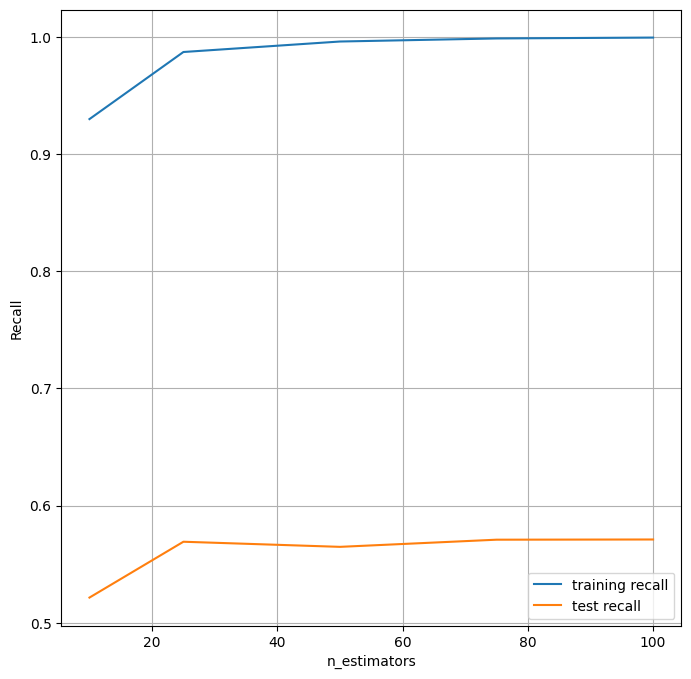

In [217]:
# plotting accuracies with n_estimators
plt.figure(figsize=(8,8))
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()


`Tuning min_samples_split`

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [218]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {"min_samples_split": range(100,200,10)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1, param_grid={'min_samples_split': range(100, 200, 10)},
             return_train_score=True, scoring='recall', verbose=1)

In [219]:
print(rf.best_score_)
print(rf.best_params_)

0.7972062344721151
{'min_samples_split': 190}


In [220]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_min_samples_split  \
0      45.053106      0.171604         0.555664        0.013193                      100   
1      44.383744      0.233424         0.560370        0.008149                      110   
2      44.576155      0.816772         0.911258        0.246123                      120   
3      42.076012      0.754850         1.000770        0.099564                      130   
4      42.996163      1.264235         0.550911        0.026540                      140   

                       params  split0_test_score  split1_test_score  split2_test_score  \
0  {'min_samples_split': 100}           0.770561           0.785639           0.770964   
1  {'min_samples_split': 110}           0.774751           0.789308           0.770964   
2  {'min_samples_split': 120}           0.778418           0.800314           0.778302   
3  {'min_samples_split': 130}           0.779990           0.798742           0.781447   
4  {'min_samples_split': 140}           0.780513           0.799790           0.785639   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.775721        0.007015               10            0.881289            0.874247   
1         0.778341        0.007907                9            0.882338            0.873461   
2         0.785678        0.010350                8            0.877883            0.872151   
3         0.786726        0.008517                7            0.874214            0.869007   
4         0.788648        0.008152                5            0.874738            0.865863   

   split2_train_score  mean_train_score  std_train_score  
0            0.874247          0.876594         0.003320  
1            0.871889          0.875896         0.004600  
2            0.870579          0.873537         0.003139  
3            0.865339          0.869520         0.003641  
4            0.865077          0.868559         0.004381

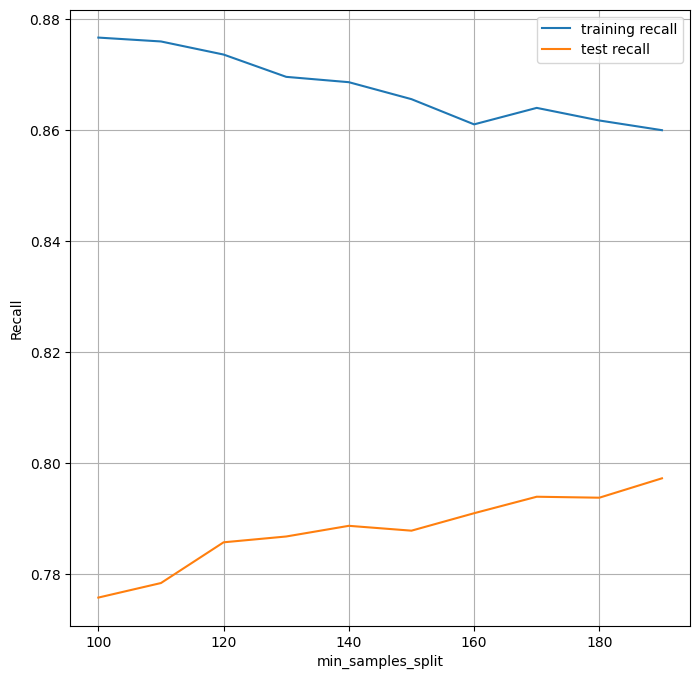

In [221]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8,8))
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

`Tuning min_samples_leaf`

In [222]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {"min_samples_leaf": range(1,200,20)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 200, 20)},
             return_train_score=True, scoring='recall', verbose=1)

In [223]:
print(rf.best_score_)
print(rf.best_params_)

0.8019220259032668
{'min_samples_leaf': 101}


In [224]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_min_samples_leaf  \
0      49.333262      0.069714         1.025695        0.229472                       1   
1      42.777550      1.044584         0.626791        0.055792                      21   
2      40.730962      0.770789         0.710743        0.241802                      41   
3      38.577240      0.989768         0.660947        0.239674                      61   
4      36.720962      1.296132         0.483338        0.007931                      81   

                     params  split0_test_score  split1_test_score  split2_test_score  \
0   {'min_samples_leaf': 1}           0.562074           0.587002           0.562369   
1  {'min_samples_leaf': 21}           0.766370           0.784591           0.761006   
2  {'min_samples_leaf': 41}           0.783656           0.800839           0.779874   
3  {'min_samples_leaf': 61}           0.785752           0.809224           0.792977   
4  {'min_samples_leaf': 81}           0.789942           0.807128           0.796646   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.570482        0.011682               10            1.000000            0.999476   
1         0.770656        0.010094                9            0.892558            0.883154   
2         0.788123        0.009123                8            0.867662            0.863767   
3         0.795984        0.009816                7            0.855346            0.849358   
4         0.797905        0.007072                5            0.848008            0.843332   

   split2_train_score  mean_train_score  std_train_score  
0            0.998952          0.999476         0.000428  
1            0.882368          0.886027         0.004629  
2            0.856956          0.862795         0.004425  
3            0.850144          0.851616         0.002657  
4            0.839403          0.843581         0.003518

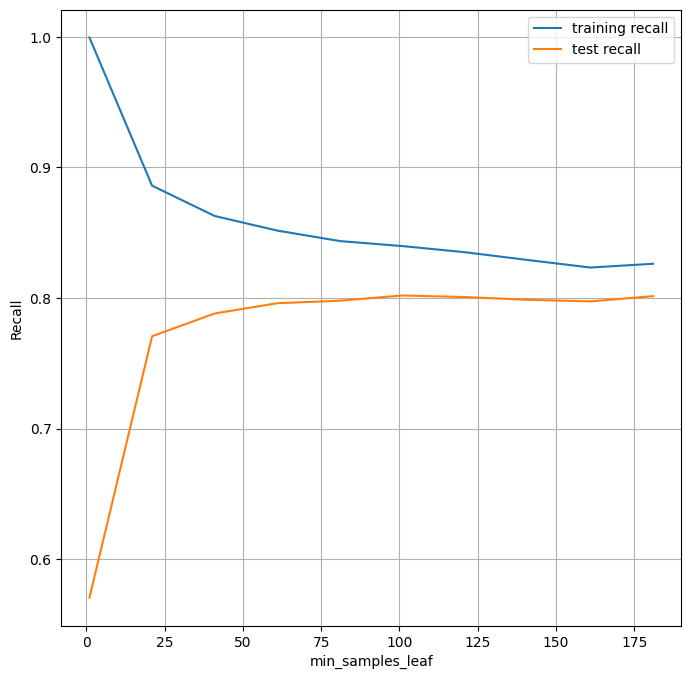

In [225]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8,8))
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

As seen from the above plot, recall of the model increases as min_samples_leaf increases. A steep increase is observed from 0 to 25. The curve flattens after min_samples_leaf = 125. So let us choose this as our Optimal minimum number of samples leaf.

`Tuning max_features`

Let's see how the model performance varies with `max_features`, which is the maximum number of features considered for splitting at a node.

In [226]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [25,50,75]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight = 'balanced',random_state=100)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs  = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, random_state=100),
             n_jobs=-1, param_grid={'max_features': [25, 50, 75]},
             return_train_score=True, scoring='recall', verbose=1)

In [227]:
print(rf.best_score_)
print(rf.best_params_)

0.8228829089029529
{'max_features': 75}


In [228]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_max_features  \
0      32.644885      0.263314         0.144811        0.004804                  25   
1      63.793090      0.263332         0.137644        0.002669                  50   
2      87.275610     10.896230         0.126772        0.024219                  75   

                 params  split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0  {'max_features': 25}           0.785228           0.794025           0.784067         0.787773   
1  {'max_features': 50}           0.806705           0.810273           0.811845         0.809607   
2  {'max_features': 75}           0.818229           0.828092           0.822327         0.822883   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  \
0        0.004446                3            0.797432            0.799057            0.795127   
1        0.002150                2            0.822851            0.823160            0.821326   
2        0.004046                1            0.838312            0.834425            0.833639   

   mean_train_score  std_train_score  
0          0.797205         0.001612  
1          0.822445         0.000802  
2          0.835459         0.002043

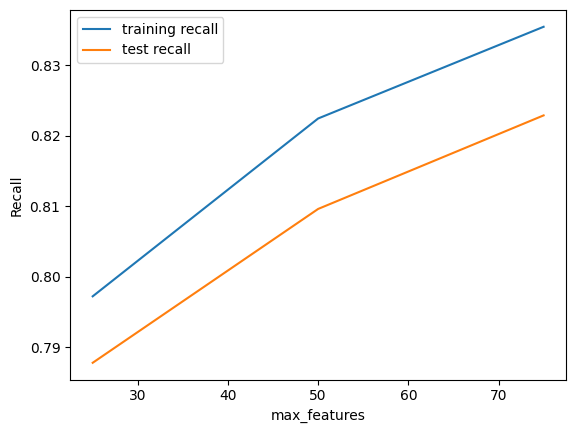

In [229]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_max_features"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features.

#### **Grid Search to Find Optimal Hyperparameters**

We can now find the optimal hyperparameters using GridSearchCV.

In [230]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [8,8,10],
    'min_samples_split': [170,190,200], 'min_samples_leaf': [120,130,140] }

# Create a based model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.9103912878612573
{'max_depth': 10, 'min_samples_leaf': 120, 'min_samples_split': 170}


In [231]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9103912878612573 using {'max_depth': 10, 'min_samples_leaf': 120, 'min_samples_split': 170}


**Fitting the final model with the best parameters obtained from grid search.**

In [232]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,random_state=100,
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                              class_weight='balanced')

In [233]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=170, random_state=100)

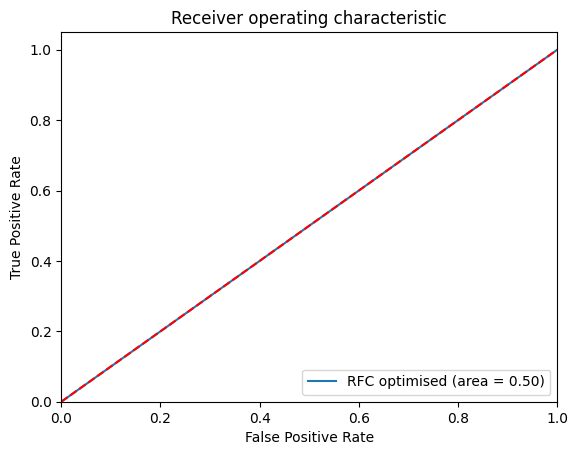

Area under curve is: 0.5
Recall for our model is: 0.0
Accuracy on test set is: 0.9
Confusion matrix for our model is: [[12593     0]
 [ 1407     0]]


In [234]:
# predict
predictions = rfc.predict(X_test)

# Plotting ROC
logit_roc_auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, label='RFC optimised (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, predictions),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, predictions),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, predictions),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, predictions))

In [235]:
# accuracy score on training set

y_train_pred = rfc.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)
print("Accuracy on train set is:" , round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy on train set is: 0.9


In [236]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12593
           1       0.00      0.00      0.00      1407

    accuracy                           0.90     14000
   macro avg       0.45      0.50      0.47     14000
weighted avg       0.81      0.90      0.85     14000



In [237]:
# confusion matrix
cm = confusion_matrix(y_test,predictions)
print(cm)

[[12593     0]
 [ 1407     0]]


In [238]:
speci = cm[0,0]/(cm[0,0]+cm[0,1])
sensi = cm[1,1]/(cm[1,0]+cm[1,1])

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 1.0
The sensitivity is: 0.0


 **<a>INFERENCE**<br>
<a>
 - The accuracy of the Random Forest Tree model on the TEST dataset is 85% % training dataset is 82%, which is pretty good for a model.<br>
 - The RECALL score for Churn is 78% and Non-Churns is around 91%.<br>
 - specificity obtained is : 91%
 - sensitivity obtained is: 78%

From the above metrics, we can conclude that the above model performs well.

--------------------------

## 3) MODEL SUMMARY

In our case study we have chosen `Recall` as the Performace measure because it is more important to predict the customers who are more likely to churn rather than accuracy.

In [239]:
model_stats = pd.DataFrame(
    {'model':['DTree - Default Param','DTree - Tuned Param','RFC - Default Param','RFC - Tuned Param'],

    'Recall':       [0.48,0.84,0.43,0.78],
    'Test accuracy':     [0.92,0.82,0.94,0.85],
    'Roc_auc_score':[0.71,0.83,0.71,0.85],
    })

model_stats.sort_values(by=['Recall','Test accuracy','Roc_auc_score'],ascending=False)

model  Recall  Test accuracy  Roc_auc_score
1    DTree - Tuned Param    0.84           0.82           0.83
3      RFC - Tuned Param    0.78           0.85           0.85
0  DTree - Default Param    0.48           0.92           0.71
2    RFC - Default Param    0.43           0.94           0.71

<a> `Decision tree with tuned hyperparameters` outperforms all the other models in terms of `recall` and has a pretty `decent accuracy and AUC score`. Let us choose this model to find out the most important features affecting churn.

In [240]:
features = clf_gini.feature_importances_
cols = X.iloc[:,sorted(range(len(features)), key=lambda i: features[i])[-10:]].columns
cols


Index(['vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_8', 'total_rech_num_8',
       'vol_3g_mb_7', 'std_ic_t2m_mou_8', 'ic_others_8', 'offnet_mou_8', 'loc_ic_t2t_mou_8'],
      dtype='object')

In [254]:
unseen = pd.read_csv('/content/sample_data/test.csv')
unseen.head()


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
0  69999        109             0.0             0.0             0.0            6/30/2014   
1  70000        109             0.0             0.0             0.0            6/30/2014   
2  70001        109             0.0             0.0             0.0            6/30/2014   
3  70002        109             0.0             0.0             0.0            6/30/2014   
4  70003        109             0.0             0.0             0.0            6/30/2014   

  last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
0            7/31/2014            8/31/2014   91.882   65.330   64.445        31.78        20.23   
1            7/31/2014            8/31/2014  414.168  515.568  360.868        75.51        41.21   
2            7/31/2014            8/31/2014  329.844  434.884  746.239         7.54         7.86   
3            7/31/2014            8/31/2014   43.550  171.390   24.400         5.31         2.16   
4            7/31/2014            8/31/2014  306.854  406.289  413.329       450.93       609.03   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0        23.11         60.16         32.16         34.83           0.00           0.00   
1        19.84        474.34        621.84        394.94           0.00           0.00   
2         8.40         16.98         45.81         45.04          22.81         103.38   
3         0.00         40.04        205.01         24.01           0.00           0.00   
4       700.68         60.94         23.84         74.16           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00           0.00           0.00           0.00             24.88             20.23   
1           0.00           0.00           0.00           0.00             75.51             41.21   
2          26.08          24.53          53.68          54.44              0.00              0.00   
3           0.00           0.00           0.00           0.00              5.31              0.00   
4           0.00           0.00           0.00           0.00              0.45              0.78   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0             21.06             18.13             10.89              8.36              0.00   
1             19.84            473.61            598.08            377.26              0.73   
2              0.00              0.00              0.00              0.00              0.00   
3              0.00              2.94             98.61             20.51              0.00   
4             14.56              2.39              2.66             10.94              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0             13.58              0.00               0.0              0.00              0.03   
1              0.00              0.00               0.0              0.00              0.00   
2              0.00              0.00               0.0              0.00              0.00   
3              0.00              2.35               0.0              6.18              0.00   
4              0.00              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0         43.01         44.71         29.43              6.90              0.00              2.05   
1        549.86        639.29        397.11              0.00              0.00              0.00   
2          0.00          0.00          0.00              0.00              0.00              0.00   
3          8.26         98.61         22.86              0.00              2.16              0.00   
4          2.84          3.44         25.51            45

In [289]:
# Load the test data
unseen = pd.read_csv('/content/sample_data/test.csv')

# Identify missing columns
missing_cols = set(X_train.columns) - set(unseen.columns)
for col in missing_cols:
    unseen[col] = 0  # You can set a default value, e.g., 0 or NaN

# Ensure columns are in the same order
unseen = unseen[X_train.columns]

print("Columns in unseen data aligned with X_train:")
print(unseen.columns)



Columns in unseen data aligned with X_train:
Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'loc_outgoing_total_8', 'std_outgoing_total_8', 'incoming_total_6', 'loc_incoming_total_6',
       'std_incoming_total_6', 'loc_incoming_total_7', 'std_incoming_total_7', 'incoming_total_8',
       'loc_incoming_total_8', 'std_incoming_total_8'],
      dtype='object', length=142)


In [290]:
# Check for NaN values in submission_data
print(unseen.isna().sum())

# Handle NaN values (example: fill with 0 or the mean of the column)
submission_data = unseen.fillna(unseen.mean())



id                         0
arpu_6                     0
arpu_7                     0
arpu_8                     0
onnet_mou_6             1169
onnet_mou_7             1172
onnet_mou_8             1675
offnet_mou_6            1169
offnet_mou_7            1172
offnet_mou_8            1675
roam_ic_mou_6           1169
roam_ic_mou_7           1172
roam_ic_mou_8           1675
roam_og_mou_6           1169
roam_og_mou_7           1172
roam_og_mou_8           1675
loc_og_t2t_mou_6        1169
loc_og_t2t_mou_7        1172
loc_og_t2t_mou_8        1675
loc_og_t2m_mou_6        1169
loc_og_t2m_mou_7        1172
loc_og_t2m_mou_8        1675
loc_og_t2f_mou_6        1169
loc_og_t2f_mou_7        1172
loc_og_t2f_mou_8        1675
loc_og_t2c_mou_6        1169
loc_og_t2c_mou_7        1172
loc_og_t2c_mou_8        1675
loc_og_mou_6            1169
loc_og_mou_7            1172
loc_og_mou_8            1675
std_og_t2t_mou_6        1169
std_og_t2t_mou_7        1172
std_og_t2t_mou_8        1675
std_og_t2m_mou

In [291]:
print(submission_data.isna().sum())

id                      0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_m

In [295]:
# Ensure submission_data is a DataFrame with the correct shape
print(submission_data.shape)



(30000, 142)


In [293]:
submission_data.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  69999   91.882   65.330   64.445        31.78        20.23        23.11         60.16   
1  70000  414.168  515.568  360.868        75.51        41.21        19.84        474.34   
2  70001  329.844  434.884  746.239         7.54         7.86         8.40         16.98   
3  70002   43.550  171.390   24.400         5.31         2.16         0.00         40.04   
4  70003  306.854  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0         32.16         34.83           0.00           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08          24.53   
3        205.01         24.01           0.00           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00           0.00   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00           0.00             24.88             20.23             21.06   
1           0.00           0.00             75.51             41.21             19.84   
2          53.68          54.44              0.00              0.00              0.00   
3           0.00           0.00              5.31              0.00              0.00   
4           0.00           0.00              0.45              0.78             14.56   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             18.13             10.89              8.36              0.00             13.58   
1            473.61            598.08            377.26              0.73              0.00   
2              0.00              0.00              0.00              0.00              0.00   
3              2.94             98.61             20.51              0.00              0.00   
4              2.39              2.66             10.94              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00               0.0              0.00              0.03         43.01   
1              0.00               0.0              0.00              0.00        549.86   
2              0.00               0.0              0.00              0.00          0.00   
3              2.35               0.0              6.18              0.00          8.26   
4              0.00               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0         44.71         29.43              6.90              0.00              2.05   
1        639.29        397.11              0.00              0.00              0.00   
2          0.00          0.00              0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16              0.00   
4          3.44         25.51            450.48            608.24            686.11   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0             42.03              7.68             26.43               0.0               0.0   
1              0.00             23.76             17.68               0.0               0.0   
2              0.00              0.00              0.00               0.0               0.0   
3             37.09             94.36              0.00               0.0               0.0   
4             58.54             21.18             63.18               0.0               0.0   

   std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
0               0.0         48.93          7.68       

In [297]:
# Make predictions without the 'id' column
churn_probability = clf_gini.predict_proba(submission_data)[:, 1]  # Get probabilities for the positive class

# Add the churn_probability to the unseen DataFrame
unseen['churn_probability'] = churn_probability

# Create the submission DataFrame including 'id' for output
submission = pd.DataFrame({
    'id': unseen['id'],
    'churn_probability': unseen['churn_probability']
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")



Submission file created successfully!


-----------------------------

# 4) **Strategies to be incorporated:**<br>
    
1. In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. <br>
2. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.<br>
3. In order to manage High Value Customer Churn, we have predicted customers that are more likely to churn and the factors that influence the high churn.<br>
4. From the exploratory analysis, we observed that there is considerable drop in recharge, call usage and data usage in the 8th month which is the  `Action Phase`. From the list of important predictors affecting the churn, this is again evident as follows:<br>
  - 'arpu_7',
  - 'max_rech_amt_6',
  - 'std_og_t2m_mou_8',
  - 'loc_og_t2m_mou_8',
  - 'max_rech_data_8',
  - 'last_day_rch_amt_8',
  - 'total_data_rech_8',
  - 'total_amt_8',
  - 'roam_og_mou_8',
  - 'loc_ic_t2m_mou_8'
  <br>
  
5. Average revenue per user in the `7th month` plays a vital role in deciding churn. A sudden drop in it might indicate that the customer might be thinking about churning and appropriate actions should be taken.<br>
6. Local & STD Minutes of usage (incoming & outgoing) are the most affecting features on the customer churn.<br>
7. Lastday of recharge amount in the action phase also plays a crucial role in determing churn.
8. The maximum rcharge for calling data by a client in the 6th Month and 8th Month should be carefully focussed as the 6th month indicates the begining of the good phase and 8th month indicates the action phase.<br>
9. Last day of recharge in the 8th month, the total recharge for data done in the 8th month and the total amount spent on calls and data by clients in 8th month also play crucial role in indicating churn.
10. Outgoing roaming calls made by clients in the 8th month also play key role in indicating churn.

Following strategies can be incorporated :<br>

 - Sudden drop in Local & STD Minutes of usage might be because of the unsatisfactory customer service or because of poor network or unsuitable customer schemes/plans. Efforts shall be made to provide better network and focus on customer satisfaction.
 - Customised plans should be provided to such customers to stop them from churning.
 - Based on the usage / last recharge, routine feedback calls to understand the customer satisfaction regarding services can be made to understand their grievances & expectations. Appropriate action should be taken to avoid them rom churning.
 - Various attractive offers can be introduced to customers showing sudden drop in total amount spent on calls & data recharge in the action phase  to lure them.
 - Promotional offers can also be very helpful